Original byonic columns:
Index(['PID', 'Pos.', 'Sequence', 'SequenceOriginalDebug',
       'PeptideParseFriendly', 'Mods_x000D_\n(fixed)', 'Glycans',
       'Obs._x000D_\nm/z', 'Calc._x000D_\nm/z', 'Obs._x000D_\nMH',
       'Calc._x000D_\nMH', 'z', 'ppm_x000D_\nerr.', 'Scan_x000D_\nTime',
       'Score', 'PEP_x000D_\n2D', 'Scan #', 'Prot._x000D_\nRank',
       'Mods_x000D_\n(variable)', 'PEP_x000D_\n1D', '|Log Prob|',
       'Delta_x000D_\nScore', 'Delta Mod._x000D_\nScore', 'Off-_x000D_\nBy-X',
       'Cleavage', 'Glycans_x000D_\nPos.', 'Z-Score', 'Protein_x000D_\nName',
       'Prot._x000D_\nId', 'QID', 'Comment', 'Fragment_x000D_\nType',
       '|LogProbOld|', 'Obs.M', 'Calc.M', 'FDR_x000D_\n2D', 'FDR_x000D_\n1D',
       'FDR uniq._x000D_\n2D', 'FDR uniq._x000D_\n1D', 'q-value_x000D_\n2D',
       'q-value_x000D_\n1D', 'Scan info', 'MobilityValue'],
      dtype='object')

Fixed byonic columns:
Index(['PID', 'Pos.', 'Sequence', 'SequenceOriginalDebug',
       'PeptideParseFriendly', '

<ipython-input-1-e752a7c344b2>:1408: FutureWarning: inplace is deprecated and will be removed in a future version.
  bp_intersection_gp.columns.set_levels(['norm_XIC\r\nAUC[Byos]', 'norm_Apex Int.\r\n(Posit)[Byos]', 'norm_MonoArea[pGlyco]', 'norm_IsotopeArea[pGlyco]'], level = 1, inplace=True)
<ipython-input-1-e752a7c344b2>:1424: FutureWarning: inplace is deprecated and will be removed in a future version.
  bp_union_gp.columns.set_levels(['norm_XIC\r\nAUC[Byos]', 'norm_Apex Int.\r\n(Posit)[Byos]', 'norm_MonoArea[pGlyco]', 'norm_IsotopeArea[pGlyco]'], level = 1, inplace=True)
<ipython-input-1-e752a7c344b2>:1441: FutureWarning: inplace is deprecated and will be removed in a future version.
  onlyb_gp.columns.set_levels(['norm_XIC\r\nAUC[Byos]', 'norm_Apex Int.\r\n(Posit)[Byos]', 'sum_XIC\r\nAUC[Byos]', 'sum_Apex Int.\r\n(Posit)[Byos]'], level = 1, inplace=True)
<ipython-input-1-e752a7c344b2>:1457: FutureWarning: inplace is deprecated and will be removed in a future version.
  onlyp_gp.c


----- "_Quant" file exported. -----

----- Start plotting. -----

----- Start preparing MajorGlycoformTable. -----


----- MajorGlycoformTable exported. -----


All tasks completed.
Execution time: 20.18 seconds


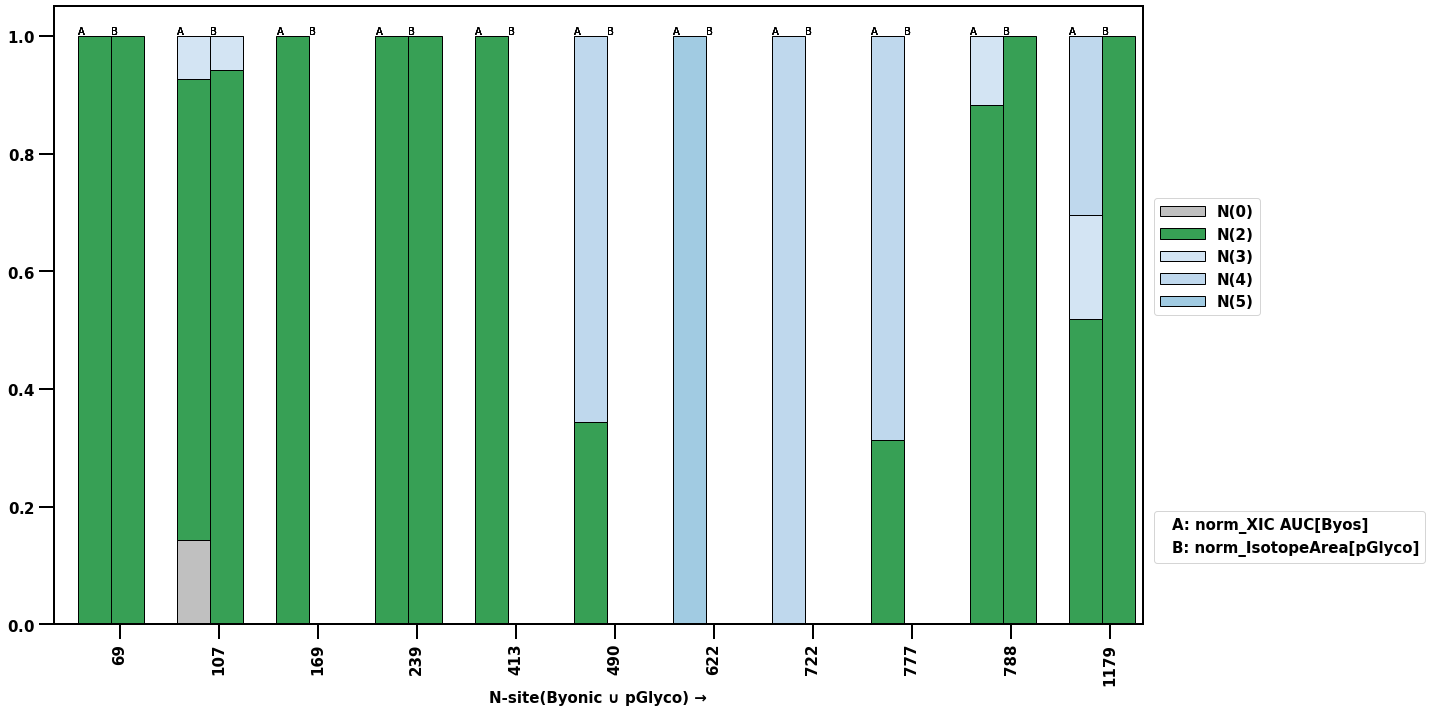

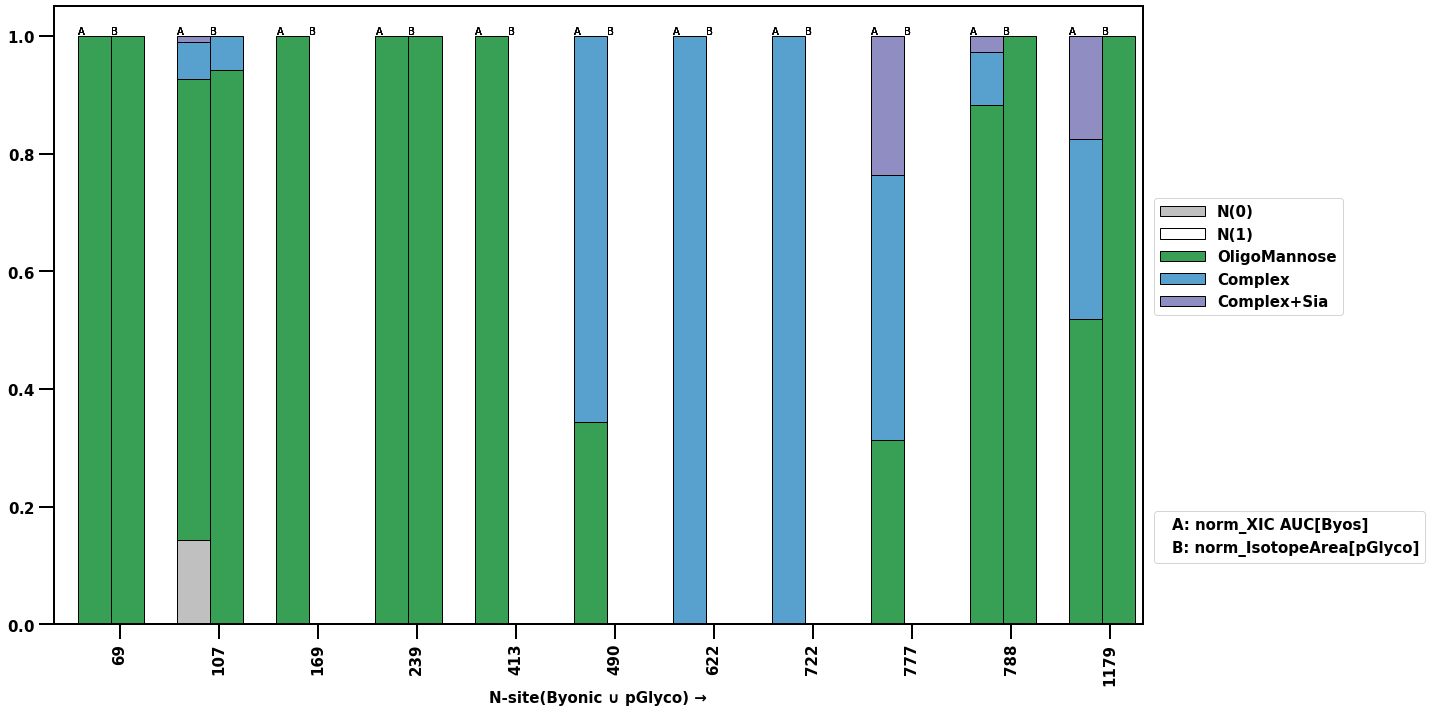

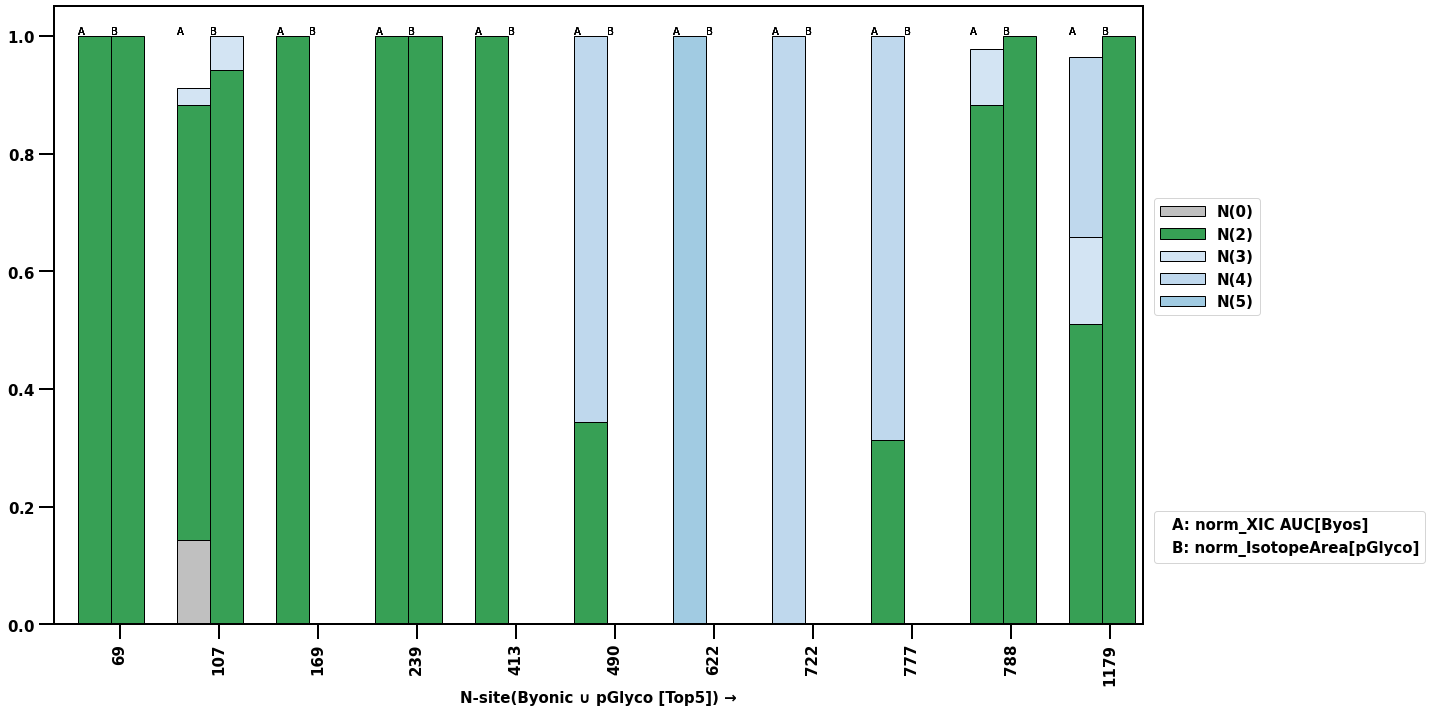

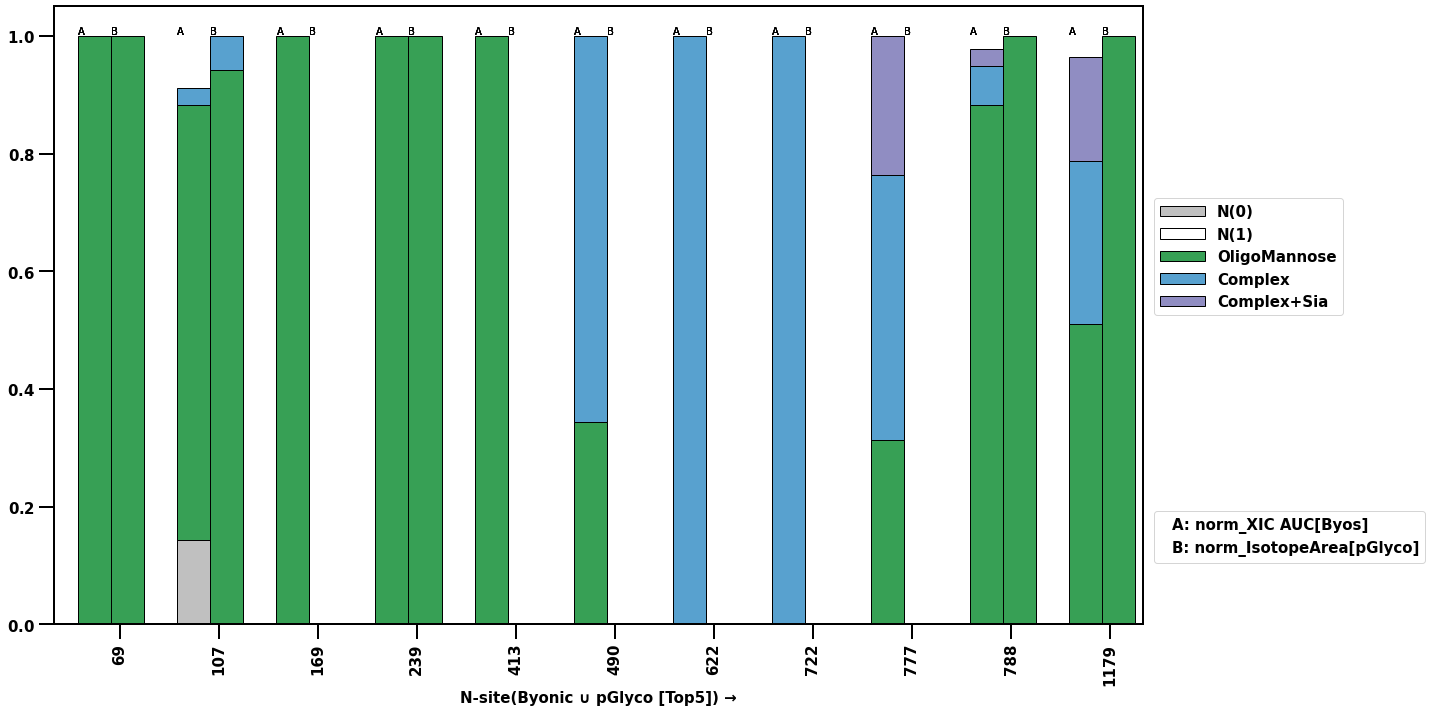

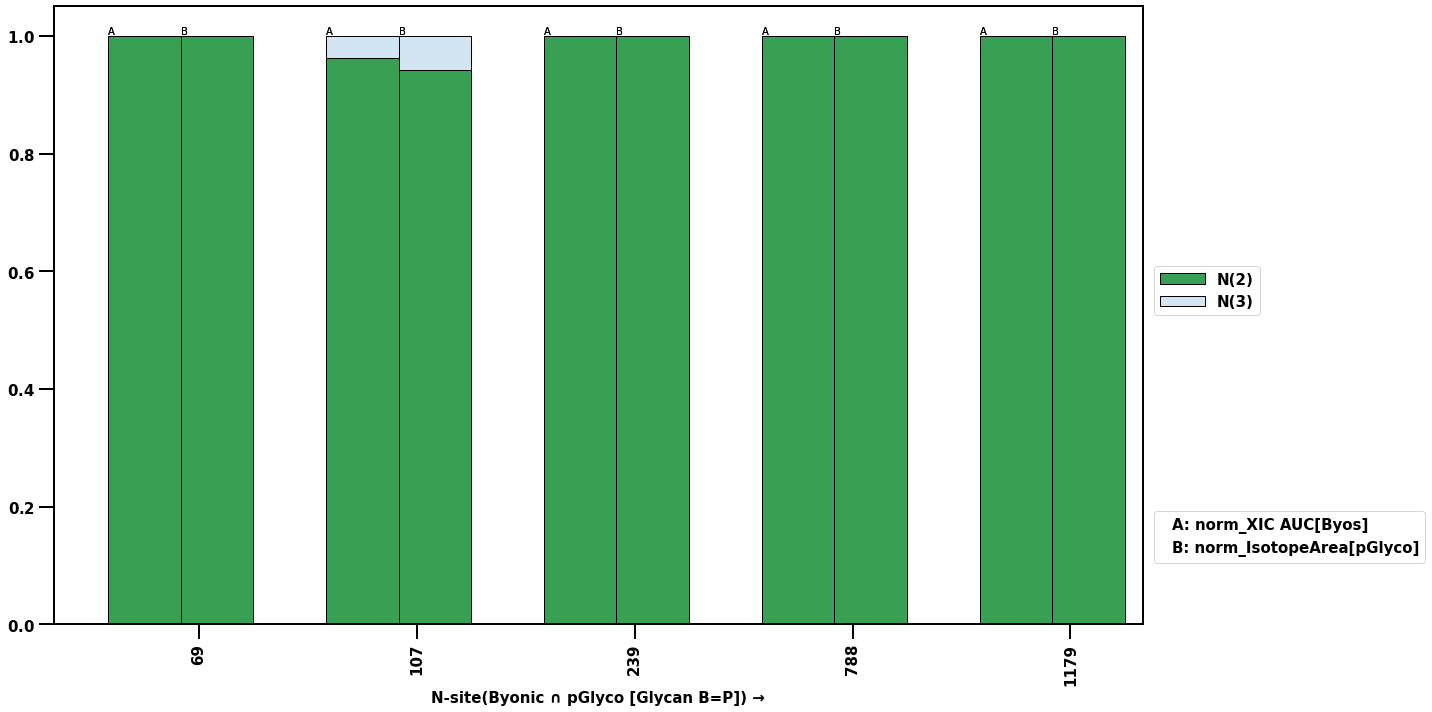

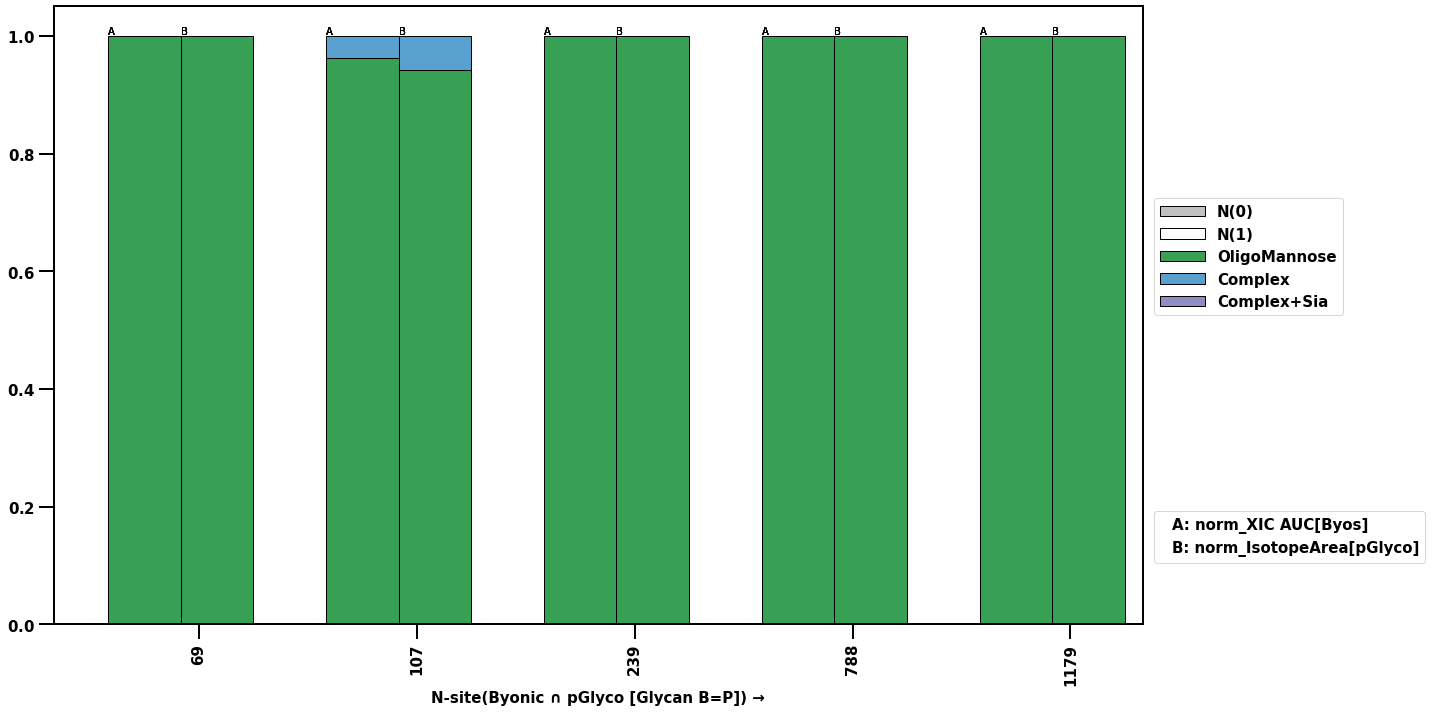

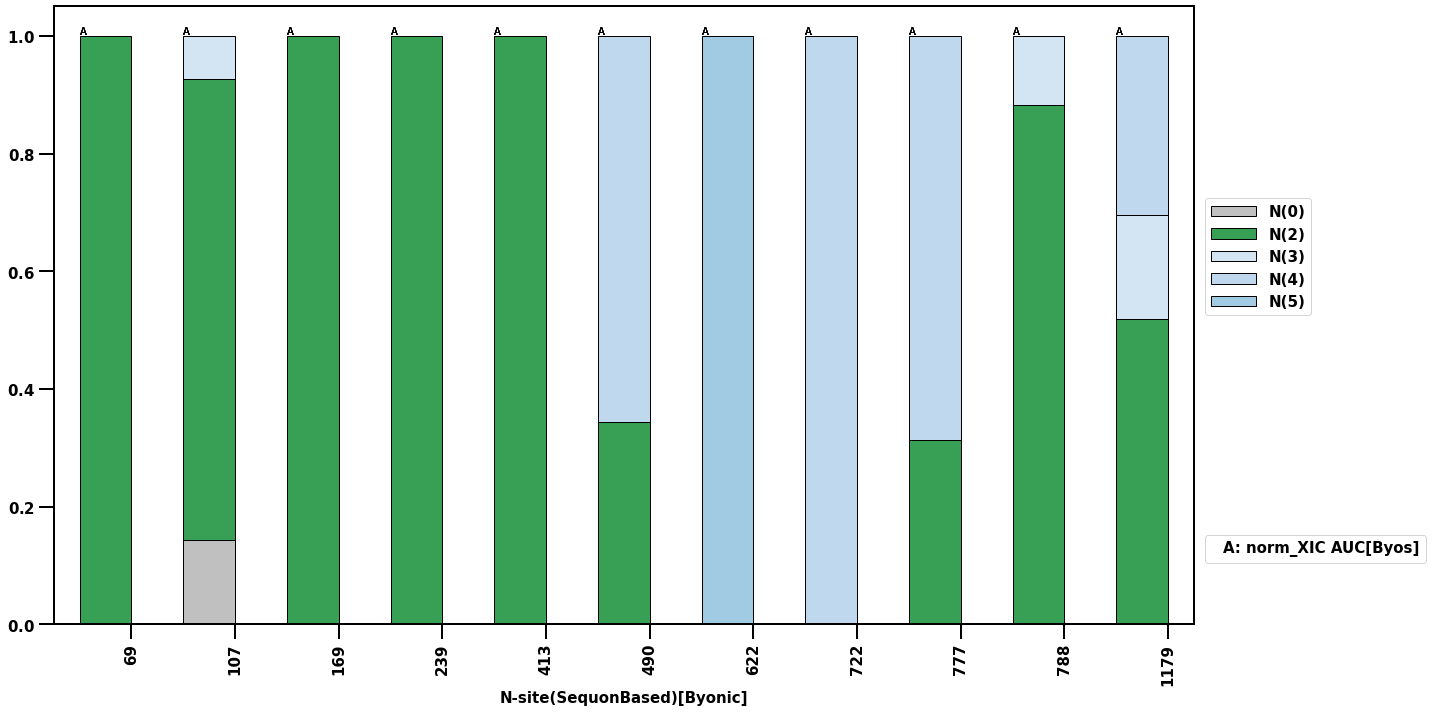

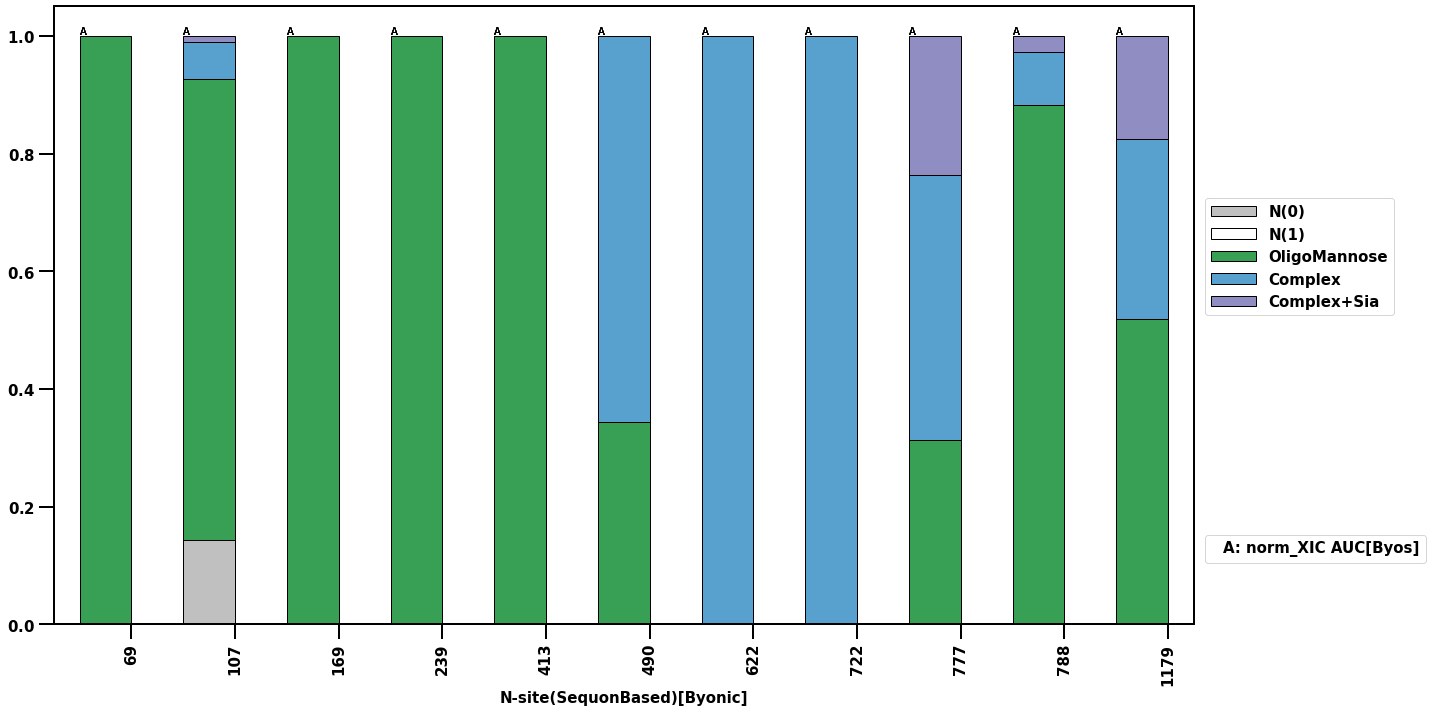

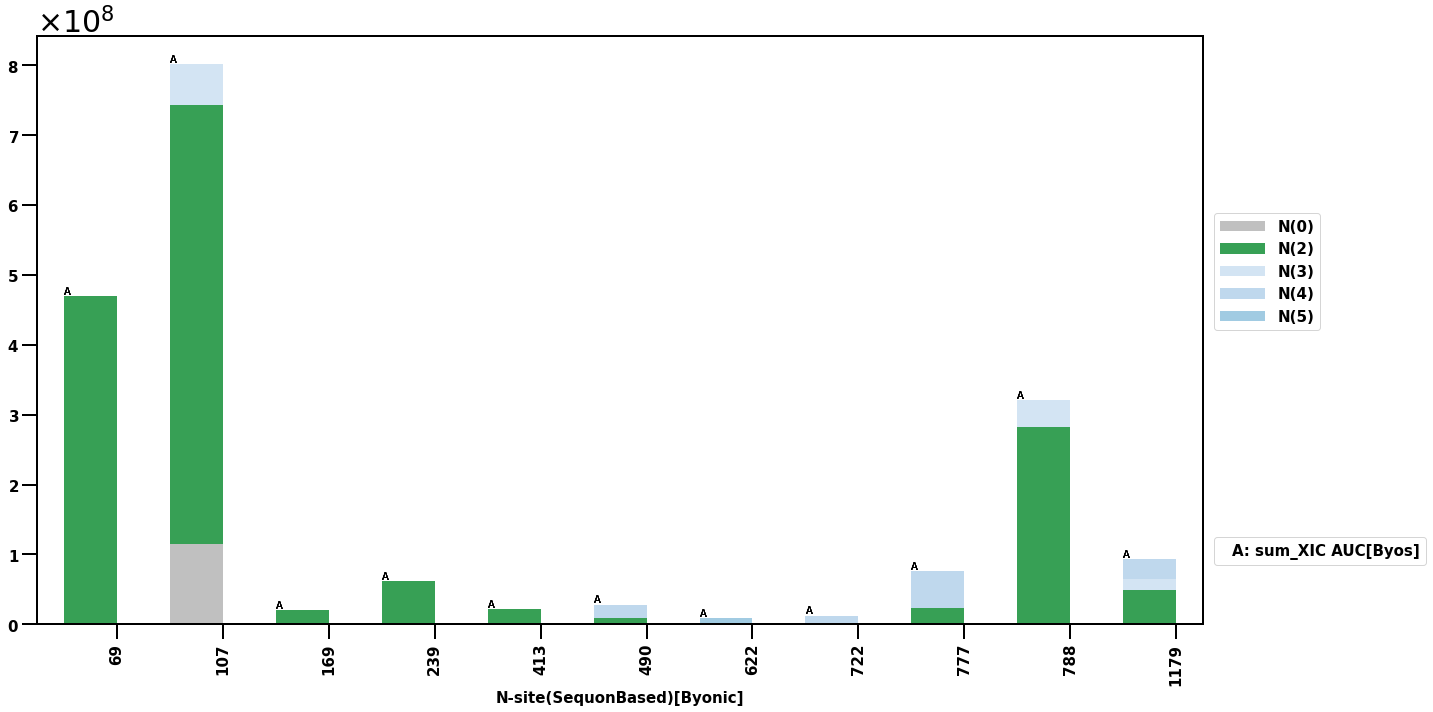

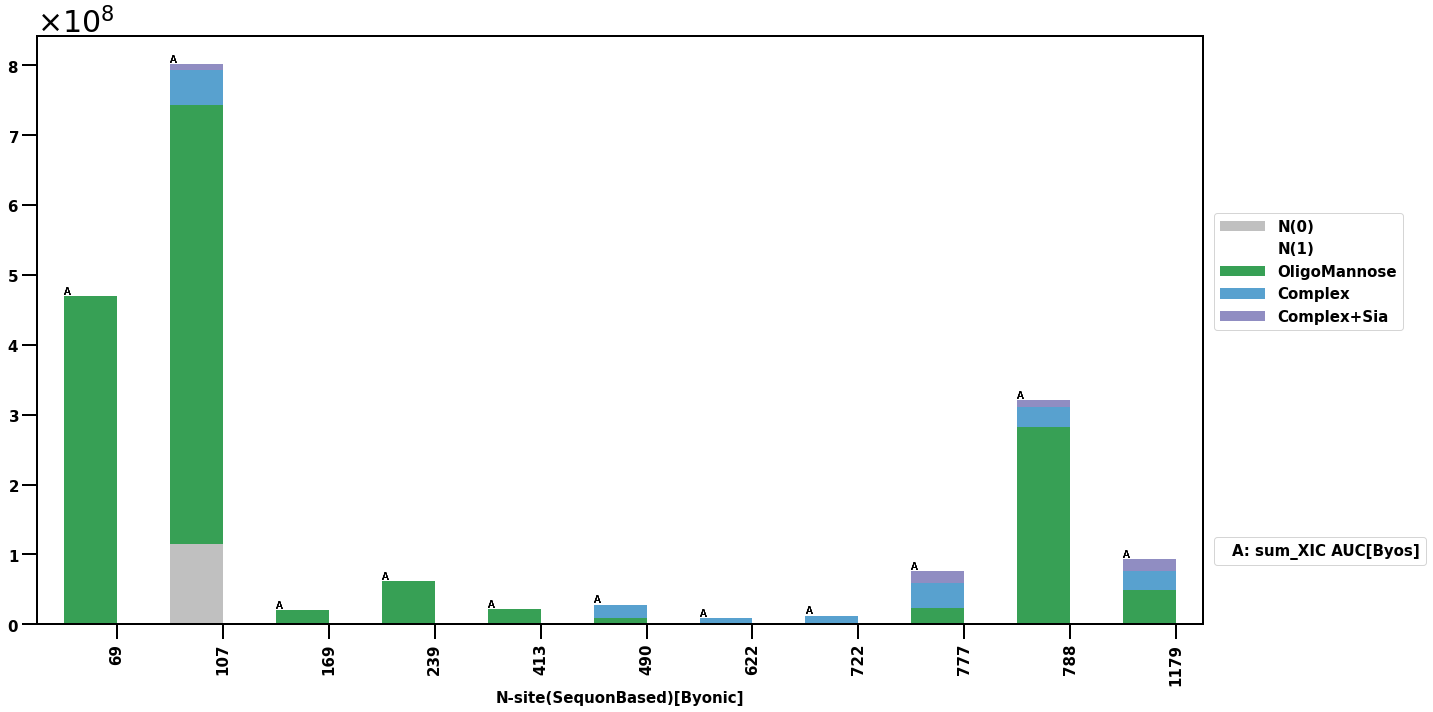

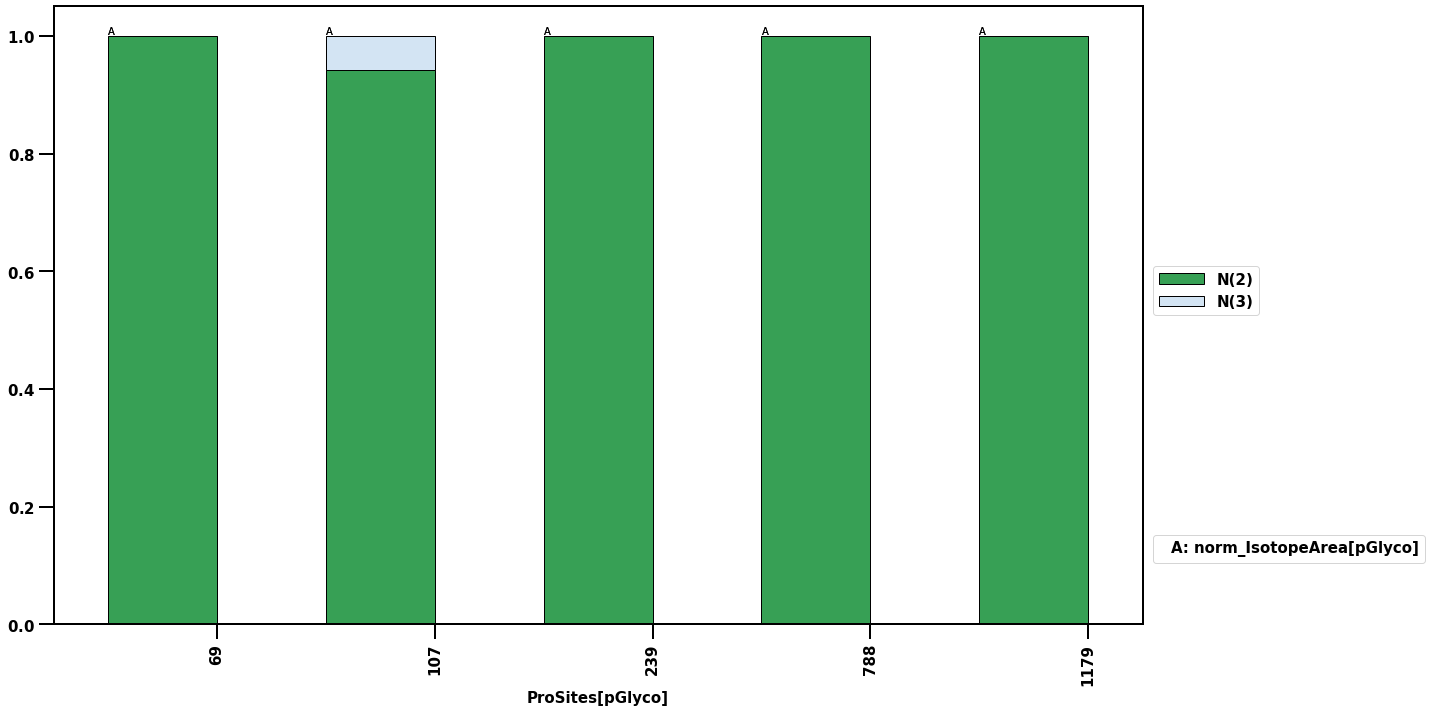

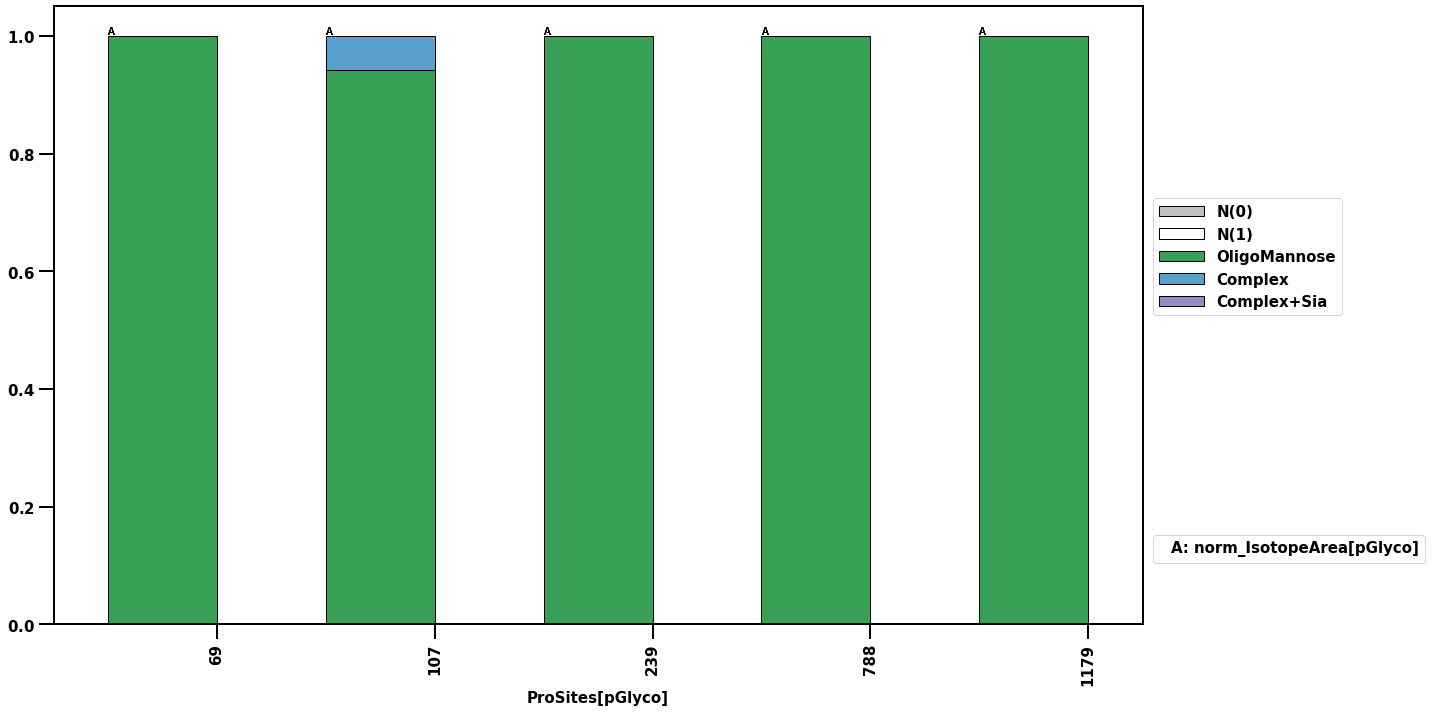

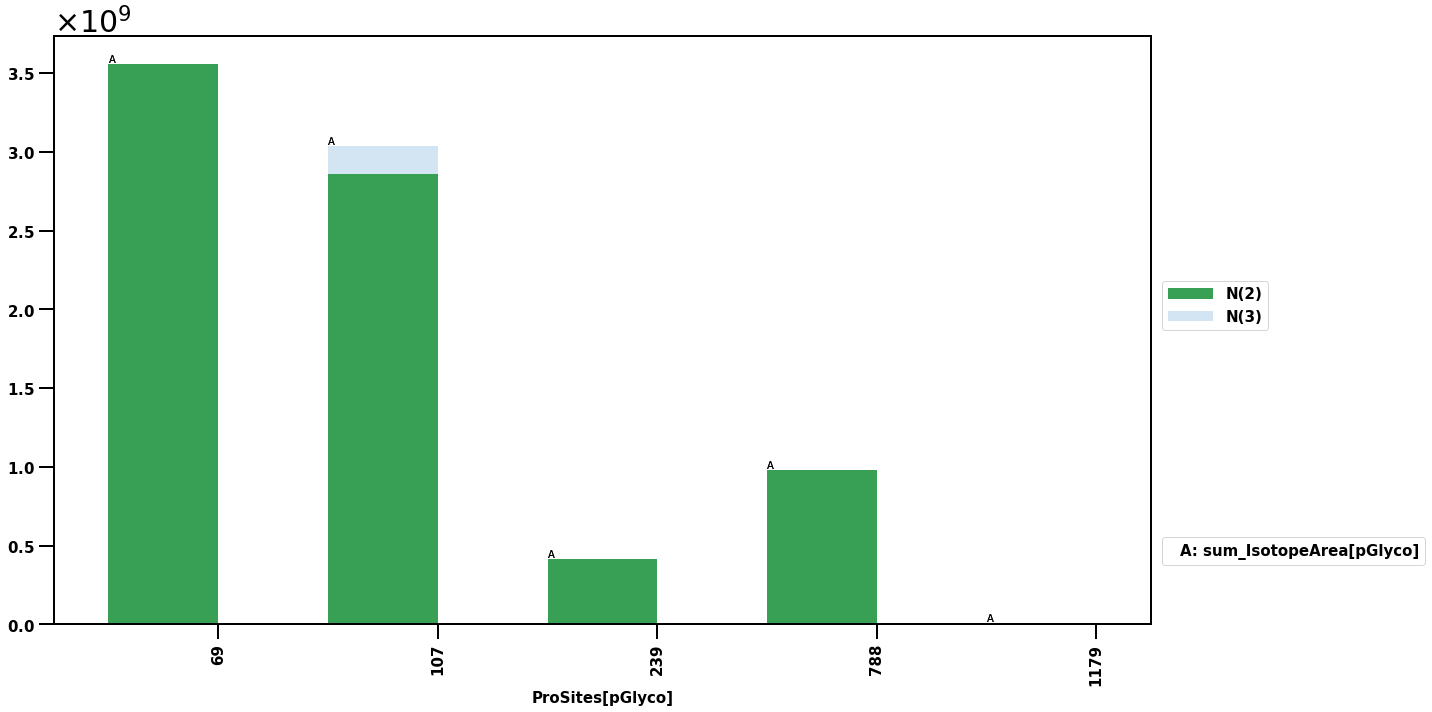

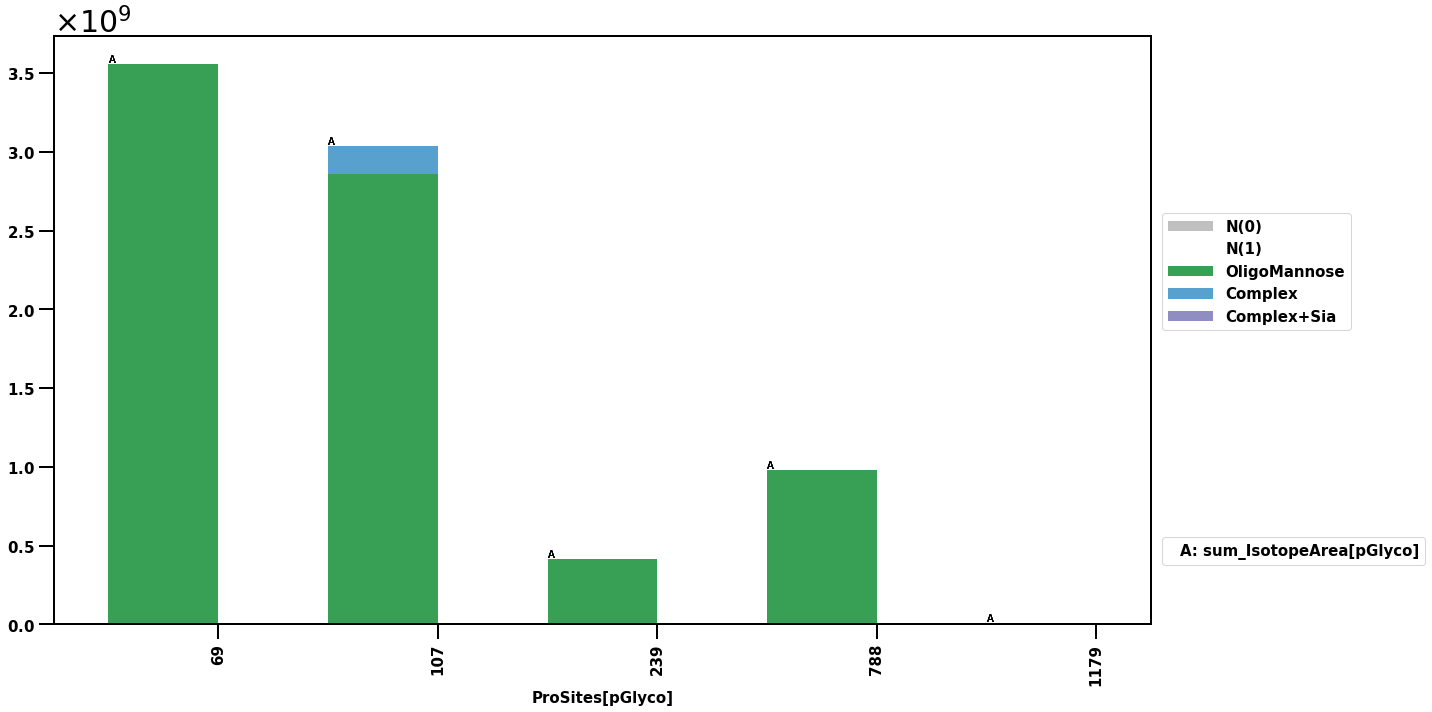

In [1]:
# TO-DO
# DEAL W/ O GLYCAN, NEW UNIQUE FILE, FIX PSM IN OTHER CONDIIONS(REMEMBER TO DELETE MISSING DROP COL IN ID_DF), AUTOMATE CSV TO EXCEL CONVERSION, PGLYCO CAN HAVE NO ETDSCAN COL, CHANGE TO 20210703_ALL_[byonic filename](khoo version, preserve long version as default)... FORMAT, ADD COLOR SUMMARY TABLE, log file add parameters, write to zip, DO NOT ADD _Figures 
# %%capture cap --no-stderr
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
from IPython.display import display, HTML
import re # finding specific patterns in str
import textwrap # split text into equal parts
import collections # return repeated items in list
from collections import OrderedDict
import time
from datetime import datetime # attach current date to export filename
import sys
import ast # convert str back to tuple/list/int, etc
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import string

## INPUT EXCEL FILES
byonicfile = 'MERS_S_fm2P_Insol_TC_NG_Byonic' # Please paste filename here. if None, please leave it as empty string '' (NOTE: DO NOT INCLUDE .XLSX HERE)
byosfile = 'MERS_S-fm2P_Insol_TC_NG_Byos' # Please paste filename here. if None, please leave it as empty string '' (NOTE: DO NOT INCLUDE .XLSX HERE)
pglycofile = 'MERS_S_fm2P_Insol_TC_NG_pGlyco' # Please paste filename here. if None, please leave it as empty string '' (NOTE: DO NOT INCLUDE .XLSX HERE)

# byonicfile = 'UU4_HEK_T_Chy' # Please paste filename here. if None, please leave it as empty string '' (NOTE: DO NOT INCLUDE .XLSX HERE)
# byosfile = 'byos_hUU4_human' # Please paste filename here. if None, please leave it as empty string '' (NOTE: DO NOT INCLUDE .XLSX HERE)
# pglycofile = 'pglyco_hUU4_human' # Please paste filename here. if None, please leave it as empty string '' (NOTE: DO NOT INCLUDE .XLSX HERE)

## INPUT TARGET PROTEIN SEQUENCE FOR MAJOR GLYCOFORM TABLE
# uu4 seq
# seq = 'MDAMKRGLCCVLLLCGAVFVSPSASDAPHGVTLPHFNTSHNNSKFELNFYNFLQTWDIPPNTETILGGYLPYCDHEDNCGWYNFVYNNKVGPNAKYSYINTQNLNIPNVHGVYFDVREHNSDGVWDQIDRVGLLIAIHGTSHYSLLMVLQDGVEASQPHVAVKICHWNPGNISTYHQFDVNLGDGGQCVFNQRFSLDTVLTANDFYGFQWTDTYVDIYLGGTITKVWVVNDWSVVEASISSHWNALNYGYYIQFVNRTTYYAYNSTGGSNYTHLQLTECHTDYCAGYAKNVFVPIDGKIPEGFSFSNWFLLTDKSTLVQGRVLSSQPVFVQCLRPVPTWSNNTAVVHFKNDVFCPNVTADVLRFNLNFSDTDVYTDSTTDDQLHFTFEDNTTASITCYSSANVTDNQPASGSISHTPFVSNSYLCFANFSHSSVSRQFLGILPPTVREFAFGRDGSIFVNGYKYFSLQPIKSVNFSISSVENYGFWTIAYTNYTDVMVDVNGTVITRLFYCDSPLNRIKCQQLKHELPDGFYSASMLVKKDLPKTFVTMPQFYNWMNVTLHVVLNDIEKKADIILAGAPELASLADIHFEIAQANGSVVNVTSVCVQARQLALFYKYTSLQGLYTYSNLVQLQNYDCPFSPQQFNNYLQFETLCFDVSPAVAGCKWSLVHDVKWRTQFATITVSYKDGAMITTMPKAQLGFQDISNIVKDECTDYNIYGFQGTGIIRSTTSRLVAGLYYTSASGDLLGFKISTTGEIFTVVPCDLTAQAAVINDEIVGAITATNQTDLFEFVNHTWSRSARGSSPSTVNTYTMPQFYYITKWNNGTSSNCTSVITYSSFAICNTGEIKYVNVTHVEIVDDSVGVIKPVSTGNITIPKNFTVAVQAEYVQIQVKPVAVDCAKYVCNGNRHCLNLLTQYTSACQTIENSLNLGARLESLMLNDMITVSDRSLEFATVDKFNTTALGGEKLGGLYFDGLSSLLPPRVGMRSAVEDLLFNKVVTSGLGTVDDDYKKCSAGTDVADLVCAQYYNGIMVLPGVVDYNKMAMYTASLIGGMALGSITSAVAVPFSMQVQARLNYVALQTDVLQENQKILANAFNNAIGNITLALGKVSNAITTVSDGFNSMASALTKIQSVVNQQGEALSHLISQLQKNFQAISSSIAEIYNRLEKVEADAQVDRLITGRLAALNAYVAQTLTQYAEVKASRQLAMEKVNECVKSQSDRYGFCGNGTHLFSLVNSAPDGLLFFHTVLLPTEWEEVTAWSGICVNDTYAYLLKDFDHSIFSYNGTYMVTPRNMFQPRKPQMSDFVQITSCEVTFLNTTHTTFQEIVIDYIDINKTIADMLEQYHSNYTTPELDLQLEIFNQTKLNLTAEIDQLEQRADNLTNIAHELQQYIDNLNKTIVDLEWLNRIETYVKWPGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQDNSADIQHSGGRSSLEGPRFEGKPIPNPLLGLDSTRTGHHHHHH' # Please paste the pure aa. seq into '' (case insensitive)

# P1 seq
# seq = 'MFVFLVLLPLVSSQCVNFTNRTQLPSAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNYPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLSEFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGTIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEYVNNSYECDIPIGAGICASYQTQTNSPGSASSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDPPEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAAIKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQEFGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQDNSADIQHSGRPLESRGPFEQKLISEEDLNMHTGHHHHHH'

# SA seq
# seq = 'MFVFLVLLPLVSSQCVNFTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFANPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRGLPQGFSALEPLVDLPIGINITRFQTLHISYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPGSASSVASQSIIAYTMSLGVENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDPPEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQEFGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQDNSADIQHSGRPLESRGPFEQKLISEEDLNMHTGHHHHHH'

# pedv ns seq
# seq = 'MDAMKRGLCCVLLLCGAVFVSPSASQDVTRCSAKTNFRRFFSKFNVQAPAVVVLGGYLPIGENQGVNSTWYCAGQHPTASGVHGIFVSHIRGGHGFEIGISQEPFDPSGYQLYLHKATNGNTNATARLRICQFPSIKTLGPTANNDVTTGRNCLFNKAIPAHMSEHSVVGITWDNDRVTVFSDKIYYFYFKNDWSRVATKCYNSGGCAMQYVYEPTYYMLNVTSAGEDGISYQPCTANCIGYAANVFATEPNGHIPEGFSFNNWFLLSNDSTLVHGKVVSNQPLLVNCLLAIPKIYGLGQFFSFNQTIDGVCNGAAVQRAPEALRFNINDTSVILAEGSIVLHTALGTNFSFVCSNSSNPHLATFAIPLGATQVPYYCFLKVDTYNSTVYKFLAVLPPTVREIVITKYGDVYVNGFGYLHLGLLDAVTINFTGHGTDDDVSGFWTIASTNFVDALIEVQGTAIQRILYCDDPVSQLKCSQVAFDLDDGFYPISSRNLLSHEQPISFVTLPSFNDHSFVNITVSASFGGHSGANLIASDTTINGFSSFCVDTRQFTISLFYNVTNSYGYVSNSQDSNCPFTLQSVNDYLSFSKFCVSTSLLASACTIDLFGYPEFGSGVKFTSLYFQFTKGELITGTPKPLEGVTDVSFMTLDVCTKYTIYGFKGEGIITLTNSSFLAGVYYTSDSGQLLPFKNVTSGAVYSVTPCSFSEQAAYVDDDIVGVISSLSSSTFNSTRELPGFFYHSNDGSNCTEPVLVYSNIGVCKSGSIGYVPSQSGQVKIAPTVTENISIPTNFSMSIKTEYLQLYNTPVSVDCATYVCNGNSRCKQLLTQYTAACKTIESALQLSARLESVEVNSMLTISEEALQLATISSFNGDGYNFTNVLGVSVYDPASGRVVQKRSFIEDLLFNKVVTNGLGTVDEDYKRCSNGRSVADLVCAQYYSGVMVLPGVVDAEKLHMYSASLIGGMVLGGFTSAAALPFSYAVQARLNYLALQTDVLQRNQQLLAESFNSAIGNITSAFESVKEAISQTSKGLNTVAHALTKVQEVVNSQGAALTQLTVQLQHNFQAISSSIDDIYSRLDILSADVQVDRLITGRLSALNAFVAQTLTKYTEVQASRKLAQQKVNECVKSQSQRYGFCGGDGEHIFSLVQAAPQGLLFLHTVLVPSDFVDVIAIAGLCVNDEIALTLREPGLVLFTHELQNHTATEYFVSSRRMFEPRKPTVSDFVQIESCVVTYVNLTRDQLPDVIPDYIDVNKTLDEILASLPNRTGPSLPLDVFNATYLNLTGEIADLEQRSESLRNTTEELQSLIYNINNTLVDLEWLNRVETYIKWP'

# pedv os seq
# seq = 'MDAMKRGLCCVLLLCGAVFVSPSASDVTRCQSTINFRRFFSKFNVQAPAVVVLGGYLPSMNSSSWYCGTGLETASGVHGIFLSYIDSGQGFEIGISQEPFDPSGYQLYLHKATNGNQDAIARLRICQFPNNKTLGPSVNDVTTGRNCLFNKAIPAYMQDGKNIIVGITWDNDRVTVFADKIYHFYLKNEWSRVATRCYNKRSCAMQYVYTPTYYMLNVTSAGEDGIYYSLCTANCIGYAVNVFATDSNGHIPEGFSFNNWFLLSNDSTLLHGKVVSNQPLLVNCLLAIPKIYGLGQFFSFNQTMDGACNGVAAQRAPEALRFNINDTSVILAEGSIVLHTALGTNLSFVCSNSSDPHLSTFAIPLGATQVPYYCFLKVDTYNSTVYKFLAVLPPTVREIVITKYGDVYVNGFGYLHLGLLDAVTINFTGHGTDDDVSGFWTIASTNFVDALIEVQGTAIERILYCDDPVSQLKCSQVAFDLDDGFYPISSRNLLSHEQPISFVTLPSFNDHSFVNITVSASFGGHSGANVIASDTTINGFSSFCVDTRQFTISLFYNVTNIYGYVSTSQGSNCPFTLQSVNDYLSFSKFCVSTSLLASACTIDLFGYPDFGSGVKLTSLYFQFTKGELITGTPKPLQGVTDVSFMTLDVCTKYTIYGFKGEGVITLTNSSFLAGVYYTSDSGQLLAFKNVTSGAVYSVTPCSFSEQAAYVDDDIVGVISSLSNSTFNSTRELPGFFYHSNDGSNCTEPVLVYSNIGVCKSGSIGYVPSQSGQVKIAPTVTGNISIPTNFSMSIRTEYLQLYNTPVSVDCATYVCNGNSRCKQLLTQYTAACKTIESALQLSARLESVEVNSMLTISEEALQLATVSSFNGDGYNFTNVLGVSVYDPASGRVVQKRSFIEDLLFNKVVTNGLGTVDEDYKRCSKGRSVADLVCAQYYSGVMVLPGVVDAEKLHMYSASLIGGMVLGGFTAAAALPFSYAVQARLNYLALQTDVLQRNQQLLAESFNSAIGNITSAFESVKEAISQTSKGLNTVAHALTKVQEVVNSQGAALTQLTVQLQHNFQAISSSIDDIYSRLDSLSADVQVDRLITGRLSALNAFVAQTLTKYTEVQASRKLAQQKVNECVKSQSQRYGFCGGDGEHIFSLVQAAPQGLLFLHTVLVPGDFVNVIAIAGLCVNDEIALTLREPGLVLFTHELQNYTATEYFVSSRRMFEPRKPTFSDFVQIESCVVTYVNLTRDQLPDVIPDYIDVNKTLDEILASLPNRTGPSLPLDVFNATYLNLTGEIADLEQRSESLRNTTEELQSLIYNINNTLVDLEWLNRVETYIKWPGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQDNSADIQHSGGRSSLEGPRFEGKPIPNPLLGLDSTRTGHHHHHH'

# MERS_S_fm2P_inHouse
seq = 'MDSWFILVLLGSGLICVSASYVDVGPDSVKSACIEVDIQQTFFDKTWPRPIDVSKADGIIYPQGRTYSNITITYQGLFPYQGDHGDMYVYSAGHATGTTPQKLFVANYSQDVKQFANGFVVRIGAAANSTGTVIISPSTSATIRKIYPAFMLGSSVGNFSDGKMGRFFNHTLVLLPDGCGTLLRAFYCILEPRSGNHCPAGNSYTSFATYHTPATDCSDGNYNRNASLNSFKEYFNLRNCTFMYTYNITEDEILEWFGITQTAQGVHLFSSRYVDLYGGNMFQFATLPVYDTIKYYSIIPHSIRSIQSDRKAWAAFYVYKLQPLTFLLDFSVDGYIRRAIDCGFNDLSQLHCSYESFDVESGVYSVSSFEAKPSGSVVEQAEGVECDFSPLLSGTPPQVYNFKRLVFTNCNYNLTKLLSLFSVNDFTCSQISPAAIASNCYSSLILDYFSYPLSMKSDLSVSSAGPISQFNYKQSFSNPTCLILATVPHNLTTITKPLKYSYINKCSRLLSDDRTEVPQLVNANQYSPCVSIVPSTVWEDGDYYRKQLSPLEGGGWLVASGSTVAMTEQLQMGFGITVQYGTDTNSVCPKLEFANDTKIASQLGNCVEYSLYGVSGRGVFQNCTAVGVRQQRFVYDAYQNLVGYYSDDGNYYCLRACVSVPVSVIYDKETKTHATLFGSVACEHISSTMSQYSRSTRSMLKRRDSTYGPLQTPVGCVLGLVNSSLFVEDCKLPLGQSLCALPDTPSTLTPASVGSVPGEMRLASIAFNHPIQVDQLNSSYFKLSIPTNFSFGVTQEYIQTTIQKVTVDCKQYVCNGFQKCEQLLREYGQFCSKINQALHGANLRQDDSVRNLFASVKSSQSSPIIPGFGGDFNLTLLEPVSISTGSRSARSAIEDLLFDKVTIADPGYMQGYDDCMQQGPASARDLICAQYVAGYKVLPPLMDVNMEAAYTSSLLGSIAGVGWTAGLSSFAAIPFAQSIFYRLNGVGITQQVLSENQKLIANKFNQALGAMQTGFTTTNEAFQKVQDAVNNNAQALSKLASELSNTFGAISASIGDIIQRLDPPEQDAQIDRLINGRLTTLNAFVAQQLVRSESAALSAQLAKDKVNECVKAQSKRSGFCGQGTHIVSFVVNAPNGLYFMHVGYYPSNHIEVVSAYGLCDAANPTNCIAPVNGYFIKTNNTRIVDEWSYTGSSFYAPEPITSLNTKYVAPQVTYQNISTNLPPPLLGNSTGIDFQDELDEFFKNVSTSIPNFGSLTQINTTLLDLTYEMLSLQQVVKALNESYIDLKELGNYTYEFGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQDNSADIQHSGRPLESRGPFEQKLISEEDLNMHTGHHHHHH'

# SARS_S_2P_inHouse 
# seq = 'MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYLTQDLFLPFYSNVTGFHTINHTFDNPVIPFKDGIYFAATEKSNVVRGWVFGSTMNNKSQSVIIINNSTNVVIRACNFELCDNPFFAVSKPMGTQTHTMIFDNAFNCTFEYISDAFSLDVSEKSGNFKHLREFVFKNKDGFLYVYKGYQPIDVVRDLPSGFNTLKPIFKLPLGINITNFRAILTAFSPAQDTWGTSAAAYFVGYLKPTTFMLKYDENGTITDAVDCSQNPLAELKCSVKSFEIDKGIYQTSNFRVVPSGDVVRFPNITNLCPFGEVFNATKFPSVYAWERKKISNCVADYSVLYNSTFFSTFKCYGVSATKLNDLCFSNVYADSFVVKGDDVRQIAPGQTGVIADYNYKLPDDFMGCVLAWNTRNIDATSTGNYNYKYRYLRHGKLRPFERDISNVPFSPDGKPCTPPALNCYWPLNDYGFYTTTGIGYQPYRVVVLSFELLNAPATVCGPKLSTDLIKNQCVNFNFNGLTGTGVLTPSSKRFQPFQQFGRDVSDFTDSVRDPKTSEILDISPCSFGGVSVITPGTNASSEVAVLYQDVNCTDVSTAIHADQLTPAWRIYSTGNNVFQTQAGCLIGAEHVDTSYECDIPIGAGICASYHTVSLLRSTSQKSIVAYTMSLGADSSIAYSNNTIAIPTNFSISITTEVMPVSMAKTSVDCNMYICGDSTECANLLLQYGSFCTQLNRALSGIAAEQDRNTREVFAQVKQMYKTPTLKYFGGFNFSQILPDPLKPTKRSFIEDLLFNKVTLADAGFMKQYGECLGDINARDLICAQKFNGLTVLPPLLTDDMIAAYTAALVSGTATAGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKQIANQFNKAISQIQESLTTTSTALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDPPEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQAAPHGVVFLHVTYVPSQERNFTTAPAICHEGKAYFPREGVFVFNGTSWFITQRNFFSPQIITTDNTFVSGNCDVVIGIINNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQEFGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQDNSADIQHSGRPLESRGPFEQKLISEEDLNMHTGHHHHHH'

# HKU1
# seq = 'MFLIIFILPTTLAVIGDFNCTNSFINDYNKTIPRISEDVVDVSLGLGTYYVLNRVYLNTTLLFTGYFPKSGANFRDLALKGSIYLSTLWYKPPFLSDFNNGIFSKVKNTKLYVNNTLYSEFSTIVIGSVFVNTSYTIVVQPHNGILEITACQYTMCEYPHTVCKSKGSIRNESWHIDSSEPLCLFKKNFTYNVSADWLYFHFYQERGVFYAYYADVGMPTTFLFSLYLGTILSHYYVMPLTCNAISSNTDNETLEYWVTPLSRRQYLLNFDEHGVITNAVDCSSSFLSEIQCKTQSFAPNTGVYDLSGFTVKPVATVYRRIPNLPDCDIDNWLNNVSVPSPLNWERRIFSNCNFNLSTLLRLVHVDSFSCNNLDKSKIFGSCFNSITVDKFAIPNRRRDDLQLGSSGFLQSSNYKIDISSSSCQLYYSLPLVNVTINNFNPSSWNRRYGFGSFNLSSYDVVYSDHCFSVNSDFCPCADPSVVNSCAKSKPPSAICPAGTKYRHCDLDTTLYVKNWCRCSCLPDPISTYSPNTCPQKKVVVGIGEHCPGLGINEEKCGTQLNHSSCFCSPDAFLGWSFDSCISNNRCNIFSNFIFNGINSGTTCSNDLLYSNTEISTGVCVNYDLYGITGQGIFKEVSAAYYNNWQNLLYDSNGNIIGFKDFLTNKTYTILPCYSGRVSAAFYQNSSSPALLYRNLKCSYVLNNISFISQPFYFDSYLGCVLNAVNLTSYSVSSCDLRMGSGFCIDYALPSSGGSGSGISSPYRFVTFEPFNVSFVNDSVETVGGLFEIQIPTNFTIAGHEEFIQTSSPKVTIDCSAFVCSNYAACHDLLSEYGTFCDNINSILNEVNDLLDITQLQVANALMQGVTLSSNLNTNLHSDVDNIDFKSLLGCLGSQCGSSSRSLLEDLLFNKVKLSDVGFVEAYNNCTGGSEIRDLLCVQSFNGIKVLPPILSETQISGYTTAATVAAMFPPWSAAAGVPFSLNVQYRINGLGVTMDVLNKNQKLIANAFNKALLSIQNGFTATNSALAKIQSVVNANAQALNSLLQQLFNKFGAISSSLQEILSRLDPPEAQVQIDRLINGRLTALNAYVSQQLSDITLIKAGASRAIEKVNECVKSQSPRINFCGNGNHILSLVQNAPYGLLFIHFSYKPTSFKTVLVSPGLCLSGDRGIAPKQGYFIKQNDSWMFTGSSYYYPEPISDKNVVFMNSCSVNFTKAPFIYLNNSIPNLSDFEAELSLWFKNHTSIAPNLTFNSHINATFLDLYYEMNVIQESIKSLNEFGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQNSADIQHSGRPLESRGPFEQKLISEEDLNMHTGHHHHHH'

# OC43
# seq = 'MGILPSPGMPALLSLVSLLSVLLMGCVAETGTVIGDLKCTSDNINDKDTGPPPISTDTVDVTNGLGTYYVLDRVYLNTTLFLNGYYPTSGSTYRNMALKGSVLLSRLWFKPPFLSDFINGIFAKVKNTKVIKDRVMYSEFPAITIGSTFVNTSYSVVVQPRTINSTQDGDNKLQGLLEVSVCQYNMCEYPQTICHPNLGNHRKELWHLDTGVVSCLYKRNFTYDVNADYLYFHFYQEGGTFYAYFTDTGVVTKFLFNVYLGMALSHYYVMPLTCNSKLTLEYWVTPLTSRQYLLAFNQDGIIFNAVDCMSDFMSEIKCKTQSIAPPTGVYELNGYTVQPIADVYRRKPNLPNCNIEAWLNDKSVPSPLNWERKTFSNCNFNMSSLMSFIQADSFTCNNIDAAKIYGMCFSSITIDKFAIPNGRKVDLQLGNLGYLQSFNYRIDTTATSCQLYYNLPAANVSVSRFNPSTWNKRFGFIEDSVFKPRPAGVLTNHDVVYAQHCFKAPKNFCPCKLNGSCVGSGPGKNNGIGTCPAGTNYLTCDNLCTPDPITFTGTYKCPQTKSLVGIGEHCSGLAVKSDYCGGNSCTCRPQAFLGWSADSCLQGDKCNIFANFILHDVNSGLTCSTDLQKANTDIILGVCVNYDLYGILGQGIFVEVNATYYNSWQNLLYDSNGNLYGFRDYITNRTFMIRSCYSGRVSAAFHANSSEPALLFRNIKCNYVFNNSLTRQLQPINYFDSYLGCVVNAYNSTAISVQTCDLTVGSGYCVDYSKNGGSGGAITTGYRFTNFEPFTVNSVNDSLEPVGGLYEIQIPSEFTIGNMVEFIQTSSPKVTIDCAAFVCGDYAACKSQLVEYGSFCDNINAILTEVNELLDTTQLQVANSLMNGVTLSTKLKDGVNFNVDDINFSPVLGCLGSECSKASSRSAIEDLLFDKVKLSDVGFVEAYNNCTGGAEIRDLICVQSYKGIKVLPPLLSENQFSGYTLAATSASLFPPWTAAAGVPFYLNVQYRINGLGVTMDVLSQNQKLIANAFNNALYAIQEGFDATNSALVKIQAVVNANAEALNNLLQQLSNRFGAISASLQEILSRLDPPEAEAQIDRLINGRLTALNAYVSQQLSDSTLVKFSAAQAMEKVNECVKSQSSRINFCGNGNHIISLVQNAPYGLYFIHFSYVPTKYVTARVSPGLCIAGDRGIAPKSGYFVNVNNTWMYTGSGYYYPEPITENNVVVMSTCAVNYTKAPYVMLNTSIPNLPDFKEELDQWFKNQTSVAPDLSLDYINVTFLDLLGSGRENLYFQGGGGSGYIPEAPRDGQAYVRKDGEWVLLSTFLGHHHHHHHHGLNDIFEAQKIEWHE'

# inh-NL63-S-2P
# seq = 'MKLFLILLVLPLASCFFTCNSNANLSMLQLGVPDNSSTIVTGLLPTHWICANQSTSVYSANGFFYIDVGNHRSAFALHTGYYDVNQYYIYVTNEIGLNASVTLKICKFGINTTFDFLSNSSSSFDCIVNLLFTEQLGAPLGITISGETVRLHLYNVTRTFYVPAAYKLTKLSVKCYFNYSCVFSVVNATVTVNVTTHNGRVVNYTVCDDCNGYTDNIFSVQQDGRIPNGFPFNNWFLLTNGSTLVDGVSRLYQPLRLTCLWPVPGLKSSTGFVYFNATGSDVNCNGYQHNSVADVMRYNLNFSANSVDNLKSGVIVFKTLQYDVLFYCSNSSSGVLDTTIPFGPSSQPYYCFINSTINTTHVSTFVGVLPPTVREIVVARTGQFYINGFKYFDLGFIEAVNFNVTTASATDFWTVAFATFVDVLVNVSATKIQNLLYCDSPFEKLQCEHLQFGLQDGFYSANFLDDNVLPETYVALPIYYQHTDINFTATASFGGSCYVCKPHQVNISLNGNTSVCVRTSHFSIRYIYNRVKSGSPGDSSWHIYLKSGTCPFSFSKLNNFQKFKTICFSTVAVPGSCNFPLEATWHYTSYTIVGALYVTWSEGNSITGVPYPVSGIREFSNLVLNNCTKYNIYDYVGTGIIRSSNQSLAGGITYVSNSGNLLGFKNVSTGNIFIVTPCNQPDQVAVYQQSIIGAMTAVNESRYGLQNLLQLPNFYYVSNGGNNCTTAVMTYSNFGICADGSLIPVRLRNSSDNGISAIITANLSIPSNWTTSVQVEYLQITSIPIVVDCATYVCNGNPRCKNLLKQYTSACKTIEDALRLSAHLETNDVSSMLTFDSNAFSLANVTSFGDYNLSSVLPQRNIHSSRIAGRSALEDLLFSKVVTSGLGTVDVDYKSCTKGLSIADLACAQYYNGIMVLPGVADAERMAMYTGSLIGGMVLGGLTSAAAIPFSLALQARLNYVALQTDVLQENQKILAASFNKAINNIVASFSSVNDAITQTAEAIHTVTIALNKIQDVVNQQGSALNHLTSQLRHNFQAISNSIQAIYDRLDPPQADQQVDRLITGRLAALNAFVSQVLNKYTEVRSSRRLAQQKINECVKSQSNRYGFCGNGTHIFSIVNSAPDGLLFLHTVLLPTDYKNVKAWSGICVDGIYGYVLRQPNLVLYSDNGVFRVTSRVMFQPRLPVLSDFVQIYNCNVTFVNISRVELHTVIPDYVDVNKTLQEFAQNLPKYVKPNFDLTPFNLTYLNLSSELKQLEAKTASLFQTTVELQGLIDQINSTYVDLKLLNRFENEFGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQDNSADIQHSGRPLESRGPFEQKLISEEDLNMHTGHHHHHH'

# inh-229E-S-2P
# seq = 'MFVLLVAYALLHIAGCQTTNGTNTSHSVCNGCVGHSENVFAVESGGYIPSNFSFNNWFLLTNTSSVVDGVVRSFQPLLLNCLWSVSGSQFTTGFVYFNGTGRGACKGFYSNASSDVIRYNINFEENLRRGTILFKTSYGAVVFYCTNNTLVSGDAHIPSGTVLGNFYCFVNTTIGNETTSAFVGALPKTVREFVISRTGHFYINGYRYFSLGDVEAVNFNVTNAATIVCTVALASYADVLVNVSQTAIANIIYCNSVINRLRCDQLSFDVPDGFYSTSPIQPVELPMSIVSLPVYHKHTFIVLHVKFEHQRGPGKCYNCRPSVINITLANFNETKGPLCVDTSHFTTQFVDNVKLARWSASINTGNCPFSFGKVNNFVKFGSVCFSLKDIPGGCAMPIMANLVNHKSHNIGSLYVSWSDGDVITGVPKPVEGVSSFMNVTLNKCTKYNIYDVSGVGVIRISNDTFLNGITYTSTSGNLLGFKDVTNGTIYSITPCNPPDQLVVYQQAVVGAMLSENFTSYGFSNVVEMPKFFYASNGTYNCTDAVLTYSSFGVCADGSIIAVQPRNVSYDSVSAIVTANLSIPSNWTTSVQVEYLQITSKPIVVDCSTYVCNGNVRCVELLKQYTSACKTIEDALRNSAMLESADVSEMLTFDKKAFTLANVSSFGDYNLSSVIPSLPRSGSRVAGRSAIEDILFSKLVTSGLGTVDADYKKCTKGLSIADLACAQYYNGIMVLPGVADAERMAMYTGSLIGGIALGGLTSAASIPFSLAIQSRLNYVALQTDVLQENQKILAASFNKAMTNIVDAFTGVNDAITQTSQALQTVATALNKIQDVVNQQGNSLNHLTSQLRQNFQAISSSIQAIYDRLDPPQADQQVDRLITGRLAALNVFVSHTLTKYTEVRASRQLAQQKVNECVKSQSKRYGFCGNGTHIFSLVNAAPEGLVFLHTVLLPTQYKDVEAWSGLCVDGINGYVLRQPNLALYKEGNYYRITSRIMFEPRIPTIADFVQIENCNVTFVNISRSELQTIVPEYIDVNKTLQELSYKLPNYTVPDLVVEQYNQTILNLTSEISTLENKSAELNYTVQKLQTLIDNINSTLVDLKWLNRVETYIKWPWEFGSGGYIPEAPRDGQAYVRKDGEWVLLSTFLKGQDNSADIQHSGRPLESRGPFEQKLISEEDLNMHTGHHHHHH'

## ADJUSTABLE PARAMETERS
# HCD: light colors
lightgreen_hex = '#ccffcc' 
lightblue_hex = '#cce6ff'
lightorange_hex = '#ffebcc'
# ETD: normal colors
normalgreen_hex = '#99ff99'
normalblue_hex = '#99ccff'
normalorange_hex = '#ffd699' 
# GlycanSource B+P, B/P: deep colors
darkgreen_hex = '#66ff66' 
darkblue_hex = '#66b3ff'
# byos colors
lightpink_hex = '#ffb6c1'
deeppink_hex = '#ff1493'
yellow_hex = '#ffff66' 
# BYONIC RT TOLERANCE <min.> (COUNT PSM)
byonic_rt = 3
# PGLYCO RT TOLERANCE <sec.> (COUNT PSM)
pglyco_rt = 180
# SCAN DIFFERENCE <scan num.> (ASSIGN PAIR)
byonic_scandif = 5
# PLOTTING CHOICES (whether to plot xicauc(byos)/int(byos)/mono(pglyco)/isotope(pglyco))
# if you do not want to plot anything, please set all 4 parameters to 'no'.
export_xicauc = 'yes' # set this to 'no' if byos file is not present
export_int = 'no' # set this to 'no' if byos file is not present 
export_mono = 'no' # set this to 'no' if pglyco file is not present
export_isotope = 'yes' # set this to 'no' if pglyco file is not present
# TopN
topN = 5
# BYONIC SCORE CUTOFF (default=200)
BYONIC_SCORE_CUTOFF = 200
# PGLYCO PRECURSOR MZ ROUNDING DECIMAL
RoundTo = 1

############################### PLEASE DO NOT ALTER ANYTHING BELOW ###############################
# AUXILIARY FUNCTIONS
def move_df(df, move_col, insert_left_col):
    move_df = df[move_col]
    df.drop(labels=[move_col], axis=1, inplace = True)
    df.insert(df.columns.get_loc(insert_left_col) + 1, move_col, move_df)
def findNPosBySequon(seq):
    pattern = '(?i)(N[ARNDBCEQZGHILKMFSTWYV]T)|(N[ARNDBCEQZGHILKMFSTWYV]S)' # case insensitive
    result = [(m.start(0)+1, seq[m.start(0):m.start(0)+3]) for m in re.finditer(pattern, seq)]
    return result # [(site, 'sequon'), ...(...)]
def findUnionOnly(val): # for final major glycoform table
    color = 'red'
    weight = 'bold'
    bg_color = 'WhiteSmoke'
    return f'color: {color}; font-weight: {weight}; background-color: {bg_color}'
def sort_intstr_col(df, col_to_sort):
    # accepts int & str mixed type col, no other datatype is allowed
    lst = df[col_to_sort].tolist()
    lst.sort(key=lambda v: (isinstance(v, str), v))
    sorter = list(set(lst))
    # reindex the df with .loc by the new sorted lst
    df = df.set_index(col_to_sort).loc[lst]
    df = df.drop_duplicates().reset_index()
#     df[col_to_sort] = df[col_to_sort].astype("category")
#     df[col_to_sort].cat.set_categories(sorter, inplace=True)
#     df = df.sort_values([col_to_sort]).reset_index(drop=True)
    return df
# get export filename based on input combo
def export_filename(byonicfile = '', byosfile = '', pglycofile = ''):
    names = [byonicfile, byosfile, pglycofile]
    names = [n for n in names if n != '']
    names = '_'.join(names)
    return names
# define glycansource function
def glycansource(df, colname):
    # glycan comprison: only present in byonic -> b, only present in pglyco -> p, both the same -> b+p, not the same -> b/p
    conditions = [
        (df['Glycans[Byonic]'] != -1) & (df['GlycanComposition_ByonicStyle[pGlyco]'] == -1),
        (df['Glycans[Byonic]'] == -1) & (df['GlycanComposition_ByonicStyle[pGlyco]'] != -1),
        (df['Glycans[Byonic]'] != -1) & (df['GlycanComposition_ByonicStyle[pGlyco]'] != -1) & (df['Glycans[Byonic]'] == df['GlycanComposition_ByonicStyle[pGlyco]']),
        (df['Glycans[Byonic]'] != -1) & (df['GlycanComposition_ByonicStyle[pGlyco]'] != -1) & (df['Glycans[Byonic]'] != df['GlycanComposition_ByonicStyle[pGlyco]'])]
    choices = ['B', 'P', 'B=P', 'B≠P'] 
    glycan_source = np.select(conditions, choices, -1) 
    df.insert(df.columns.get_loc(colname) + 1 , 'GlycanSource', glycan_source , True)
# define mask function
def threshold_masks_colorind(df):
    global b_hcd_mask, p_hcd_mask, both_hcd_mask, b_etd_mask, p_etd_mask, both_etd_mask
    global b_glycansource_mask, p_glycansource_mask, byos_exclusiveOr_mask, byos_and_mask, byos_bothsame_mask
    global lightgreen_ind, lightblue_ind, lightorange_ind, normalgreen_ind, normalblue_ind, normalorange_ind, deepgreen_ind, deepblue_ind, lightpink_ind, deeppink_ind, yellow_ind  

    if byonicfile != '' and byosfile != '' and pglycofile != '': # bbp all present
        # HCD 
        b_hcd_mask = (df['Fragment\r\nType[Byonic]'] == 'hcd') & (df['Score[Byonic]'] > BYONIC_SCORE_CUTOFF) & (df['PEP\r\n2D[Byonic]'].abs() < 0.001) & ((df['PepScore[pGlyco]'] <= 5) | (df['GlyScore[pGlyco]'] <= 4))
        p_hcd_mask = (df['FragmentType[pGlyco]'] == 'hcd') & ((df['Score[Byonic]'] <= BYONIC_SCORE_CUTOFF) | (df['PEP\r\n2D[Byonic]'].abs() >= 0.001)) & (df['PepScore[pGlyco]'] > 5) & (df['GlyScore[pGlyco]'] > 4)    
        both_hcd_mask = (df['Fragment\r\nType[Byonic]'] == 'hcd') & (df['FragmentType[pGlyco]'] == 'hcd') & (df['Score[Byonic]'] > BYONIC_SCORE_CUTOFF) & (df['PEP\r\n2D[Byonic]'].abs() < 0.001) & (df['PepScore[pGlyco]'] > 5) & (df['GlyScore[pGlyco]'] > 4)
        # ETD: remember byonic etd does not need threshold, so we only need to make sure that the row only contain byonic data, which means pglyco data will be -1
        b_etd_mask = (df['Fragment\r\nType[Byonic]'] == 'ethcd') & (df['Score[Byonic]'] != -1) & (df['PEP\r\n2D[Byonic]'] != -1) & ((df['PepScore[pGlyco]'] <= 5) | (df['GlyScore[pGlyco]'] <= 4)) 
        p_etd_mask = (df['FragmentType[pGlyco]'] == 'ethcd') & (df['Score[Byonic]'] == -1) & (df['PEP\r\n2D[Byonic]'] == -1) & (df['PepScore[pGlyco]'] > 5) & (df['GlyScore[pGlyco]'] > 4)    
        both_etd_mask = (df['Fragment\r\nType[Byonic]'] == 'ethcd') & (df['FragmentType[pGlyco]'] == 'ethcd') & (df['Score[Byonic]'] != -1) & (df['PEP\r\n2D[Byonic]'] != -1) & (df['PepScore[pGlyco]'] > 5) & (df['GlyScore[pGlyco]'] > 4)
        # (HCD OR ETD) & (B+P OR B/P) & passes threshold: parts of lightblue/blue & lightgreen/green will become deep colors
        b_glycansource_mask = ((df['GlycanSource'] == 'B=P') ^ (df['GlycanSource'] == 'B≠P')) & ((b_hcd_mask) ^ (b_etd_mask)) & (~((p_hcd_mask) ^ (p_etd_mask))) # hcd exclusive or etd & ~(p)
        p_glycansource_mask = ((df['GlycanSource'] == 'B=P') ^ (df['GlycanSource'] == 'B≠P')) & ((p_hcd_mask) ^ (p_etd_mask)) & (~((b_hcd_mask) ^ (b_etd_mask))) # hcd exclusive or etd & ~(b)   
        # comparison between byonic & byos
        byos_exclusiveOr_mask = (df['Calc.MH[Byos]'] != -1) & (df['Calc.\r\nMH[Byonic]'] != -1) & ((df['Calc.MH[Byos]'].round(decimals=2) != df['Calc.\r\nMH[Byonic]'].round(decimals=2))^(df['PureSequence[Byos]'] != df['PureSequence[Byonic]']))
        byos_and_mask = (df['Calc.MH[Byos]'] != -1) & (df['Calc.\r\nMH[Byonic]'] != -1) & (df['Calc.MH[Byos]'].round(decimals=2) != df['Calc.\r\nMH[Byonic]'].round(decimals=2)) & (df['PureSequence[Byos]'] != df['PureSequence[Byonic]'])
        byos_bothsame_mask = (df['Calc.MH[Byos]'] != -1) & (df['Calc.\r\nMH[Byonic]'] != -1) & (df['Calc.MH[Byos]'].round(decimals=2) == df['Calc.\r\nMH[Byonic]'].round(decimals=2)) & (df['PureSequence[Byos]'] == df['PureSequence[Byonic]'])
        # record df color indices
        lightgreen_ind = df.loc[b_hcd_mask].index.tolist()
        df.loc[b_hcd_mask, 'ColorCode'] = 'lightgreen(%s)'%lightgreen_hex
        
        lightblue_ind = df.loc[p_hcd_mask].index.tolist()
        df.loc[p_hcd_mask, 'ColorCode'] = 'lightblue(%s)'%lightblue_hex
        
        lightorange_ind = df.loc[both_hcd_mask].index.tolist()
        df.loc[both_hcd_mask, 'ColorCode'] = 'lightorange(%s)'%lightorange_hex
        
        normalgreen_ind = df.loc[b_etd_mask].index.tolist()
        df.loc[b_etd_mask, 'ColorCode'] = 'normalgreen(%s)'%normalgreen_hex
        
        normalblue_ind = df.loc[p_etd_mask].index.tolist()
        df.loc[p_etd_mask, 'ColorCode'] = 'normalblue(%s)'%normalblue_hex
            
        normalorange_ind = df.loc[both_etd_mask].index.tolist()
        df.loc[both_etd_mask, 'ColorCode'] = 'normalorange(%s)'%normalorange_hex
        
        deepgreen_ind = df.loc[b_glycansource_mask].index.tolist()
        df.loc[b_glycansource_mask, 'ColorCode'] = 'deepgreen(%s)'%darkgreen_hex
        
        deepblue_ind = df.loc[p_glycansource_mask].index.tolist()
        df.loc[p_glycansource_mask, 'ColorCode'] = 'deepblue(%s)'%darkblue_hex
        
        lightpink_ind = df.loc[byos_exclusiveOr_mask].index.tolist()
        
        deeppink_ind = df.loc[byos_and_mask].index.tolist()
        
        yellow_ind = df.loc[byos_bothsame_mask].index.tolist()
    elif byonicfile != '' and byosfile == '' and pglycofile != '': # byonic + pglyco
        # HCD 
        b_hcd_mask = (df['Fragment\r\nType[Byonic]'] == 'hcd') & (df['Score[Byonic]'] > BYONIC_SCORE_CUTOFF) & (df['PEP\r\n2D[Byonic]'].abs() < 0.001) & ((df['PepScore[pGlyco]'] <= 5) | (df['GlyScore[pGlyco]'] <= 4))
        p_hcd_mask = (df['FragmentType[pGlyco]'] == 'hcd') & ((df['Score[Byonic]'] <= BYONIC_SCORE_CUTOFF) | (df['PEP\r\n2D[Byonic]'].abs() >= 0.001)) & (df['PepScore[pGlyco]'] > 5) & (df['GlyScore[pGlyco]'] > 4)    
        both_hcd_mask = (df['Fragment\r\nType[Byonic]'] == 'hcd') & (df['FragmentType[pGlyco]'] == 'hcd') & (df['Score[Byonic]'] > BYONIC_SCORE_CUTOFF) & (df['PEP\r\n2D[Byonic]'].abs() < 0.001) & (df['PepScore[pGlyco]'] > 5) & (df['GlyScore[pGlyco]'] > 4)
        # ETD: remember byonic etd does not need threshold, so we only need ot make sure that the row only contain byonic data, which means pglyco data will be -1
        b_etd_mask = (df['Fragment\r\nType[Byonic]'] == 'ethcd') & (df['Score[Byonic]'] != -1) & (df['PEP\r\n2D[Byonic]'] != -1) & ((df['PepScore[pGlyco]'] <= 5) | (df['GlyScore[pGlyco]'] <= 4)) 
        p_etd_mask = (df['FragmentType[pGlyco]'] == 'ethcd') & (df['Score[Byonic]'] == -1) & (df['PEP\r\n2D[Byonic]'] == -1) & (df['PepScore[pGlyco]'] > 5) & (df['GlyScore[pGlyco]'] > 4)    
        both_etd_mask = (df['Fragment\r\nType[Byonic]'] == 'ethcd') & (df['FragmentType[pGlyco]'] == 'ethcd') & (df['Score[Byonic]'] != -1) & (df['PEP\r\n2D[Byonic]'] != -1) & (df['PepScore[pGlyco]'] > 5) & (df['GlyScore[pGlyco]'] > 4)
        # (HCD OR ETD) & (B+P OR B/P) & passes threshold: parts of lightblue/blue & lightgreen/green will become deep colors
        b_glycansource_mask = ((df['GlycanSource'] == 'B=P') ^ (df['GlycanSource'] == 'B≠P')) & ((b_hcd_mask) ^ (b_etd_mask)) & (~((p_hcd_mask) ^ (p_etd_mask))) # hcd exclusive or etd & ~(p)
        p_glycansource_mask = ((df['GlycanSource'] == 'B=P') ^ (df['GlycanSource'] == 'B≠P')) & ((p_hcd_mask) ^ (p_etd_mask)) & (~((b_hcd_mask) ^ (b_etd_mask))) # hcd exclusive or etd & ~(b)   
        # record df color indices
        lightgreen_ind = df.loc[b_hcd_mask].index.tolist()
        df.loc[b_hcd_mask, 'ColorCode'] = 'lightgreen(%s)'%lightgreen_hex
        
        lightblue_ind = df.loc[p_hcd_mask].index.tolist()
        df.loc[p_hcd_mask, 'ColorCode'] = 'lightblue(%s)'%lightblue_hex
        
        lightorange_ind = df.loc[both_hcd_mask].index.tolist()
        df.loc[both_hcd_mask, 'ColorCode'] = 'lightorange(%s)'%lightorange_hex
        
        normalgreen_ind = df.loc[b_etd_mask].index.tolist()
        df.loc[b_etd_mask, 'ColorCode'] = 'normalgreen(%s)'%normalgreen_hex
        
        normalblue_ind = df.loc[p_etd_mask].index.tolist()
        df.loc[p_etd_mask, 'ColorCode'] = 'normalblue(%s)'%normalblue_hex
            
        normalorange_ind = df.loc[both_etd_mask].index.tolist()
        df.loc[both_etd_mask, 'ColorCode'] = 'normalorange(%s)'%normalorange_hex
        
        deepgreen_ind = df.loc[b_glycansource_mask].index.tolist()
        df.loc[b_glycansource_mask, 'ColorCode'] = 'deepgreen(%s)'%darkgreen_hex
        
        deepblue_ind = df.loc[p_glycansource_mask].index.tolist()
        df.loc[p_glycansource_mask, 'ColorCode'] = 'deepblue(%s)'%darkblue_hex
    elif byonicfile != '' and byosfile == '' and pglycofile == '': # only byonic
        # HCD 
        b_hcd_mask = (df['Fragment\r\nType'] == 'hcd') & (df['Score'] > BYONIC_SCORE_CUTOFF) & (df['PEP\r\n2D'].abs() < 0.001)
        # ETD: remember byonic etd does not need threshold, so we only need ot make sure that the row only contain byonic data, which means pglyco data will be -1
        b_etd_mask = (df['Fragment\r\nType'] == 'ethcd') & (df['Score'] != -1) & (df['PEP\r\n2D'] != -1) 
        # record df color indices
        lightgreen_ind = df.loc[b_hcd_mask].index.tolist()
        df.loc[b_hcd_mask, 'ColorCode'] = 'lightgreen(%s)'%lightgreen_hex
        
        normalgreen_ind = df.loc[b_etd_mask].index.tolist()
        df.loc[b_etd_mask, 'ColorCode'] = 'normalgreen(%s)'%normalgreen_hex
    elif byonicfile == '' and byosfile == '' and pglycofile != '': # only pglyco
        # HCD 
        p_hcd_mask = (df['FragmentType'] == 'hcd') & (df['PepScore'] > 5) & (df['GlyScore'] > 4)    
        # ETD: remember byonic etd does not need threshold, so we only need ot make sure that the row only contain byonic data, which means pglyco data will be -1
        p_etd_mask = (df['FragmentType'] == 'ethcd') & (df['PepScore'] > 5) & (df['GlyScore'] > 4)    
        # record df color indices
        lightblue_ind = df.loc[p_hcd_mask].index.tolist()
        df.loc[p_hcd_mask, 'ColorCode'] = 'lightblue(%s)'%lightblue_hex
        
        normalblue_ind = df.loc[p_etd_mask].index.tolist()
        df.loc[p_etd_mask, 'ColorCode'] = 'normalblue(%s)'%normalblue_hex
    elif byonicfile != '' and byosfile != '' and pglycofile == '': # byonic + byos
        # HCD 
        b_hcd_mask = (df['Fragment\r\nType[Byonic]'] == 'hcd') & (df['Score[Byonic]'] > BYONIC_SCORE_CUTOFF) & (df['PEP\r\n2D[Byonic]'].abs() < 0.001)
        # ETD: remember byonic etd does not need threshold, so we only need ot make sure that the row only contain byonic data, which means pglyco data will be -1
        b_etd_mask = (df['Fragment\r\nType[Byonic]'] == 'ethcd') & (df['Score[Byonic]'] != -1) & (df['PEP\r\n2D[Byonic]'] != -1)
        # comparison between byonic & byos
        byos_exclusiveOr_mask = (df['Calc.MH[Byos]'] != -1) & (df['Calc.\r\nMH[Byonic]'] != -1) & ((df['Calc.MH[Byos]'].round(decimals=2) != df['Calc.\r\nMH[Byonic]'].round(decimals=2))^(df['PureSequence[Byos]'] != df['PureSequence[Byonic]']))
        byos_and_mask = (df['Calc.MH[Byos]'] != -1) & (df['Calc.\r\nMH[Byonic]'] != -1) & (df['Calc.MH[Byos]'].round(decimals=2) != df['Calc.\r\nMH[Byonic]'].round(decimals=2)) & (df['PureSequence[Byos]'] != df['PureSequence[Byonic]'])
        byos_bothsame_mask = (df['Calc.MH[Byos]'] != -1) & (df['Calc.\r\nMH[Byonic]'] != -1) & (df['Calc.MH[Byos]'].round(decimals=2) == df['Calc.\r\nMH[Byonic]'].round(decimals=2)) & (df['PureSequence[Byos]'] == df['PureSequence[Byonic]'])
        # record df color indices
        lightgreen_ind = df.loc[b_hcd_mask].index.tolist()
        df.loc[b_hcd_mask, 'ColorCode'] = 'lightgreen(%s)'%lightgreen_hex
        
        normalgreen_ind = df.loc[b_etd_mask].index.tolist()
        df.loc[b_etd_mask, 'ColorCode'] = 'normalgreen(%s)'%normalgreen_hex
        
        lightpink_ind = df.loc[byos_exclusiveOr_mask].index.tolist()
        
        deeppink_ind = df.loc[byos_and_mask].index.tolist()
        
        yellow_ind = df.loc[byos_bothsame_mask].index.tolist()
def bg_color(x):
    if byonicfile != '' and byosfile != '' and pglycofile != '': # bbp all present
        # byonic & pglyco colors
        # HCD: light colors
        c1 = 'background-color: %s'%lightgreen_hex 
        c2 = 'background-color: %s'%lightblue_hex 
        c3 = 'background-color: %s'%lightorange_hex 
        # ETD: normal colors
        c4 = 'background-color: %s'%normalgreen_hex 
        c5 = 'background-color: %s'%normalblue_hex 
        c6 = 'background-color: %s'%normalorange_hex 
        # GlycanSource B+P, B/P: deep colors
        c7 = 'background-color: %s'%darkgreen_hex 
        c8 = 'background-color: %s'%darkblue_hex 
        # byos colors
        c9 = 'background-color: %s'%lightpink_hex 
        c10 = 'background-color: %s'%deeppink_hex
        c11 = 'background-color: %s'%yellow_hex 
        c = '' 
        #DataFrame with same index and columns names as original filled empty strings
        df1 =  pd.DataFrame(c, index=x.index, columns=x.columns)    
        # byonic & byos coloring range
        bb_range = [col for col in df1.columns.tolist() if '[Byos]' in col]
        # byonic & pglyco coloring range
        bp_range = [col for col in df1.columns.tolist() if '[Byonic]' in col or '[pGlyco]' in col]
        # modify values of df1 column by boolean mask
        # HCD: light colors (c1-c3)
        df1.loc[b_hcd_mask, bp_range] = c1
        print('<Color Summary>\n%s rows will be colored light green (%s).'%(len(df1.loc[b_hcd_mask, bp_range]), lightgreen_hex))
        df1.loc[p_hcd_mask, bp_range] = c2 
        print('%s rows will be colored light blue (%s).'%(len(df1.loc[p_hcd_mask, bp_range]), lightblue_hex))
        df1.loc[both_hcd_mask, bp_range] = c3
        print('%s rows will be colored light orange (%s).'%(len(df1.loc[both_hcd_mask, bp_range]), lightorange_hex))
        # ETD: normal colors (c4-c6)
        df1.loc[b_etd_mask, bp_range] = c4
        print('%s rows will be colored green (%s).'%(len(df1.loc[b_etd_mask, bp_range]), normalgreen_hex))
        df1.loc[p_etd_mask, bp_range] = c5
        print('%s rows will be colored blue (%s).'%(len(df1.loc[p_etd_mask, bp_range]), normalblue_hex))
        df1.loc[both_etd_mask, bp_range] = c6
        print('%s rows will be colored orange (%s).'%(len(df1.loc[both_etd_mask, bp_range]), normalorange_hex))
        # GlycanSource B+P, B/P: deep colors (c7-c8)
        df1.loc[b_glycansource_mask, bp_range] = c7
        print('%s rows will be colored dark green (%s).'%(len(df1.loc[b_glycansource_mask, bp_range]), darkgreen_hex))
        df1.loc[p_glycansource_mask, bp_range] = c8
        print('%s rows will be colored dark blue (%s).'%(len(df1.loc[p_glycansource_mask, bp_range]), darkblue_hex))
        # byos colors (c9-c11)
        df1.loc[byos_exclusiveOr_mask, bb_range] = c9
        print('%s rows will be colored light pink (%s).'%(len(df1.loc[byos_exclusiveOr_mask, bb_range]), lightpink_hex))
        df1.loc[byos_and_mask, bb_range] = c10
        print('%s rows will be colored deep pink (%s).'%(len(df1.loc[byos_and_mask, bb_range]), deeppink_hex))
        df1.loc[byos_bothsame_mask, bb_range] = c11
        print('%s rows will be colored yellow (%s).'%(len(df1.loc[byos_bothsame_mask, bb_range]), yellow_hex))
        
        bp_white = len(df1) - (len(df1.loc[b_hcd_mask, bp_range]) + len(df1.loc[p_hcd_mask, bp_range]) \
                          + len(df1.loc[both_hcd_mask, bp_range]) + len(df1.loc[b_etd_mask, bp_range]) + len(df1.loc[p_etd_mask, bp_range]) \
                          + len(df1.loc[both_etd_mask, bp_range]))
        bb_white = len(df1) - (len(df1.loc[byos_exclusiveOr_mask, bb_range]) + len(df1.loc[byos_and_mask, bb_range]) + len(df1.loc[byos_bothsame_mask, bb_range]))
        print('%s rows will be colorless in byonic & pglyco data.'%bp_white)
        print('%s rows will be colorless in byos data (absent data in certain scans).'%bb_white)
        return df1
    elif byonicfile != '' and byosfile == '' and pglycofile != '': # byonic + pglyco
        # byonic & pglyco colors
        # HCD: light colors
        c1 = 'background-color: %s'%lightgreen_hex 
        c2 = 'background-color: %s'%lightblue_hex 
        c3 = 'background-color: %s'%lightorange_hex 
        # ETD: normal colors
        c4 = 'background-color: %s'%normalgreen_hex 
        c5 = 'background-color: %s'%normalblue_hex 
        c6 = 'background-color: %s'%normalorange_hex 
        # GlycanSource B+P, B/P: deep colors
        c7 = 'background-color: %s'%darkgreen_hex 
        c8 = 'background-color: %s'%darkblue_hex
        c = '' 
        #DataFrame with same index and columns names as original filled empty strings
        df1 =  pd.DataFrame(c, index=x.index, columns=x.columns) 
        # byonic & pglyco coloring range
        bp_range = [col for col in df1.columns.tolist() if '[Byonic]' in col or '[pGlyco]' in col]
        # modify values of df1 column by boolean mask
        # HCD: light colors (c1-c3)
        df1.loc[b_hcd_mask, bp_range] = c1
        print('<Color Summary>\n%s rows will be colored light green (%s).'%(len(df1.loc[b_hcd_mask, bp_range]), lightgreen_hex))
        df1.loc[p_hcd_mask, bp_range] = c2 
        print('%s rows will be colored light blue (%s).'%(len(df1.loc[p_hcd_mask, bp_range]), lightblue_hex))
        df1.loc[both_hcd_mask, bp_range] = c3
        print('%s rows will be colored light orange (%s).'%(len(df1.loc[both_hcd_mask, bp_range]), lightorange_hex))
        # ETD: normal colors (c4-c6)
        df1.loc[b_etd_mask, bp_range] = c4
        print('%s rows will be colored green (%s).'%(len(df1.loc[b_etd_mask, bp_range]), normalgreen_hex))
        df1.loc[p_etd_mask, bp_range] = c5
        print('%s rows will be colored blue (%s).'%(len(df1.loc[p_etd_mask, bp_range]), normalblue_hex))
        df1.loc[both_etd_mask, bp_range] = c6
        print('%s rows will be colored orange (%s).'%(len(df1.loc[both_etd_mask, bp_range]), normalorange_hex))
        # GlycanSource B+P, B/P: deep colors (c7-c8)
        df1.loc[b_glycansource_mask, bp_range] = c7
        print('%s rows will be colored dark green (%s).'%(len(df1.loc[b_glycansource_mask, bp_range]), darkgreen_hex))
        df1.loc[p_glycansource_mask, bp_range] = c8
        print('%s rows will be colored dark blue (%s).'%(len(df1.loc[p_glycansource_mask, bp_range]), darkblue_hex))
        
        bp_white = len(df1) - (len(df1.loc[b_hcd_mask, bp_range]) + len(df1.loc[p_hcd_mask, bp_range]) \
                          + len(df1.loc[both_hcd_mask, bp_range]) + len(df1.loc[b_etd_mask, bp_range]) + len(df1.loc[p_etd_mask, bp_range]) \
                          + len(df1.loc[both_etd_mask, bp_range]))
        print('%s rows will be colorless in byonic & pglyco data.'%bp_white)
        return df1
    elif byonicfile != '' and byosfile == '' and pglycofile == '': # only byonic
        # byonic colors
        # HCD: light colors
        c1 = 'background-color: %s'%lightgreen_hex
        # ETD: normal colors
        c4 = 'background-color: %s'%normalgreen_hex
        c = '' 
        #DataFrame with same index and columns names as original filled empty strings
        df1 =  pd.DataFrame(c, index=x.index, columns=x.columns) 
        # modify values of df1 column by boolean mask
        # HCD: light colors (c1-c3)
        df1.loc[b_hcd_mask, :] = c1
        print('<Color Summary>\n%s rows will be colored light green (%s).'%(len(df1.loc[b_hcd_mask, :]), lightgreen_hex))
        # ETD: normal colors (c4-c6)
        df1.loc[b_etd_mask, :] = c4
        print('%s rows will be colored green (%s).'%(len(df1.loc[b_etd_mask, :]), normalgreen_hex))
        
        bp_white = len(df1) - (len(df1.loc[b_hcd_mask, :]) + len(df1.loc[b_etd_mask, :]))
        print('%s rows will be colorless in byonic data.'%bp_white)
        return df1
    elif byonicfile == '' and byosfile == '' and pglycofile != '': # only pglyco
        # pglyco colors
        # HCD: light colors
        c2 = 'background-color: %s'%lightblue_hex
        # ETD: normal colors
        c5 = 'background-color: %s'%normalblue_hex
        c = '' 
        #DataFrame with same index and columns names as original filled empty strings
        df1 =  pd.DataFrame(c, index=x.index, columns=x.columns) 
        # modify values of df1 column by boolean mask
        # HCD: light colors (c1-c3)
        df1.loc[p_hcd_mask, :] = c2 
        print('%s rows will be colored light blue (%s).'%(len(df1.loc[p_hcd_mask, :]), lightblue_hex))
        # ETD: normal colors (c4-c6)
        df1.loc[p_etd_mask, :] = c5
        print('%s rows will be colored blue (%s).'%(len(df1.loc[p_etd_mask, :]), normalblue_hex))
        
        bp_white = len(df1) - (len(df1.loc[p_hcd_mask, :]) + len(df1.loc[p_etd_mask, :]))
        print('%s rows will be colorless in byonic & pglyco data.'%bp_white)
        return df1
    elif byonicfile != '' and byosfile != '' and pglycofile == '': # byonic + byos
        # byonic colors
        # HCD: light colors
        c1 = 'background-color: %s'%lightgreen_hex
        # ETD: normal colors
        c4 = 'background-color: %s'%normalgreen_hex
        # byos colors
        c9 = 'background-color: %s'%lightpink_hex 
        c10 = 'background-color: %s'%deeppink_hex
        c11 = 'background-color: %s'%yellow_hex
        c = '' 
        #DataFrame with same index and columns names as original filled empty strings
        df1 =  pd.DataFrame(c, index=x.index, columns=x.columns)    
        # byonic & byos coloring range
        bb_range = [col for col in df1.columns.tolist() if '[Byos]' in col]
        # byonic & pglyco coloring range
        bp_range = [col for col in df1.columns.tolist() if '[Byonic]' in col]
        # modify values of df1 column by boolean mask
        # HCD: light colors (c1-c3)
        df1.loc[b_hcd_mask, bp_range] = c1
        print('<Color Summary>\n%s rows will be colored light green (%s).'%(len(df1.loc[b_hcd_mask, bp_range]), lightgreen_hex))
        # ETD: normal colors (c4-c6)
        df1.loc[b_etd_mask, bp_range] = c4
        print('%s rows will be colored green (%s).'%(len(df1.loc[b_etd_mask, bp_range]), normalgreen_hex))
        # byos colors (c9-c11)
        df1.loc[byos_exclusiveOr_mask, bb_range] = c9
        print('%s rows will be colored light pink (%s).'%(len(df1.loc[byos_exclusiveOr_mask, bb_range]), lightpink_hex))
        df1.loc[byos_and_mask, bb_range] = c10
        print('%s rows will be colored deep pink (%s).'%(len(df1.loc[byos_and_mask, bb_range]), deeppink_hex))
        df1.loc[byos_bothsame_mask, bb_range] = c11
        print('%s rows will be colored yellow (%s).'%(len(df1.loc[byos_bothsame_mask, bb_range]), yellow_hex))
        bp_white = len(df1) - (len(df1.loc[b_hcd_mask, bp_range]) + len(df1.loc[b_etd_mask, bp_range]))
        bb_white = len(df1) - (len(df1.loc[byos_exclusiveOr_mask, bb_range]) + len(df1.loc[byos_and_mask, bb_range]) + len(df1.loc[byos_bothsame_mask, bb_range]))
        print('%s rows will be colorless in byonic & pglyco data.'%bp_white)
        print('%s rows will be colorless in byos data (absent data in certain scans).'%bb_white)
        return df1
    
# PLOTTING FUNC
def plot_clustered_stacked(dfall, nsum, labels=None, title='', neugc_exist=None, tickW=2, tickL=15, spineW=2, xlabelsize=15, ticklabelsize=15, xlabel_rotation=90, xlabelpad=5, legend_fontsize=15, legend_handleL=3, hatch_lineW=1, bar_labelpad=0, bar_labelfontsize=7):
    # Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot
    # labels is a list of the names of the dataframe, used for the legend
    # title is a string for the title of the plot
    # H is the hatch used for identification of the different dataframe
    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    k = dfall[0].columns.tolist()
    
    # sample the colormaps
    if neugc_exist is None: # this section caters to v1 plotting
        # extract the largest n number in col to determine the color dict range
        # so that the color-nnumber relation is locked
        # n_max = ast.literal_eval(re.findall(r'N\((\d+)\)', k[-1])[0])
        n_max = 12 # default to 12 to make sure the gradients are the same across dif plots
        b = plt.cm.Blues(np.linspace(0, 1, (n_max)))[2:] # can be more than N(10)
    gw = plt.cm.gray(np.linspace(0, 1, 5))[-2:]
    single_p = plt.cm.Purples(np.linspace(0, 1, 10))[5]
    single_b = plt.cm.Blues(np.linspace(0, 1, 10))[5]
    single_r = plt.cm.Reds(np.linspace(0, 1, 5))[3]
    single_g = plt.cm.Greens(np.linspace(0, 1, 4))[2]
    
    # combine them and build a new colormap
    if neugc_exist == True: # v2, complex+sia in red
        colors = np.vstack((gw, single_g, single_b, single_r)) 
        # construct 1 to 1 color dict
        n = ['N(0)', 'N(1)', 'OligoMannose', 'Complex', 'Complex+Sia'] # limited categories
        c = [colors[i] for i in range(len(n))]
        nc_dict = dict(zip(n, c)) # given k lst, can get v = c. v = nc_dict[k[k_cnt]]
    elif neugc_exist == False: # v2, complex+sia in purple
        colors = np.vstack((gw, single_g, single_b, single_p)) 
        # construct 1 to 1 color dict
        n = ['N(0)', 'N(1)', 'OligoMannose', 'Complex', 'Complex+Sia'] # limited categories
        c = [colors[i] for i in range(len(n))]
        nc_dict = dict(zip(n, c)) # given k lst, can get v = c. v = nc_dict[k[k_cnt]]
    else: # v1
        colors = np.vstack((gw, single_g, b)) # b is unlimited cmap determined by n_max
        # construct 1 to 1 color dict
        n = ['N(%s)'%i for i in range(n_max+1)] # e.g. N(0)-N(10), can be more than 11 cols # unlimited categories
        c = [colors[i] for i in range(len(n))]
        nc_dict = dict(zip(n, c)) # given k lst, can get v = c. v = nc_dict[k[k_cnt]]
        
    # make tick & spine thick.
    fig, axe = plt.subplots()
    axes = plt.gca()
    axes.xaxis.set_tick_params(width=tickW, length=tickL)
    axes.yaxis.set_tick_params(width=tickW, length=tickL)
    for axis in ['top','bottom','left','right']:
        axes.spines[axis].set_linewidth(spineW)
        
    # start plotting
    bar_label = [string.ascii_uppercase[i] for i in range(n_df)]
    bar_label_cnt = 0
    for df in dfall : # for each data frame
        if 'norm' in labels[0]: # add edge to the bar
            axe = df.plot(kind='bar', stacked=True, ax=axe, legend=False, grid=False, figsize =(20, 10), edgecolor = 'k')  # make bar plots
        else: # sum: no edge for clarity
            axe = df.plot(kind='bar', stacked=True, ax=axe, legend=False, grid=False, figsize =(20, 10))  # make bar plots
    # get the y aixs range
    ymin, ymax = axes.get_ylim()
    # get the handles we want to modify in each site, h: 44 barcontainers, l: 4 full N(x) cols
    h,l = axe.get_legend_handles_labels() 
    # print('h:%s\n'%h) 44 <BarContainer object of 29 artists> 
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df -> 0, 11, 22, 33
        k_cnt = 0 # iterate thru k for rect color fix
        for j, pa in enumerate(h[i:i+n_col]): # each pa.patches contains 29 <matplotlib.patches.Rectangle object>
            # print('pa.patches:%s\n'%pa.patches)
            rect_cnt = 0
            for rect in pa.patches: # each rect here is one single N(X) small rect of one single xicauc(int...etc) big rect. Note this loops thru the small rects spanning dif n-sites (iterate thru 29 small rects)
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))    
                rect.set_width(1 / float(n_df + 1))
                axe.text(rect.get_x(), nsum[bar_label_cnt][rect_cnt] + bar_labelpad, bar_label[bar_label_cnt], ha='left', va='bottom')
                rect.set_facecolor(nc_dict[k[k_cnt]]) # use this to fix rect color & legend
                rect_cnt += 1
            k_cnt += 1
        bar_label_cnt += 1
    
    axe.tick_params(axis='both', labelsize=ticklabelsize)
    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = xlabel_rotation, fontweight="bold") 
    axe.set_xlabel(df.index.name, fontweight="bold", fontsize = xlabelsize, labelpad = xlabelpad)
    axe.ticklabel_format(axis='y')
    axe.yaxis.offsetText.set_fontsize(30)
    axe.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    for label in axe.get_yticklabels():
        label.set_fontweight('bold')
    axe.set_title(title)
    
    # legend properties
    params = {'legend.fontsize': legend_fontsize, 'legend.handlelength': legend_handleL, 'hatch.linewidth': hatch_lineW}
    legend_properties = {'weight':'bold'}
    plt.rcParams.update(params)
    
    # Add invisible data to add another legend 
    l1 = axe.legend(h[:n_col], l[:n_col], prop=legend_properties, loc=[1.01, 0.5])
    
    legend_elements = [] # for df legend (xicauc, int.. are from dif. df) 
    if labels is not None:      
        for i in range(n_df):
            label = '%s: %s'%(bar_label[i], labels[i])
            each_bullet = Patch(label = label)
            legend_elements.append(each_bullet)
        plt.legend(handles=legend_elements, handlelength = 0, prop=legend_properties, loc=[1.01, 0.1]) # set handleL=0 to hide Patch
    axe.add_artist(l1)
    
    return fig

def ModifiedGlycanTypeAnalysis(df, glycans_col): # this modified version is only for single sites (from quant)
    N = df[glycans_col].str.findall(r'HexNAc\((\d+)\)')
    N = [[sum(list(map(int, i)))] if type(i) == list else np.nan for i in N]
    df['hexnac'] = N

    H = df[glycans_col].str.findall(r'Hex\((\d+)\)')
    H = [[sum(list(map(int, i)))] if type(i) == list else np.nan for i in H]
    df['hex'] = H

    F = df[glycans_col].str.findall(r'Fuc\((\d+)\)')
    F = [[sum(list(map(int, i)))] if type(i) == list else np.nan for i in F]
    df['fuc'] = F

    NA = df[glycans_col].str.findall(r'NeuAc\((\d+)\)')
    NA = [[sum(list(map(int, i)))] if type(i) == list else np.nan for i in NA]
    df['neuac'] = NA

    NG = df[glycans_col].str.findall(r'NeuGc\((\d+)\)')
    NG = [[sum(list(map(int, i)))] if type(i) == list else np.nan for i in NG]
    df['neugc'] = NG

    df['glycancode'] = df['hexnac'] + df['hex'] + df['fuc'] + df['neuac'] + df['neugc']
    df.loc[(df[glycans_col] == 'Unoccupied'), 'glycancode'] = 'Unoccupied'

    # extract numbers in each glyco composition gp
    df['hexnac'] = [i[0] if type(i) == list else i for i in df['hexnac']]
    df['hex'] = [i[0] if type(i) == list else i for i in df['hex']]
    df['hex-hexnac'] = df['hex']-df['hexnac']
    df['fuc'] = [i[0] if type(i) == list else i for i in df['fuc']]
    df['neuac'] = [i[0] if type(i) == list else i for i in df['neuac']]
    df['neugc'] = [i[0] if type(i) == list else i for i in df['neugc']]

    # HIGHMAN (24000~29000)
    df.loc[(df['hexnac']==2)&(df['hex']<=9)&(df['hex']>=4), 'GlycanTypeAnalysis'] = 'Man'
    df['GlycanTypeAnalysis'] = df['GlycanTypeAnalysis'] + df['hex'].astype('Int64').astype(str)
    # ONLY CORE
    df.loc[(df['hexnac']==2)&(df['hex']==3), 'GlycanTypeAnalysis'] = 'Only core!'
    # THE CORE IS NOT COMPLETE
    df.loc[(df['hexnac']<2)|(df['hex']<3), 'GlycanTypeAnalysis'] = 'The core is not complete!' # any one of them is below 23000 composition could happen
    # PRECURSOR (>29000)
    df.loc[(df['hexnac']==2)&(df['hex']>9), 'GlycanTypeAnalysis'] = 'Potential N-glycan precursor'
    # SINGLE COMPLEX & HYBRID (REMEMBER TO CONSIDER FUCOSE)
    # single complex no f
    df.loc[((df['hexnac']==3)&(df['hex-hexnac']<2)&(df['fuc']==0)), 'GlycanTypeAnalysis'] = 'A1' 
    df.loc[((df['hexnac']==4)&(df['hex-hexnac']<2)&(df['fuc']==0)), 'GlycanTypeAnalysis'] = 'A2/A1B' 
    df.loc[((df['hexnac']==5)&(df['hex-hexnac']<2)&(df['fuc']==0)), 'GlycanTypeAnalysis'] = 'A3/A2B' 
    df.loc[((df['hexnac']>=6)&(df['hex-hexnac']<2)&(df['fuc']==0)), 'GlycanTypeAnalysis'] = 'A4/A3B' 
    # single complex w/ f 
    df.loc[((df['hexnac']==3)&(df['hex-hexnac']<2)&(df['fuc']!=0)), 'GlycanTypeAnalysis'] = 'FA1' 
    df.loc[((df['hexnac']==4)&(df['hex-hexnac']<2)&(df['fuc']!=0)), 'GlycanTypeAnalysis'] = 'FA2/FA1B' 
    df.loc[((df['hexnac']==5)&(df['hex-hexnac']<2)&(df['fuc']!=0)), 'GlycanTypeAnalysis'] = 'FA3/FA2B' 
    df.loc[((df['hexnac']>=6)&(df['hex-hexnac']<2)&(df['fuc']!=0)), 'GlycanTypeAnalysis'] = 'FA4/FA3B' 
    # single hybrid no f
    df.loc[((df['hexnac']>=3)&(df['hex-hexnac']>=2)&(df['fuc']==0)), 'GlycanTypeAnalysis'] = 'Hybrid' 
    # single hybrid w/ f
    df.loc[((df['hexnac']>=3)&(df['hex-hexnac']>=2)&(df['fuc']!=0)), 'GlycanTypeAnalysis'] = 'Fhybrid' 
    # UNOCCUPIED
    df.loc[(df[glycans_col]=='Unoccupied'), 'GlycanTypeAnalysis'] = 'Unoccupied'
    # DROP REDUNDANT COLS
    df = df.drop(['glycancode', 'hexnac', 'hex', 'fuc', 'neuac', 'neugc', 'hex-hexnac'], axis = 1) 
    # MOVE RESULT
    move_df(df, 'GlycanTypeAnalysis', glycans_col)
    # APPLY 4 MAJOR CLASSES (HIGHMAN/HYBRID/COMPLEX/UNOCCUPIED) BASED ON THE DETAILED GLYCAN TYPE ANALYSIS ABOVE
    # delete man4 & below-core structure (just like danny's version of bar/pie charts)
    df = df.loc[(df['GlycanTypeAnalysis']!='Only core!')&(df['GlycanTypeAnalysis']!='The core is not complete!')&(df['GlycanTypeAnalysis']!='Potential N-glycan precursor')&(df['GlycanTypeAnalysis']!='Man4')]
    df.loc[(df['GlycanTypeAnalysis'].str.contains('Man')),'Classes'] = 'HighMannose'
    df.loc[(df['GlycanTypeAnalysis'].str.contains('hybrid', case=False)),'Classes'] = 'Hybrid'
    df.loc[(df['GlycanTypeAnalysis'].str.contains('A|B')),'Classes'] = 'Complex'
    df.loc[(df['GlycanTypeAnalysis'].str.contains('Unoccupied')),'Classes'] = 'Unoccupied'
    return df

def normalizer(df, site_col): 
    # calculate the sum within each n-site, then normalize xicauc/ int/ mono/ iso by these sum
    df['sumpersite_xicauc'] = df.groupby(site_col)['e_sum_XIC\r\nAUC[Byos]'].transform(lambda x: x[x!=-1].sum())
    df['sumpersite_int'] = df.groupby(site_col)['f_sum_Apex Int.\r\n(Posit)[Byos]'].transform(lambda x: x[x!=-1].sum())
    df['sumpersite_mono'] = df.groupby(site_col)['g_sum_MonoArea[pGlyco]'].transform(lambda x: x[x!=-1].sum())
    df['sumpersite_iso'] = df.groupby(site_col)['h_sum_IsotopeArea[pGlyco]'].transform(lambda x: x[x!=-1].sum())
    # change the real absent data back to -1 (also make sure divide by 0 won't appen)
    df.loc[df['c_norm_MonoArea[pGlyco]'] == -1, ['sumpersite_mono', 'sumpersite_iso']] = -1
    df.loc[df['a_norm_XIC\r\nAUC[Byos]'] == -1, ['sumpersite_xicauc', 'sumpersite_int']] = -1 
    # using groupby transform sum function to add 8 cols (byos xicauc/byos area int/pglycomono/pglycoisotope) recording summed values & normalized values (same site & same glycan & seq can be dif)
    df['a_norm_XIC\r\nAUC[Byos]'] = df['e_sum_XIC\r\nAUC[Byos]']/df['sumpersite_xicauc']
    df['b_norm_Apex Int.\r\n(Posit)[Byos]'] = df['f_sum_Apex Int.\r\n(Posit)[Byos]']/df['sumpersite_int']
    df['c_norm_MonoArea[pGlyco]'] = df['g_sum_MonoArea[pGlyco]']/df['sumpersite_mono']
    df['d_norm_IsotopeArea[pGlyco]'] = df['h_sum_IsotopeArea[pGlyco]']/df['sumpersite_iso']
    # change the real absent data back to -1
    df.loc[df['sumpersite_xicauc'] == -1, ['a_norm_XIC\r\nAUC[Byos]']] = -1
    df.loc[df['sumpersite_int'] == -1, ['b_norm_Apex Int.\r\n(Posit)[Byos]']] = -1 
    df.loc[df['sumpersite_mono'] == -1, ['c_norm_MonoArea[pGlyco]']] = -1
    df.loc[df['sumpersite_iso'] == -1, ['d_norm_IsotopeArea[pGlyco]']] = -1    
    # clean off cols
    df = df.drop(['sumpersite_xicauc', 'sumpersite_int', 'sumpersite_mono', 'sumpersite_iso'], axis=1)
    return df

def findMajorClass(df, site_col, glycan_col): # select the major class from highman/hybrid/complex/unoccupied 
    # REMEMBER TO SWITCH TO ISOTOPE AREA IF XICAUC ARE ALL -1 (MISSING DATA)
    # return a df only w/ major class data within each nsite
    df['xicauc_class_sum'] = df.groupby([site_col, 'Classes'])['a_norm_XIC\r\nAUC[Byos]'].transform(lambda x: x[x!=-1].sum())
    df['isotope_class_sum'] = df.groupby([site_col, 'Classes'])['d_norm_IsotopeArea[pGlyco]'].transform(lambda x: x[x!=-1].sum())
    df.loc[(df['xicauc_class_sum']!=0), 'mix_quant_sum'] = df['xicauc_class_sum']
    df.loc[(df['xicauc_class_sum']==0), 'mix_quant_sum'] = df['isotope_class_sum']
    df = df.drop(['xicauc_class_sum', 'isotope_class_sum'], axis=1)
    major_class = df.loc[df.groupby([site_col])['mix_quant_sum'].idxmax()]['Classes'].tolist()
    site = sorted(list(set(df[site_col].tolist())))
    
    major_class_cnt = 0
    for each_site in site:
        df.loc[(df[site_col]==each_site)&(df['Classes']==major_class[major_class_cnt]), 'mkr'] = 'pass'
        major_class_cnt += 1

    df = df.loc[(df['mkr']=='pass')].drop(['mkr', 'mix_quant_sum', 'Classes'], axis=1)
    return df

# scantime grouping function
def ScantimeGp(df, gp_by = [], score_col = '', rt_col = '', software = ''):
    rnd = 1
    # record original cols
    col = df.columns.tolist()
    # start grouping
    # 1st run
    df['to_subtract1'] = df.loc[(df.groupby(gp_by)[score_col].idxmax()), rt_col]
    df['to_subtract_fillna1'] = df.groupby(gp_by)['to_subtract1'].transform(lambda x: x.fillna(x.mean()))
    df['rt_dif1'] = (df[rt_col] - df['to_subtract_fillna1']).abs()
    # if re_dif < 3, then reset the dif to 0
    if software == '[Byonic]':
        df['rt_dif_reset1'] = ['same1' if dif < byonic_rt else dif for dif in df['rt_dif1']]
    else:
        df['rt_dif_reset1'] = ['same1' if dif < pglyco_rt else dif for dif in df['rt_dif1']]
    rnd += 1
    while df[df.columns.tolist()[-1]].apply(lambda x: isinstance(x, float)).sum() != 0:
        df['to_subtract%s'%rnd] = df.loc[(df.loc[(df['rt_dif_reset%s'%(rnd-1)]!='same%s'%(rnd-1))&(df['rt_dif_reset%s'%(rnd-1)]!='')].groupby(gp_by)[score_col].idxmax()), rt_col]
        df['to_subtract_fillna%s'%rnd] = df.loc[(df['rt_dif_reset%s'%(rnd-1)]!='same%s'%(rnd-1))&(df['rt_dif_reset%s'%(rnd-1)]!='')].groupby(gp_by)['to_subtract%s'%rnd].transform(lambda x: x.fillna(x.mean()))
        df['rt_dif%s'%rnd] = (df[rt_col] - df['to_subtract_fillna%s'%rnd]).abs()
        # if re_dif < 3, then reset the dif to 0
        if software == '[Byonic]':
            df['rt_dif_reset%s'%rnd] = ['same%s'%rnd if dif < byonic_rt else dif for dif in df['rt_dif%s'%rnd]]
        else:
            df['rt_dif_reset%s'%rnd] = ['same%s'%rnd if dif < pglyco_rt else dif for dif in df['rt_dif%s'%rnd]]
            
        df['rt_dif_reset%s'%rnd] = df['rt_dif_reset%s'%rnd].fillna('')
        rnd += 1
        
    for i in range(1, rnd):
        df.loc[(df['rt_dif_reset%s'%i].str.contains('same')==True), f'rt_dif_reset{software}'] = df['rt_dif_reset%s'%i]

    df = df.loc[:, [c for c in df.columns if c in col]+[f'rt_dif_reset{software}']]

    return df

# PREPROCESSING FUNCTIONS
def pglyco_preprocessor(pglycofile):
    if pglycofile != '':
        # read in pglyco as df
        pglyco_df = pd.read_excel('%s.xlsx'%pglycofile, header = 0)
        pglyco_df = pglyco_df.fillna('N/A')
        pglyco_df = pglyco_df.sort_values(by=['Scan'])
        pglyco_df = pglyco_df.reset_index(drop = True)

        # output column name
        print('Original pglyco columns:\n%s\n'%pglyco_df.columns)

        # replace _x000D_ w/ \r if exists
        fixed_colname = [i.replace('_x000D_', '\r') if '_x000D_' in i else i for i in pglyco_df.columns]
        pglyco_df.columns = fixed_colname
        print('Fixed pglyco columns:\n%s\n'%pglyco_df.columns)

        # record original data size
        print('Original pglyco data size:\nrow: %s\ncol: %s\n'%(pglyco_df.shape[0], pglyco_df.shape[1]))

        # check if prosites are correct (pglyco might assign wrong nsite due to intrinsic bug)
        result = findNPosBySequon(seq)
        nsite = [t[0] for t in result]
        prosite = pglyco_df['ProSites'].tolist()
        site_error = np.setdiff1d(prosite,nsite)
        if len(site_error)!= 0: # print out wrong site & terminate processing for file checking
            sys.exit(f'Wrong N-site (site: {list(site_error)}) detected! Preprocessing terminated for file checking.\nPredicted N-sties: {nsite}')
        else:
            pass

        # change J back to N as column named peptide(J-->N)
        pglyco_df['Peptide'] = pglyco_df['Peptide'].str.replace('J','N')

        # analyze sequon in pglyco file
        pglyco_sequon = pglyco_df['Peptide'].str.findall('(N[ARNDBCEQZGHILKMFSTWYV]T)|(N[ARNDBCEQZGHILKMFSTWYV]S)').tolist()
        pglyco_sequon_lst = []
        for t in pglyco_sequon:
            t = str(t)
            res = re.findall('[ARNDBCEQZGHILKMFSTWYVP]', t)
            res = ''.join(res)
            res = textwrap.wrap(res, 3)
            if res == []:
                pglyco_sequon_lst.append('N/A')
            elif len(res) == 1:
                pglyco_sequon_lst.append(res[0])
            else:
                pglyco_sequon_lst.append(res)

        pglyco_sequon_lst = [tuple(i) if type(i) == list else i for i in pglyco_sequon_lst]
        pglyco_df.insert(pglyco_df.columns.get_loc('Peptide') + 1 , 'Sequon', pglyco_sequon_lst , True)

        # replace H, N, A, F, G symbols w/ Hex, HexNAc, NeuAc, Fuc, NeuGc
        byonicstyle = []
        if 'Glycan(H,N,A,G,F)' in pglyco_df.columns:
            glycan_num = pglyco_df['Glycan(H,N,A,G,F)'].tolist()
            for i in glycan_num:
                i = i.split(' ')
                new_order = [1, 0, 4, 2, 3]
                i = [i[x] for x in new_order]
                if i[0] != '0':
                    n = 'HexNAc(%s)'%(i[0])
                else :
                    n = ''
                if i[1] != '0':
                    h = 'Hex(%s)'%(i[1])
                else:
                    h = ''
                if i[2] != '0':
                    f = 'Fuc(%s)'%(i[2])
                else:
                    f = ''
                if i[3] != '0':
                    a = 'NeuAc(%s)'%(i[3])
                else:
                    a = ''
                if i[4] != '0':
                    g = 'NeuGc(%s)'%(i[4])
                else:
                    g = ''
                each_byonicstyle = n + h + f + a + g
                byonicstyle.append(each_byonicstyle)
        elif 'Glycan(H,N,A,F)' in pglyco_df.columns:
            glycan_num = pglyco_df['Glycan(H,N,A,F)'].tolist()
            for i in glycan_num:
                i = i.split(' ')
                new_order = [1, 0, 3, 2]
                i = [i[x] for x in new_order]
                if i[0] != '0':
                    n = 'HexNAc(%s)'%(i[0])
                else :
                    n = ''
                if i[1] != '0':
                    h = 'Hex(%s)'%(i[1])
                else:
                    h = ''
                if i[2] != '0':
                    f = 'Fuc(%s)'%(i[2])
                else:
                    f = ''
                if i[3] != '0':
                    a = 'NeuAc(%s)'%(i[3])
                else:
                    a = ''
                each_byonicstyle = n + h + f + a
                byonicstyle.append(each_byonicstyle)
        elif 'Glycan(H,N,F,A)' in pglyco_df.columns:
            glycan_num = pglyco_df['Glycan(H,N,F,A)'].tolist()
            for i in glycan_num:
                i = i.split(' ')
                new_order = [1, 0, 2, 3]
                i = [i[x] for x in new_order]
                if i[0] != '0':
                    n = 'HexNAc(%s)'%(i[0])
                else :
                    n = ''
                if i[1] != '0':
                    h = 'Hex(%s)'%(i[1])
                else:
                    h = ''
                if i[2] != '0':
                    f = 'Fuc(%s)'%(i[2])
                else:
                    f = ''
                if i[3] != '0':
                    a = 'NeuAc(%s)'%(i[3])
                else:
                    a = ''
                each_byonicstyle = n + h + f + a
                byonicstyle.append(each_byonicstyle)
        else:
            sys.exit('Please check if there are glycans other than H, N, A, G, F or if column name has changed. This app will stop.')
        pglyco_df.insert(pglyco_df.columns.get_loc('GlycanComposition') + 1 , 'GlycanComposition_ByonicStyle', byonicstyle , True)

        # if the etdscan is not -1, duplicate the row and change the duplicated scan to etdscan (micmic byonic format)
        pglyco_df.insert(pglyco_df.columns.get_loc('Scan') + 1 , 'FragmentType', 'hcd' , True) # insert 'fragment type' col
        if 'ETDScan' in pglyco_df.columns.tolist():
            row_to_duplicate = pglyco_df[pglyco_df['ETDScan'] != -1].copy() # missing ETDScan in pglyco is represented as -1
            row_to_duplicate['FragmentType'] = 'ethcd'
            row_to_duplicate['Scan'] = row_to_duplicate['ETDScan']
            pglyco_df = pd.concat([pglyco_df, row_to_duplicate]) # duplicate w/ index
        else:
            pass

        # rounding precursor mz col to the desired decimal
        pglyco_df['rounded_PrecursorMZ'] = pglyco_df.round({'PrecursorMZ': RoundTo})['PrecursorMZ']
        move_df(pglyco_df, 'rounded_PrecursorMZ', 'PrecursorMZ')

        pglyco_df = pglyco_df.sort_values(by = ['Scan']) # sort by scan directly, the duplicated ethcd rows can be separated from hcd rows
        print('----- pGlyco data preprocessing completed. -----\n')
        return pglyco_df

def byonic_preprocessor(byonicfile):
    if byonicfile != '':
        byonic_df = pd.read_excel('%s.xlsx'%byonicfile, header = 0)
        byonic_df = byonic_df.fillna('N/A')
        print('Original byonic columns:\n%s\n'%byonic_df.columns)
        # replace _x000D_ w/ \r if exists
        fixed_colname = [i.replace('_x000D_', '\r') if '_x000D_' in i else i for i in byonic_df.columns]
        byonic_df.columns = fixed_colname
        print('Fixed byonic columns:\n%s\n'%byonic_df.columns)
        # record original data size
        print('Original byonic data size:\nrow: %s\ncol: %s\n'%(byonic_df.shape[0], byonic_df.shape[1]))
        # extract 'scan' from 'scan #' in byonic file & add a 'Scan' column
        byonic_scan = byonic_df['Scan #'].tolist()
        byonic_scan_lst = []
        for scan in byonic_scan:
            scan = scan.split(' ')[-1].split('=')[-1]
            scan = int(scan)
            byonic_scan_lst.append(scan)
        byonic_df.insert(byonic_df.columns.get_loc('Scan\r\nTime') + 1 , 'Scan', byonic_scan_lst , True)
        byonic_df = byonic_df.sort_values(by = ['Scan'])
        byonic_df = byonic_df.reset_index(drop = True)
        # add 'PureSequence' column to byonic file
        if 'Sequence\r\n(unformatted)' in byonic_df.columns: # deal w/ dif byonic version
            byonic_seq = byonic_df['Sequence\r\n(unformatted)'].str[2:-2].str.findall('[-ARNDBCEQZGHILKMFSTWYVP]').tolist()
            
            new_byonic_seq = []
            for lst in byonic_seq:
                minus_pos = [m.start(0) for m in re.finditer('[-]', ''.join(lst))]
                delete_minus_pos = [i for i in minus_pos if i!=0]
                lst = [i for j, i in enumerate(lst) if j not in delete_minus_pos]
                new_byonic_seq.append(lst)
            
            byonic_seq = [''.join(each_pure) for each_pure in new_byonic_seq]
            byonic_df.insert(byonic_df.columns.get_loc('Sequence\r\n(unformatted)') + 1 , 'PureSequence', byonic_seq , True)
            
            byonic_seq_forSequonNsite = byonic_df['Sequence\r\n(unformatted)'].str.findall('[-ARNDBCEQZGHILKMFSTWYVP]').tolist()
            
            new_byonic_seq_forSequonNsite = []
            for lst in byonic_seq_forSequonNsite:
                minus_pos = [m.start(0) for m in re.finditer('[-]', ''.join(lst))]
                delete_minus_pos = [i for i in minus_pos if i!=0]
                lst = [i for j, i in enumerate(lst) if j not in delete_minus_pos]
                new_byonic_seq_forSequonNsite.append(lst)
                
            byonic_seq_forSequonNsite = [''.join(each_pure) for each_pure in new_byonic_seq_forSequonNsite]
            byonic_seq_forSequonNsite = pd.Series(byonic_seq_forSequonNsite) # preserve aa outside dots
        elif 'Sequence' in byonic_df.columns:
            byonic_seq = byonic_df['Sequence'].str[2:-2].str.findall('[-ARNDBCEQZGHILKMFSTWYVP]').tolist()
            
            new_byonic_seq = []
            for lst in byonic_seq:
                minus_pos = [m.start(0) for m in re.finditer('[-]', ''.join(lst))]
                delete_minus_pos = [i for i in minus_pos if i!=0]
                lst = [i for j, i in enumerate(lst) if j not in delete_minus_pos]
                new_byonic_seq.append(lst)
            
            byonic_seq = [''.join(each_pure) for each_pure in new_byonic_seq]
            byonic_df.insert(byonic_df.columns.get_loc('Sequence') + 1 , 'PureSequence', byonic_seq , True)
            
            byonic_seq_forSequonNsite = byonic_df['Sequence'].str.findall('[-ARNDBCEQZGHILKMFSTWYVP]').tolist()
            
            new_byonic_seq_forSequonNsite = []
            for lst in byonic_seq_forSequonNsite:
                minus_pos = [m.start(0) for m in re.finditer('[-]', ''.join(lst))]
                delete_minus_pos = [i for i in minus_pos if i!=0]
                lst = [i for j, i in enumerate(lst) if j not in delete_minus_pos]
                new_byonic_seq_forSequonNsite.append(lst)
                
            byonic_seq_forSequonNsite = [''.join(each_pure) for each_pure in new_byonic_seq_forSequonNsite]
            byonic_seq_forSequonNsite = pd.Series(byonic_seq_forSequonNsite)
        else:
            sys.exit('Please check if sequence column name has changed. This app will stop.') 
        # CHECK IF N GLYCAN IS SEARCHED   
        if sum(byonic_df['Mods\r\n(variable)'].str.contains('NGlycan')==True) > 0:   
            # add 'Sequon' & 'N-site' column to byonic file
            byonic_sequon_lst = []
            n_site_lst = []
            pureseq_cnt = 0 # this is byonic_seq_forSequonNsite
            pos = byonic_df['Pos.'].tolist()
            pos_cnt = 0
            byonic_sequon = byonic_seq_forSequonNsite.str.findall('(N[ARNDBCEQZGHILKMFSTWYV]T)|(N[ARNDBCEQZGHILKMFSTWYV]S)').tolist()
            for t in byonic_sequon:
                t = str(t)
                res = re.findall('[ARNDBCEQZGHILKMFSTWYVP]', t)
                res = ''.join(res)
                res = textwrap.wrap(res, 3)
                if res == []:
                    byonic_sequon_lst.append('N/A')
                    n_site_lst.append('N/A')
                    pureseq_cnt += 1
                    pos_cnt += 1
                elif len(res) == 1: # single sequon -> single n-site
                    byonic_sequon_lst.append(res[0])
                    regex = re.compile(r'(' + '|'.join(res) + r')')
                    each_n_site_pos = [m.start() for m in regex.finditer(byonic_seq_forSequonNsite[pureseq_cnt])][0]
                    each_n_site = pos[pos_cnt] -1 + each_n_site_pos # -1 to fix the 'dots problem'
                    n_site_lst.append(each_n_site)
                    pureseq_cnt += 1
                    pos_cnt += 1
                else: # non-single sequon
                    byonic_sequon_lst.append(res)
                    regex = re.compile(r'(' + '|'.join(res) + r')')
                    each_n_site_pos = [m.start() for m in regex.finditer(byonic_seq_forSequonNsite[pureseq_cnt])]
                    each_n_site = list(pos[pos_cnt] -1 + np.array(each_n_site_pos))
                    n_site_lst.append(each_n_site)
                    pureseq_cnt += 1
                    pos_cnt += 1
            # convert lists within list to tuple for later usage ('cos lists are unhashable, which may cause some problems later)
            byonic_sequon_lst = [tuple(i) if type(i) == list else i for i in byonic_sequon_lst]
            n_site_lst = [tuple(i) if type(i) == list else i for i in n_site_lst]
            byonic_df.insert(byonic_df.columns.get_loc('PureSequence') + 1 , 'Sequon', byonic_sequon_lst , True)
            byonic_df.insert(0, 'N-site(SequonBased)', n_site_lst , True)
        # ONLY FOR HCD//ETD FILES: add N/A col 'Pair' for later modification (pair: cal.m/z same, cal.m same, pureseq same, scan difference <= 5, hcd before ethcd)
        if 'ethcd' in byonic_df['Fragment\r\nType'].tolist():
            byonic_df.insert(byonic_df.columns.get_loc('Scan\r\nTime') + 1 , 'Pair', 'N/A' , True)
            potential_pair = byonic_df[byonic_df.duplicated(subset=['Calc.\r\nm/z', 'Calc.\r\nMH', 'PureSequence'], keep=False)].sort_values(['Calc.\r\nm/z'])
            # print(potential_pair)
            mz_gp = sorted(list(set(potential_pair['Calc.\r\nm/z'].tolist())))
            pair_cnt = 0
            all_hcd_ind = []
            all_etd_ind = []
            for i in mz_gp:
                gp = potential_pair[potential_pair['Calc.\r\nm/z'] == i][potential_pair.duplicated(subset=['Calc.\r\nMH', 'PureSequence'], keep=False)]
                gp = gp.sort_values(['Scan'])
                # skip the gp w/o ethcd & find pairs: last criterion -> scan dif <= 5
                if 'hcd' in gp['Fragment\r\nType'].tolist() and 'ethcd' in gp['Fragment\r\nType'].tolist():
                    # from hcd find the nearest ethcd below
                    pair_candidate = gp[(gp['Fragment\r\nType'] == 'hcd') & (gp['Fragment\r\nType'].shift(-1) == 'ethcd') & (gp['Scan'].shift(-1) - gp['Scan'] <= byonic_scandif)]
                    hcd_iloc = [gp.index.get_loc(ind) for ind in pair_candidate.index] # get the positions of the hcd in pairs in gp df
                    etd_iloc = list(np.array(hcd_iloc) + 1)
                    hcd_ind = pair_candidate.index.tolist()
                    etd_ind = [gp.index[i] for i in etd_iloc] 
                    all_hcd_ind.extend(hcd_ind)
                    all_etd_ind.extend(etd_ind)
                else:
                    pass
            all_hcd_ind.sort()
            all_etd_ind.sort()
            byonic_df['Pair'].iloc[all_hcd_ind] = ['pair%s'%(i+1) for i in range(len(all_hcd_ind))]
            byonic_df['Pair'].iloc[all_etd_ind] = ['pair%s'%(i+1) for i in range(len(all_etd_ind))]
        else:
            pass  
            
        print('----- Byonic data preprocessing completed. -----\n')
        return byonic_df

def byos_preprocessor(byosfile):
    if byosfile != '':
        byos_df = pd.read_excel('%s.xlsx'%byosfile, header = 0)
        # output column name
        print('Original byos columns:\n%s\n'%byos_df.columns)
        # replace _x000D_ w/ \r if exists
        fixed_colname = [i.replace('_x000D_', '\r') if '_x000D_' in i else i for i in byos_df.columns]
        byos_df.columns = fixed_colname
        print('Fixed byos columns:\n%s\n'%byos_df.columns)
        # add calc.MH col to the right side of byos calc.M col
        byos_df['Calc.MH'] = byos_df['Calc.M'] + 1.0073
        # extract needed columns: Scan Number(s)(Posit), MS Alias name, XIC area summed, XIC AUC, Apex Int.(Posit), Calc.M, Sequence
        byos_df = byos_df[['Scan Number(s)\r\n(Posit)', 'Glycans', 'MS2 Search\r\nAlias name', 'XIC area\r\nsummed', 'XIC\r\nAUC', 'Apex Int.\r\n(Posit)', 'Calc.M', 'Calc.MH', 'Sequence']]
        byos_df = byos_df.fillna('N/A')
        # output extracted column name
        print('Extracted byos columns:\n%s\n'%byos_df.columns)
        # drop the row w/ multiple scan numbers (data type would be str)
        byos_df = byos_df[byos_df['Scan Number(s)\r\n(Posit)'].apply(lambda x: isinstance(x, int))]
        # sort byos by scan
        byos_df = byos_df.sort_values(by=['Scan Number(s)\r\n(Posit)'])
        byos_df = byos_df.reset_index(drop = True)
        # add 'PureSequence' col
        byos_df['Sequence'] = byos_df['Sequence'].str.upper()
        byos_df['PureSequence'] = byos_df['Sequence'].str[2:-2]
        # display(HTML(byos_df.to_html()))
        print('----- Byos data preprocessing completed. -----\n')
        return byos_df

# MAIN PROCESSING FUNC
def main():
    # TIMESTAMP
    start_time = time.time()
    # CURRENT DATE
    date = datetime.now().strftime('%Y%m%d')
    # PREPARE EXPORT FILENAME
    filename = export_filename(byonicfile, byosfile, pglycofile)
    # FILE PREPROCESSING
    byonic_df = byonic_preprocessor(byonicfile)
    byos_df =  byos_preprocessor(byosfile)
    pglyco_df = pglyco_preprocessor(pglycofile)
    # INPUT COMBO CONTROL FLOW
    if byonicfile != '' and byosfile != '' and pglycofile != '': # bbp all present
        print('----- Start combining Byonic & Byos & pGlyco. -----\n')
        # combined data based on 'Scan'
        byonic_scanasid = byonic_df.copy()
        new_byonic_col = [n + '[Byonic]' if n != 'Scan' else n for n in byonic_scanasid.columns]
        byonic_scanasid.columns = new_byonic_col
        pglyco_scanasid = pglyco_df.copy()
        new_pglyco_col = [n + '[pGlyco]' if n != 'Scan' else n for n in pglyco_scanasid.columns]
        pglyco_scanasid.columns = new_pglyco_col
        byos_scanasid = byos_df.copy()
        new_byos_col = [n + '[Byos]' if n != 'Scan Number(s)\r\n(Posit)' else n for n in byos_scanasid.columns]
        byos_scanasid.columns = new_byos_col
        byonic_scanasid = byonic_scanasid.set_index('Scan')
        pglyco_scanasid = pglyco_scanasid.set_index('Scan')
        byos_scanasid = byos_scanasid.set_index('Scan Number(s)\r\n(Posit)')
        # align scan & concat (all align on row to make row number all the same)
        a1, a2 = byonic_scanasid.align(pglyco_scanasid, join = 'outer', axis = 0) # row: a1 = a2
        a1, a3 = a1.align(byos_scanasid, join = 'outer', axis = 0) # row: a1 = a2 = a3
        a2, a3 = a2.align(byos_scanasid, join = 'outer', axis = 0) # row: a2 = a1 = a3
        all_combined_df = pd.concat([a1,a3,a2], axis = 1)
        all_combined_df.index.name = 'Scan'
        all_combined_df.reset_index(level=0, inplace=True)
        # change all nan to blank -1
        all_combined_df = all_combined_df.fillna(-1)
        move_df(all_combined_df, 'ProSites[pGlyco]', 'N-site(SequonBased)[Byonic]')
        ## result post-processing 
        glycansource(all_combined_df, 'Scan')
        print('\nCombined data shape:\nrow --> %s, column --> %s'%(all_combined_df.shape[0], all_combined_df.shape[1]))
        ## style apply for excel export
        # color the rows below the threshold (threshold [byonic: score > BYONIC_SCORE_CUTOFF & pep2d < 0.001; pglyco: PepScore>5 & GlyScore>4])
        # color code => #ffedcc -> light orange for byonic; #add8e6 -> light blue for pglyco; #FFB6C1 -> light pink for byos w/ dif calm ^ seq from byonic; #FF1493 -> deep pink for byos w/ dif calm & seq from byonic; #FFFF00 -> yellow for byos & byonic all the same
        threshold_masks_colorind(all_combined_df)
        byonic_colored_id = list(set(lightgreen_ind + normalgreen_ind + lightorange_ind + normalorange_ind + deepgreen_ind)) # byonic pass threshold (include below-threshold ethcd w/o pair) 
        byonic_colored_id_for_pairfile = byonic_colored_id.copy()
        pglyco_colored_id = list(set(lightblue_ind + normalblue_ind + lightorange_ind + normalorange_ind + deepblue_ind)) # pglyco pass threshold
        pglyco_belowthreshold_id = [i for i in all_combined_df.index.tolist() if i not in pglyco_colored_id]
        ## analyze PSM (need to pass threshold)
        # need to record the ind of below-threshold ethcd w/o pair in advance (will be excluded later, so we should not count PSM as well)
        # so here we are forced to find pair in advance (since we are forced to list psm in all file)
        if 'Pair[Byonic]' in all_combined_df.columns.tolist(): # pair is to identify etd with pass-threshold hcd pair for later rescue
            # ONLY FOR HCD/ETD FILES: prepare '_Pair' file (as long as byonic passes threshold & have pair)
            all_combined_df = all_combined_df.astype({'Pair[Byonic]': 'str'})
            pair_df = all_combined_df.loc[byonic_colored_id]
            pair_df = pair_df[pair_df['Pair[Byonic]'].str.contains('pair')]
            pair_df = pair_df[pair_df.duplicated(subset=['Pair[Byonic]'], keep=False)] # only paired data included in _Pair
        else:
            pass

        if 'ethcd' in all_combined_df['Fragment\r\nType[Byonic]'].tolist(): # if etd data is present (i.e. have pair)
            byonic_excluded_ethcd_ind =  all_combined_df.loc[((all_combined_df['Fragment\r\nType[Byonic]'] == 'ethcd')&((all_combined_df['Score[Byonic]'] <= BYONIC_SCORE_CUTOFF)|(all_combined_df['PEP\r\n2D[Byonic]'].abs() >= 0.001))&(~(all_combined_df['Pair[Byonic]'].isin(pair_df['Pair[Byonic]']))))].index.tolist()
            byonic_pass_id = [i for i in byonic_colored_id if i not in byonic_excluded_ethcd_ind]
            byonic_belowthreshold_id = [i for i in all_combined_df.index.tolist() if i not in byonic_pass_id] 
        else: # all hcd, all in (cause here all the hcd are above threshold, i.e. all colored)
            byonic_pass_id = byonic_colored_id 
            byonic_belowthreshold_id = [i for i in all_combined_df.index.tolist() if i not in byonic_pass_id] 

        # using groupby size function to count psm & add psm columns (new criterion: RT/scantime dif < 3 min (180s). is regarded as the same, >= 3 min. should be seen as dif.)
        # byonic & byos
        all_combined_df = all_combined_df.astype({'N-site(SequonBased)[Byonic]': 'str'}) # convert list & tuple to str for later groupby function
        b_df_pass = all_combined_df.loc[byonic_pass_id]
        b_df_pass = ScantimeGp(b_df_pass, gp_by = ['N-site(SequonBased)[Byonic]',  'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]'], score_col = 'Score[Byonic]', rt_col = 'Scan\r\nTime[Byonic]', software = '[Byonic]')
        # b_df_pass['to_subtract[Byonic]'] = b_df_pass.loc[b_df_pass.groupby(['N-site(SequonBased)[Byonic]',  'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]'])['Score[Byonic]'].idxmax(), 'Scan\r\nTime[Byonic]'] # get the rt of highest score as ref for rt_dif < 3 min.
        # b_df_pass['to_subtract_fillna[Byonic]'] = b_df_pass.groupby(['N-site(SequonBased)[Byonic]',  'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]'])['to_subtract[Byonic]'].transform(lambda x: x.fillna(x.mean())) # fillna w/ rt of highest score
        # b_df_pass['rt_dif[Byonic]'] = (b_df_pass['Scan\r\nTime[Byonic]'] - b_df_pass['to_subtract_fillna[Byonic]']).abs() # get absolute dif
        # b_df_pass['rt_dif_reset[Byonic]'] = [0 if dif < byonic_rt else dif for dif in b_df_pass['rt_dif[Byonic]']] # if rt_dif < 3, then reset the dif to 0 -> seen as the same
        byonic_psm = b_df_pass.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]', 'rt_dif_reset[Byonic]'])['N-site(SequonBased)[Byonic]'].transform('size')
        all_combined_df.loc[(byonic_pass_id), 'PSM[Byonic]'] = byonic_psm
        move_df(all_combined_df, 'PSM[Byonic]', 'N-site(SequonBased)[Byonic]')
        all_combined_df.loc[(byonic_pass_id), 'rt_dif_reset[Byonic]'] = b_df_pass['rt_dif_reset[Byonic]']
        all_combined_df.loc[(all_combined_df['N-site(SequonBased)[Byonic]'] == 'N/A'), 'PSM[Byonic]'] = 'N/A' # if n-site is 'N/A', do not count psm
        all_combined_df.loc[byonic_belowthreshold_id, 'PSM[Byonic]'] = 'N/A' # do not count psm for rows below threshold
        all_combined_df.loc[(all_combined_df['N-site(SequonBased)[Byonic]'] == '-1'), 'PSM[Byonic]'] = -1 # if site is '-1', then psm set to -1
        # pglyco
        all_combined_df = all_combined_df.astype({'ProSites[pGlyco]': 'int'})
        all_combined_df = all_combined_df.astype({'ProSites[pGlyco]': 'str'}) # convert list & tuple to str for later groupby function
        p_df_pass = all_combined_df.loc[pglyco_colored_id]
        p_df_pass = ScantimeGp(p_df_pass, gp_by = ['ProSites[pGlyco]', 'rounded_PrecursorMZ[pGlyco]','GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]'], score_col = 'GlyScore[pGlyco]', rt_col = 'RT[pGlyco]', software = '[pGlyco]')
        # p_df_pass['to_subtract[pGlyco]'] = p_df_pass.loc[p_df_pass.groupby(['ProSites[pGlyco]', 'PrecursorMZ[pGlyco]','GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]'])['GlyScore[pGlyco]'].idxmax(), 'RT[pGlyco]'] # get the rt of highest score as ref for rt_dif < 3 min.
        # p_df_pass['to_subtract_fillna[pGlyco]'] = p_df_pass.groupby(['ProSites[pGlyco]', 'PrecursorMZ[pGlyco]','GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]'])['to_subtract[pGlyco]'].transform(lambda x: x.fillna(x.mean())) # fillna w/ rt of highest score
        # p_df_pass['rt_dif[pGlyco]'] = (p_df_pass['RT[pGlyco]'] - p_df_pass['to_subtract_fillna[pGlyco]']).abs() # get absolute dif
        # p_df_pass['rt_dif_reset[pGlyco]'] = [0 if dif < pglyco_rt else dif for dif in p_df_pass['rt_dif[pGlyco]']] # if rt_dif < 3, then reset the dif to 0 -> seen as the same
        pglyco_psm = p_df_pass.groupby(['ProSites[pGlyco]', 'rounded_PrecursorMZ[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]', 'rt_dif_reset[pGlyco]'])['ProSites[pGlyco]'].transform('size')
        all_combined_df.loc[(pglyco_colored_id), 'PSM[pGlyco]'] = pglyco_psm
        move_df(all_combined_df, 'PSM[pGlyco]', 'ProSites[pGlyco]')
        all_combined_df.loc[(pglyco_colored_id), 'rt_dif_reset[pGlyco]'] = p_df_pass['rt_dif_reset[pGlyco]']
        all_combined_df.loc[(all_combined_df['ProSites[pGlyco]'] == 'N/A'), 'PSM[pGlyco]'] = 'N/A' # if n-site is 'N/A', do not count psm
        all_combined_df.loc[pglyco_belowthreshold_id, 'PSM[pGlyco]'] = 'N/A' # do not count psm for rows below threshold
        all_combined_df.loc[(all_combined_df['ProSites[pGlyco]'] == '-1'), 'PSM[pGlyco]'] = -1 # if site is '-1', then psm set to -1
        all_forsimple_df = all_combined_df.copy() # to retain rt_dif_reset for simple df groupy and get unique row
        all_combined_df = all_combined_df.drop(['rt_dif_reset[Byonic]', 'rt_dif_reset[pGlyco]'], axis = 1)
        print('\n----- Exporting "_All" file... This may take some time, please wait. -----\n')
        all_combined_df.style.apply(bg_color, axis=None).to_excel(f'{date}_All_{filename}.xlsx', index = False)  
        print('\n----- "_All" file exported. -----\n')
        
        if 'Pair[Byonic]' in all_combined_df.columns.tolist(): # pair is to identify etd with pass-threshold hcd pair for later rescue
            # ONLY FOR HCD/ETD FILES: prepare '_Pair' file (as long as byonic passes threshold & have pair)
            all_combined_df = all_combined_df.astype({'Pair[Byonic]': 'str'})
            pair_df = all_combined_df.loc[byonic_colored_id_for_pairfile]
            pair_df = pair_df[pair_df['Pair[Byonic]'].str.contains('pair')]
            pair_df = pair_df[pair_df.duplicated(subset=['Pair[Byonic]'], keep=False)] # only paired data included in _Pair
            threshold_masks_colorind(pair_df)
            print('\n----- Exporting "_Pair" file... This may take some time, please wait. -----\n')
            pair_df.style.apply(bg_color, axis=None).to_excel(f'{date}_Pair_{filename}.xlsx', index = False)  
            print('\n----- "_Pair" file exported. -----\n')
        else:
            pass

        print('----- Start preparing simplified version. -----\n')
        # extract rows included in colored indices list separately
        byonicbyos_col_range = ['Scan'] + [col for col in all_forsimple_df.columns.tolist() if '[Byonic]' in col or '[Byos]' in col]
        pglyco_col_range = ['Scan'] + [col for col in all_forsimple_df.columns.tolist() if '[pGlyco]' in col]
        simple_byonicbyos = all_forsimple_df.loc[byonic_pass_id, byonicbyos_col_range] # extract colored (pass threshold) rows - below-threshold ethcd w/o pair
        simple_pglyco = all_forsimple_df.loc[pglyco_colored_id, pglyco_col_range] # extract colored (pass threshold) rows
        
        simple_byonicbyos = simple_byonicbyos[(simple_byonicbyos['N-site(SequonBased)[Byonic]'] != 'N/A')&(simple_byonicbyos['N-site(SequonBased)[Byonic]'] != '-1')] # for simplified, n-site must exist
        simple_pglyco = simple_pglyco[(simple_pglyco['ProSites[pGlyco]'] != 'N/A')&(simple_pglyco['ProSites[pGlyco]'] != '-1')] # for simplified, n-site must exist
        simple_pglyco = simple_pglyco.loc[simple_pglyco['FragmentType[pGlyco]'] == 'hcd'] # pglyco etd has the same values as hcd, so only let hcd enter unique file
                
        simple_byonicbyos = simple_byonicbyos.drop_duplicates().reset_index(drop=True)
        simple_pglyco = simple_pglyco.drop_duplicates().reset_index(drop=True)
        
        # HIGHSCORE SELECTION: get unique calc.m/z by groupby & idxmax function to find highest score within each gp and preserve (remember to split the simple_df into byonicbyos & pglyco parts to avoid dropping non-target rows)
        simple_byonicbyos = simple_byonicbyos.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]', 'rt_dif_reset[Byonic]'], as_index=False).apply(lambda x: x.loc[x['Score[Byonic]'].idxmax()]).reset_index(drop=True)
        simple_pglyco = simple_pglyco.groupby(['ProSites[pGlyco]', 'rounded_PrecursorMZ[pGlyco]','GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]', 'rt_dif_reset[pGlyco]'], as_index=False).apply(lambda x: x.loc[x['GlyScore[pGlyco]'].idxmax()]).reset_index(drop=True)

        # set scan to index & concat simple_byonicbyos & simple_pglyco by scan
        simple_byonicbyos = simple_byonicbyos.set_index('Scan')
        simple_pglyco = simple_pglyco.set_index('Scan')
        a1, a2 = simple_byonicbyos.align(simple_pglyco, join = 'outer', axis = 0) # row: a1 = a2
        id_df = pd.concat([a1,a2], axis = 1)
        id_df.index.name = 'Scan'
        id_df.reset_index(level=0, inplace=True)
        # change all nan to blank -1
        id_df = id_df.fillna(-1)
        # extract nglycan numbers in Mods & use it to calculate byonic pep mass 
        mods_nglycan_sum = [sum([ast.literal_eval(v) for v in lst]) if type(lst) == list else -1 for lst in id_df['Mods\r\n(variable)[Byonic]'].str.findall(r'Glycan / (\d+.\d+)').tolist()]
        id_df['glycan_mods_sum[Byonic]'] = mods_nglycan_sum
        id_df['PepMS[Byonic]'] = id_df['Calc.\r\nMH[Byonic]'] - id_df['glycan_mods_sum[Byonic]']
        id_df.loc[(id_df['glycan_mods_sum[Byonic]'] == -1), 'PepMS[Byonic]'] = -1
        move_df(id_df, 'ProSites[pGlyco]', 'N-site(SequonBased)[Byonic]')
        move_df(id_df, 'PepMS[Byonic]', 'Fragment\r\nType[Byonic]')
        # ast.literaleval byonicbyos n-site & sorting: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic clam/z -> pglcyo calm/z
        id_df['N-site(SequonBased)[Byonic]'] = [ast.literal_eval(i) if type(i) == str and '(' not in i else i for i in id_df['N-site(SequonBased)[Byonic]'].tolist()] # convert str back to int & tuple
        id_df['ProSites[pGlyco]'] = [ast.literal_eval(i) if type(i) == str and '(' not in i else i for i in id_df['ProSites[pGlyco]'].tolist()] # convert str back to int & tuple
        
        id_df.loc[(id_df['N-site(SequonBased)[Byonic]'] == -1), 'mock_site[Byonic]'] = id_df['ProSites[pGlyco]']
        id_df.loc[(id_df['N-site(SequonBased)[Byonic]'] != -1), 'mock_site[Byonic]'] = id_df['N-site(SequonBased)[Byonic]']
        # drop intermediate cols
        id_df = id_df.drop(['rt_dif_reset[Byonic]', 'rt_dif_reset[pGlyco]', 'glycan_mods_sum[Byonic]'], axis = 1) # drop the intermediate cols
        glycansource(id_df, 'Scan')
        move_df(id_df, 'mock_site[Byonic]', 'GlycanSource')
        col_order = id_df.columns.tolist()
        # sorting order: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic calm/z -> pglcyo calm/z => all of this can be acheive with sort_values to multi cols.

        id_df = sort_intstr_col(id_df, 'Charge[pGlyco]')
        print('Done sorting by Charge[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PrecursorMH[pGlyco]')
        print('Done sorting by PrecursorMH[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PeptideMH[pGlyco]')
        print('Done sorting by PeptideMH[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'GlycanComposition_ByonicStyle[pGlyco]')
        print('Done sorting by GlycanComposition_ByonicStyle[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Peptide[pGlyco]')
        print('Done sorting by Peptide[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'z[Byonic]')
        print('Done sorting by z[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Calc.\r\nMH[Byonic]')
        print('Done sorting by Calc.MH[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PepMS[Byonic]')
        print('Done sorting by PepMS[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Glycans[Byonic]')
        print('Done sorting by Glycans[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PureSequence[Byonic]')
        print('Done sorting by PureSequence[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'mock_site[Byonic]')
        print('Done sorting by mock_site[Byonic] (added during processing)')

        # convert '-1' back to int -1 for correct glycansource analysis
        id_df['Glycans[Byonic]'] = [int(i) if i == '-1' else i for i in id_df['Glycans[Byonic]']]
        id_df['GlycanComposition_ByonicStyle[pGlyco]'] = [int(i) if i == '-1' else i for i in id_df['GlycanComposition_ByonicStyle[pGlyco]']]
        id_df = id_df[col_order]
        
        print('\n----- Exporting "_UniquePep" file... This may take some time, please wait. -----\n')
        threshold_masks_colorind(id_df)
        id_df.style.apply(bg_color, axis=None).to_excel(f'{date}_UniquePep_{filename}.xlsx', index = False)  
        print('\n----- "_UniquePep" file exported. -----\n')

        print('----- Start preparing quantification file of N-glycosylation . -----\n')
        # only single sites for quant (quant_df offers important info. for later multiIndex df construction)
        quant = id_df[id_df['N-site(SequonBased)[Byonic]'].apply(lambda x: isinstance(x, int))]
        # avoid adding values from below-threshold rows: if deepgreen -> change value to -1, if deepblue -> change value to -1.(-1 to make lambda function easier to write)
        threshold_masks_colorind(quant)
        quant.loc[deepgreen_ind, ['MonoArea[pGlyco]', 'IsotopeArea[pGlyco]']] = -1
        quant.loc[deepblue_ind, ['XIC\r\nAUC[Byos]', 'Apex Int.\r\n(Posit)[Byos]']] = -1
        # calculate the sum within each n-site, then normalize xicauc/ int/ mono/ iso by these sum
        quant['sumpersite_xicauc'] = quant.groupby(['N-site(SequonBased)[Byonic]'])['XIC\r\nAUC[Byos]'].transform(lambda x: x[x!=-1].sum())
        quant['sumpersite_int'] = quant.groupby(['N-site(SequonBased)[Byonic]'])['Apex Int.\r\n(Posit)[Byos]'].transform(lambda x: x[x!=-1].sum())
        quant['sumpersite_mono'] = quant.groupby(['ProSites[pGlyco]'])['MonoArea[pGlyco]'].transform(lambda x: x[x!=-1].sum())
        quant['sumpersite_iso'] = quant.groupby(['ProSites[pGlyco]'])['IsotopeArea[pGlyco]'].transform(lambda x: x[x!=-1].sum())
        # convert all the 'N/A' in byonic glycans to 'Unoccupied'
        quant.loc[(quant['Glycans[Byonic]'] == 'N/A'), ['Glycans[Byonic]']] = 'Unoccupied'
        # using groupby transform sum function to add 8 cols (byos xicauc/byos area int/pglycomono/pglycoisotope) recording summed values & normalized values (same site & same glycan & seq can be dif)
        quant['e_sum_XIC\r\nAUC[Byos]'] = quant.groupby(['N-site(SequonBased)[Byonic]', 'Glycans[Byonic]'])['XIC\r\nAUC[Byos]'].transform(lambda x: x[x != -1].sum())
        quant['f_sum_Apex Int.\r\n(Posit)[Byos]'] = quant.groupby(['N-site(SequonBased)[Byonic]', 'Glycans[Byonic]'])['Apex Int.\r\n(Posit)[Byos]'].transform(lambda x: x[x != -1].sum())
        quant['g_sum_MonoArea[pGlyco]'] = quant.groupby(['ProSites[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]'])['MonoArea[pGlyco]'].transform(lambda x: x[x != -1].sum())
        quant['h_sum_IsotopeArea[pGlyco]'] = quant.groupby(['ProSites[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]'])['IsotopeArea[pGlyco]'].transform(lambda x: x[x != -1].sum())
        quant['a_norm_XIC\r\nAUC[Byos]'] = quant['e_sum_XIC\r\nAUC[Byos]']/quant['sumpersite_xicauc']
        quant['b_norm_Apex Int.\r\n(Posit)[Byos]'] = quant['f_sum_Apex Int.\r\n(Posit)[Byos]']/quant['sumpersite_int']
        quant['c_norm_MonoArea[pGlyco]'] = quant['g_sum_MonoArea[pGlyco]']/quant['sumpersite_mono']
        quant['d_norm_IsotopeArea[pGlyco]'] = quant['h_sum_IsotopeArea[pGlyco]']/quant['sumpersite_iso']
        # since it's possible to have real 0 from calculation, change the real absent data back to -1 in sum_ & norm_
        quant.loc[quant['MonoArea[pGlyco]'] == -1, ['g_sum_MonoArea[pGlyco]', 'h_sum_IsotopeArea[pGlyco]', 'c_norm_MonoArea[pGlyco]', 'd_norm_IsotopeArea[pGlyco]']] = -1
        quant.loc[quant['XIC\r\nAUC[Byos]'] == -1, ['e_sum_XIC\r\nAUC[Byos]', 'f_sum_Apex Int.\r\n(Posit)[Byos]', 'a_norm_XIC\r\nAUC[Byos]', 'b_norm_Apex Int.\r\n(Posit)[Byos]']] = -1 
        # quant.to_excel('20210714_quant_debug.xlsx', index = False)
        # extract the needed cols only & split byonicbyos/pglyco, drop all -1 rows, glycans as index to outer union concat data again
        quant_bb = quant[['GlycanSource', 'N-site(SequonBased)[Byonic]', 'Glycans[Byonic]', 'MS2 Search\r\nAlias name[Byos]', 'e_sum_XIC\r\nAUC[Byos]', 'f_sum_Apex Int.\r\n(Posit)[Byos]', 'a_norm_XIC\r\nAUC[Byos]', 'b_norm_Apex Int.\r\n(Posit)[Byos]']].rename(columns={'GlycanSource':'GlycanSource[Byonic]'})
        quant_p = quant[['GlycanSource', 'ProSites[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]', 'g_sum_MonoArea[pGlyco]', 'h_sum_IsotopeArea[pGlyco]', 'c_norm_MonoArea[pGlyco]', 'd_norm_IsotopeArea[pGlyco]']].rename(columns={'GlycanSource':'GlycanSource[pGlyco]'})
        quant_bb = quant_bb.loc[quant_bb['N-site(SequonBased)[Byonic]'] != -1]
        quant_p = quant_p.loc[quant_p['ProSites[pGlyco]'] != -1]
        quant_bb = quant_bb.set_index('Glycans[Byonic]')
        quant_p = quant_p.set_index('GlycanComposition_ByonicStyle[pGlyco]')
        a1, a2 = quant_bb.align(quant_p, join = 'outer', axis = 0) 
        quant_glycanid = pd.concat([a1,a2], axis = 1)
        quant_glycanid.index.name = 'Glycans ↓'
        quant_glycanid.reset_index(level=0, inplace=True)
        # add N(x) col
        nx = ['N(0)' if lst == [] else 'N(%s)'%(lst[0]) for lst in quant_glycanid['Glycans ↓'].str.findall(r'HexNAc\((\d+)\)').tolist()]
        quant_glycanid.insert(0 , 'N(x) ↓', nx , True)
        move_df(quant_glycanid, 'ProSites[pGlyco]', 'N-site(SequonBased)[Byonic]')
        quant_glycanid = quant_glycanid.drop('MS2 Search\r\nAlias name[Byos]', axis = 1)
        # change all nan to blank -1
        quant_glycanid = quant_glycanid.fillna(-1)
        quant_glycanid = quant_glycanid.drop_duplicates() # remember to drop duplicates after splitting & reconcat df
        # generate 5 versions: bp_intersection (both sites are present at the same time <intersection>), bp_union (n site union), only b (xicauc/int), only p (mono/isotope)
        ## onlyb
        onlyb = quant_glycanid.loc[(quant_glycanid['N-site(SequonBased)[Byonic]'] != -1), [col for col in quant_glycanid.columns.tolist() if 'pGlyco' not in col]]
        onlyb_forunion = onlyb.copy().drop_duplicates()
        onlyb = onlyb.drop('GlycanSource[Byonic]', axis = 1).drop_duplicates()
        # clean off all no data rows
        onlyb = onlyb.loc[~((onlyb['e_sum_XIC\r\nAUC[Byos]']==-1)&(onlyb['f_sum_Apex Int.\r\n(Posit)[Byos]']==-1)&(onlyb['a_norm_XIC\r\nAUC[Byos]']==-1)&(onlyb['b_norm_Apex Int.\r\n(Posit)[Byos]']==-1))]
        nx = list(set(onlyb['N(x) ↓'].tolist()))
        nx = [int(re.findall(r'[0-9]+', i)[0]) if type(i) == str else i for i in nx]
        nx.sort(key=lambda v: (isinstance(v, str), v))
        b_new_nx = ['N(%s)'%(str(i)) if type(i) == int and i != -1 else i for i in nx]

        ## onlyp
        onlyp = quant_glycanid.loc[(quant_glycanid['ProSites[pGlyco]'] != -1), [col for col in quant_glycanid.columns.tolist() if 'Byonic' not in col and 'Byos' not in col]]
        onlyp_forunion = onlyp.copy().drop_duplicates()
        onlyp = onlyp.drop('GlycanSource[pGlyco]', axis = 1).drop_duplicates()
        # clean off all no data rows
        onlyp = onlyp.loc[~((onlyp['g_sum_MonoArea[pGlyco]']==-1)&(onlyp['h_sum_IsotopeArea[pGlyco]']==-1)&(onlyp['c_norm_MonoArea[pGlyco]']==-1)&(onlyp['d_norm_IsotopeArea[pGlyco]']==-1))]
        nx = list(set(onlyp['N(x) ↓'].tolist()))
        nx = [int(re.findall(r'[0-9]+', i)[0]) if type(i) == str else i for i in nx]
        nx.sort(key=lambda v: (isinstance(v, str), v))
        p_new_nx = ['N(%s)'%(str(i)) if type(i) == int and i != -1 else i for i in nx]

        ## bp_union
        onlyb_union = onlyb_forunion.rename(columns={'N-site(SequonBased)[Byonic]':'N-site(Byonic ∪ pGlyco) →', 'GlycanSource[Byonic]':'GlycanSource'}) 
        onlyp_union = onlyp_forunion.rename(columns={'ProSites[pGlyco]':'N-site(Byonic ∪ pGlyco) →', 'GlycanSource[pGlyco]':'GlycanSource'}) 
        a1, a2 = onlyb_union.drop('N(x) ↓', axis = 1).align(onlyp_union.drop('N(x) ↓', axis = 1), join='outer', axis = 1) # align col only
        bp_union = pd.concat([a1,a2])
        bp_union = bp_union.drop('GlycanSource', axis = 1).drop_duplicates().sort_values('Glycans ↓').reset_index(drop = True).fillna(-1)
        # add N(x) col
        nx = ['N(0)' if lst == [] else 'N(%s)'%(lst[0]) for lst in bp_union['Glycans ↓'].str.findall(r'HexNAc\((\d+)\)').tolist()]
        bp_union.insert(0 , 'N(x) ↓', nx , True)
        nx = list(set(bp_union['N(x) ↓'].tolist()))
        nx = [int(re.findall(r'[0-9]+', i)[0]) if type(i) == str else i for i in nx]
        nx.sort(key=lambda v: (isinstance(v, str), v))
        bp_union_new_nx = ['N(%s)'%(str(i)) if type(i) == int and i != -1 else i for i in nx]

        ## bp_intersection (ignore glycansource, some glycans will be deleted due to this, so we need to normalize again)
        # compare glycans from b/p using quant_glycanid df
        bp_inter = quant_glycanid.loc[(quant_glycanid['N-site(SequonBased)[Byonic]']==quant_glycanid['ProSites[pGlyco]'])].drop(['GlycanSource[Byonic]', 'GlycanSource[pGlyco]', 'ProSites[pGlyco]'], axis=1).rename(columns={'N-site(SequonBased)[Byonic]':'N-site(Byonic ∪ pGlyco) →'}).drop_duplicates().reset_index(drop=True)
        # bp_inter.to_excel('bp_inter.xlsx', index=False)
        # normalize again
        # calculate the sum within each n-site, then normalize xicauc/ int/ mono/ iso by these sum
        bp_inter['sumpersite_xicauc'] = bp_inter.groupby(['N-site(Byonic ∪ pGlyco) →'])['e_sum_XIC\r\nAUC[Byos]'].transform(lambda x: x[x!=-1].sum())
        bp_inter['sumpersite_int'] = bp_inter.groupby(['N-site(Byonic ∪ pGlyco) →'])['f_sum_Apex Int.\r\n(Posit)[Byos]'].transform(lambda x: x[x!=-1].sum())
        bp_inter['sumpersite_mono'] = bp_inter.groupby(['N-site(Byonic ∪ pGlyco) →'])['g_sum_MonoArea[pGlyco]'].transform(lambda x: x[x!=-1].sum())
        bp_inter['sumpersite_iso'] = bp_inter.groupby(['N-site(Byonic ∪ pGlyco) →'])['h_sum_IsotopeArea[pGlyco]'].transform(lambda x: x[x!=-1].sum())
        # change the real absent data back to -1
        bp_inter.loc[bp_inter['c_norm_MonoArea[pGlyco]'] == -1, ['sumpersite_mono', 'sumpersite_iso']] = -1
        bp_inter.loc[bp_inter['a_norm_XIC\r\nAUC[Byos]'] == -1, ['sumpersite_xicauc', 'sumpersite_int']] = -1 
        # using groupby transform sum function to add 8 cols (byos xicauc/byos area int/pglycomono/pglycoisotope) recording summed values & normalized values (same site & same glycan & seq can be dif)
        bp_inter['a_norm_XIC\r\nAUC[Byos]'] = bp_inter['e_sum_XIC\r\nAUC[Byos]']/bp_inter['sumpersite_xicauc']
        bp_inter['b_norm_Apex Int.\r\n(Posit)[Byos]'] = bp_inter['f_sum_Apex Int.\r\n(Posit)[Byos]']/bp_inter['sumpersite_int']
        bp_inter['c_norm_MonoArea[pGlyco]'] = bp_inter['g_sum_MonoArea[pGlyco]']/bp_inter['sumpersite_mono']
        bp_inter['d_norm_IsotopeArea[pGlyco]'] = bp_inter['h_sum_IsotopeArea[pGlyco]']/bp_inter['sumpersite_iso']
        # change the real absent data back to -1
        bp_inter.loc[bp_inter['sumpersite_xicauc'] == -1, ['a_norm_XIC\r\nAUC[Byos]']] = -1
        bp_inter.loc[bp_inter['sumpersite_int'] == -1, ['b_norm_Apex Int.\r\n(Posit)[Byos]']] = -1 
        bp_inter.loc[bp_inter['sumpersite_mono'] == -1, ['c_norm_MonoArea[pGlyco]']] = -1
        bp_inter.loc[bp_inter['sumpersite_iso'] == -1, ['d_norm_IsotopeArea[pGlyco]']] = -1 
        # bp_inter.to_excel('bp_inter_norm_test.xlsx', index = False)
        
        # drop cols & make sure the order of the cols (a-h)
        bp_inter = bp_inter.drop(['sumpersite_xicauc', 'sumpersite_int', 'sumpersite_mono', 'sumpersite_iso'], axis=1)
        bp_inter = bp_inter[['Glycans ↓', 'N-site(Byonic ∪ pGlyco) →', 'a_norm_XIC\r\nAUC[Byos]', 'b_norm_Apex Int.\r\n(Posit)[Byos]', 'c_norm_MonoArea[pGlyco]', 'd_norm_IsotopeArea[pGlyco]', 'e_sum_XIC\r\nAUC[Byos]', 'f_sum_Apex Int.\r\n(Posit)[Byos]', 'g_sum_MonoArea[pGlyco]', 'h_sum_IsotopeArea[pGlyco]']]
        # add N(x) col
        nx = ['N(0)' if lst == [] else 'N(%s)'%(lst[0]) for lst in bp_inter['Glycans ↓'].str.findall(r'HexNAc\((\d+)\)').tolist()]
        bp_inter.insert(0 , 'N(x) ↓', nx , True)
        nx = list(set(bp_inter['N(x) ↓'].tolist()))
        nx = [int(re.findall(r'[0-9]+', i)[0]) if type(i) == str else i for i in nx]
        nx.sort(key=lambda v: (isinstance(v, str), v))
        bp_intersection_new_nx = ['N(%s)'%(str(i)) if type(i) == int and i != -1 else i for i in nx]

        ## onlyb_top10
        onlyb_top10 = onlyb.copy()
        # onlyb_top10.to_excel('20210722_onlyb_top10_debug.xlsx', index=False)
        # xicauc_top10 = onlyb_top10.groupby('N-site(SequonBased)[Byonic]')['a_norm_XIC\r\nAUC[Byos]'].nlargest(topN).droplevel(level = 0).index.tolist()
        xicauc_top10 = onlyb_top10.groupby('N-site(SequonBased)[Byonic]').apply(pd.DataFrame.nlargest, n=5, columns='a_norm_XIC\r\nAUC[Byos]').droplevel(level=0).index.tolist()
        int_top10 = onlyb_top10.groupby('N-site(SequonBased)[Byonic]').apply(pd.DataFrame.nlargest, n=5, columns='b_norm_Apex Int.\r\n(Posit)[Byos]').droplevel(level=0).index.tolist()
        onlyb_top10.loc[[i for i in onlyb_top10.index.tolist() if i not in xicauc_top10], 'a_norm_XIC\r\nAUC[Byos]'] = -1
        onlyb_top10.loc[[i for i in onlyb_top10.index.tolist() if i not in int_top10], 'b_norm_Apex Int.\r\n(Posit)[Byos]'] = -1
        onlyb_top10 = onlyb_top10.loc[(onlyb_top10['a_norm_XIC\r\nAUC[Byos]'] != -1)|(onlyb_top10['b_norm_Apex Int.\r\n(Posit)[Byos]'] != -1)].reset_index(drop=True).drop(['N(x) ↓', 'e_sum_XIC\r\nAUC[Byos]', 'f_sum_Apex Int.\r\n(Posit)[Byos]', 'N(x) ↓'], axis = 1)

        ## onlyp_top10
        onlyp_top10 = onlyp.copy()
        # onlyp_top10.to_excel('20210722_onlyp_top10_debug.xlsx', index=False)
        mono_top10 = onlyp_top10.groupby('ProSites[pGlyco]').apply(pd.DataFrame.nlargest, n=5, columns='c_norm_MonoArea[pGlyco]').droplevel(level=0).index.tolist()
        iso_top10 = onlyp_top10.groupby('ProSites[pGlyco]').apply(pd.DataFrame.nlargest, n=5, columns='d_norm_IsotopeArea[pGlyco]').droplevel(level=0).index.tolist()
        onlyp_top10.loc[[i for i in onlyp_top10.index.tolist() if i not in mono_top10], 'c_norm_MonoArea[pGlyco]'] = -1
        onlyp_top10.loc[[i for i in onlyp_top10.index.tolist() if i not in iso_top10], 'd_norm_IsotopeArea[pGlyco]'] = -1
        onlyp_top10 = onlyp_top10.loc[(onlyp_top10['c_norm_MonoArea[pGlyco]'] != -1)|(onlyp_top10['d_norm_IsotopeArea[pGlyco]'] != -1)].reset_index(drop=True).drop(['N(x) ↓', 'g_sum_MonoArea[pGlyco]', 'h_sum_IsotopeArea[pGlyco]', 'N(x) ↓'], axis = 1)

        ## bp_top10
        onlyb_top10 = onlyb_top10.rename(columns={'N-site(SequonBased)[Byonic]': f'N-site(Byonic ∪ pGlyco [Top{topN}]) →'}) 
        onlyp_top10 = onlyp_top10.rename(columns={'ProSites[pGlyco]':f'N-site(Byonic ∪ pGlyco [Top{topN}]) →'})
        a1, a2 = onlyb_top10.align(onlyp_top10, join='outer', axis = 1) # align cols only
        bptop10 = pd.concat([a1,a2]) # concat vertically 
        bptop10 = bptop10.fillna(-1).sort_values('Glycans ↓').reset_index(drop = True)
        # add N(x) col
        nx = ['N(0)' if lst == [] else 'N(%s)'%(lst[0]) for lst in bptop10['Glycans ↓'].str.findall(r'HexNAc\((\d+)\)').tolist()]
        bptop10.insert(0 , 'N(x) ↓', nx , True)
        nx = list(set(bptop10['N(x) ↓'].tolist()))
        nx = [int(re.findall(r'[0-9]+', i)[0]) if type(i) == str else i for i in nx]
        nx.sort(key=lambda v: (isinstance(v, str), v))
        bptop10_new_nx = ['N(%s)'%(str(i)) if type(i) == int and i != -1 else i for i in nx]

        print('----- Start summary table construction. -----\n')
        # start grouping: N(X) -> byonic glycans -> byonic sites -> .agg({all 8 cols, apply .mean() & .mean()/total XXX})
        # bp_intersection
        bp_intersection_gp = bp_inter.groupby(['N(x) ↓', 'Glycans ↓', 'N-site(Byonic ∪ pGlyco) →']).agg({'a_norm_XIC\r\nAUC[Byos]': lambda x: x[x!= -1].mean(), 'b_norm_Apex Int.\r\n(Posit)[Byos]': lambda x: x[x!= -1].mean() \
                                                                                              , 'c_norm_MonoArea[pGlyco]': lambda x: x[x!= -1].mean(), 'd_norm_IsotopeArea[pGlyco]': lambda x: x[x!= -1].mean()})
        # fix the str '10' sorted before '2' problem
        bp_intersection_gp = bp_intersection_gp.reindex(bp_intersection_new_nx, level = 0)
        # unstack byonic n-sites, pglyco n-sites
        bp_intersection_gp = bp_intersection_gp.unstack(level=-1)
        # multiIndex col swaplevel
        bp_intersection_gp.columns = bp_intersection_gp.columns.swaplevel(0, 1)
        # sort is necessary for the right table structure (but since it will sort every level, so we need to manually adjust level3 back to the original order)
        bp_intersection_gp.sort_index(axis=1, level=[0, 1], inplace=True)
        bp_intersection_gp.columns = bp_intersection_gp.columns.set_names(['N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'Quant. →'])
        # delete a-h in Quant. (the alphabet is just for sorting)
        bp_intersection_gp.columns.set_levels(['norm_XIC\r\nAUC[Byos]', 'norm_Apex Int.\r\n(Posit)[Byos]', 'norm_MonoArea[pGlyco]', 'norm_IsotopeArea[pGlyco]'], level = 1, inplace=True)

        # bp_union
        bp_union_gp = bp_union.groupby(['N(x) ↓', 'Glycans ↓', 'N-site(Byonic ∪ pGlyco) →']).agg({'a_norm_XIC\r\nAUC[Byos]': lambda x: x[x!= -1].mean(), 'b_norm_Apex Int.\r\n(Posit)[Byos]': lambda x: x[x!= -1].mean() \
                                                                                              , 'c_norm_MonoArea[pGlyco]': lambda x: x[x!= -1].mean(), 'd_norm_IsotopeArea[pGlyco]': lambda x: x[x!= -1].mean()})

        # fix the str '10' sorted before '2' problem
        bp_union_gp = bp_union_gp.reindex(bp_union_new_nx, level = 0)
        # unstack byonic n-sites, pglyco n-sites
        bp_union_gp = bp_union_gp.unstack(level=-1)
        # multiIndex col swaplevel
        bp_union_gp.columns = bp_union_gp.columns.swaplevel(0, 1)
        # sort is necessary for the right table structure (but since it will sort every level, so we need to manually adjust level3 back to the original order)
        bp_union_gp.sort_index(axis=1, level=[0, 1], inplace=True)
        bp_union_gp.columns = bp_union_gp.columns.set_names(['N-site(Byonic ∪ pGlyco) →', 'Quant. →'])
        # delete a-h in Quant. (the alphabet is just for sorting)
        bp_union_gp.columns.set_levels(['norm_XIC\r\nAUC[Byos]', 'norm_Apex Int.\r\n(Posit)[Byos]', 'norm_MonoArea[pGlyco]', 'norm_IsotopeArea[pGlyco]'], level = 1, inplace=True)


        # onlyb
        onlyb_gp = onlyb.groupby(['N(x) ↓', 'Glycans ↓', 'N-site(SequonBased)[Byonic]']).agg({'e_sum_XIC\r\nAUC[Byos]': lambda x: x.mean(), 'f_sum_Apex Int.\r\n(Posit)[Byos]': lambda x: x.mean() \
                                                                                              , 'a_norm_XIC\r\nAUC[Byos]': lambda x: x.mean(), 'b_norm_Apex Int.\r\n(Posit)[Byos]': lambda x: x.mean()})

        # fix the str '10' sorted before '2' problem
        onlyb_gp = onlyb_gp.reindex(b_new_nx, level = 0)
        # unstack byonic n-sites
        onlyb_gp = onlyb_gp.unstack(level=-1)
        # multiIndex col swaplevel
        onlyb_gp.columns = onlyb_gp.columns.swaplevel(0, 1)
        # sort is necessary for the right table structure (but since it will sort every level, so we need to manually adjust level3 back to the original order)
        onlyb_gp.sort_index(axis=1, level=[0, 1], inplace=True)
        onlyb_gp.columns = onlyb_gp.columns.set_names(['N-site(SequonBased)[Byonic] →', 'Quant. →'])
        # delete a-h in Quant. (the alphabet is just for sorting)
        onlyb_gp.columns.set_levels(['norm_XIC\r\nAUC[Byos]', 'norm_Apex Int.\r\n(Posit)[Byos]', 'sum_XIC\r\nAUC[Byos]', 'sum_Apex Int.\r\n(Posit)[Byos]'], level = 1, inplace=True)

        # onlyp
        onlyp_gp = onlyp.groupby(['N(x) ↓', 'Glycans ↓', 'ProSites[pGlyco]']).agg({'g_sum_MonoArea[pGlyco]': lambda x: x.mean(), 'h_sum_IsotopeArea[pGlyco]': lambda x: x.mean() \
                                                                                              , 'c_norm_MonoArea[pGlyco]': lambda x: x.mean(), 'd_norm_IsotopeArea[pGlyco]': lambda x: x.mean()})

        # fix the str '10' sorted before '2' problem
        onlyp_gp = onlyp_gp.reindex(p_new_nx, level = 0)
        # unstack byonic n-sites, pglyco n-sites
        onlyp_gp = onlyp_gp.unstack(level=-1)
        # multiIndex col swaplevel
        onlyp_gp.columns = onlyp_gp.columns.swaplevel(0, 1)
        # sort is necessary for the right table structure (but since it will sort every level, so we need to manually adjust level3 back to the original order)
        onlyp_gp.sort_index(axis=1, level=[0, 1], inplace=True)
        onlyp_gp.columns = onlyp_gp.columns.set_names(['ProSites[pGlyco] →', 'Quant. →'])
        # delete a-h in Quant. (the alphabet is just for sorting)
        onlyp_gp.columns.set_levels(['norm_MonoArea[pGlyco]', 'norm_IsotopeArea[pGlyco]', 'sum_MonoArea[pGlyco]', 'sum_IsotopeArea[pGlyco]'], level = 1, inplace=True)

        # bp_top10
        bptop10_gp = bptop10.groupby(['N(x) ↓', 'Glycans ↓', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →']).agg({'a_norm_XIC\r\nAUC[Byos]': lambda x: x[x!= -1].mean(), 'b_norm_Apex Int.\r\n(Posit)[Byos]': lambda x: x[x!= -1].mean() \
                                                                                              , 'c_norm_MonoArea[pGlyco]': lambda x: x[x!= -1].mean(), 'd_norm_IsotopeArea[pGlyco]': lambda x: x[x!= -1].mean()})

        # fix the str '10' sorted before '2' problem
        bptop10_gp = bptop10_gp.reindex(bptop10_new_nx, level = 0)
        # unstack byonic n-sites, pglyco n-sites
        bptop10_gp = bptop10_gp.unstack(level=-1)
        # multiIndex col swaplevel
        bptop10_gp.columns = bptop10_gp.columns.swaplevel(0, 1)
        # sort is necessary for the right table structure (but since it will sort every level, so we need to manually adjust level3 back to the original order)
        bptop10_gp.sort_index(axis=1, level=[0, 1], inplace=True)
        bptop10_gp.columns = bptop10_gp.columns.set_names([f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'Quant. →'])
        # delete a-h in Quant. (the alphabet is just for sorting)
        bptop10_gp.columns.set_levels(['norm_XIC\r\nAUC[Byos]', 'norm_Apex Int.\r\n(Posit)[Byos]', 'norm_MonoArea[pGlyco]', 'norm_IsotopeArea[pGlyco]'], level = 1, inplace=True)

        print('\n----- Exporting "_Quant" files... This may take some time, please wait. -----\n')
        
        with pd.ExcelWriter(f'{date}_Quant_{filename}.xlsx') as writer:           
            # onlyb
            onlyb_gp.replace(to_replace = -1, value = np.nan , inplace = True)
            onlyb_gp.style.background_gradient(cmap ='Greens').highlight_null(null_color='white').to_excel(writer, sheet_name = 'Sheet1(QuantB)')
            # onlyp
            onlyb_gp.replace(to_replace = -1, value = np.nan , inplace = True) 
            onlyp_gp.style.background_gradient(cmap ='Blues').highlight_null(null_color='white').to_excel(writer, sheet_name = 'Sheet2(QuantP)')
            # bp_intersection
            bp_intersection_gp.replace(to_replace = -1, value = np.nan , inplace = True)
            bp_intersection_gp.style.background_gradient(cmap ='Reds').highlight_null(null_color='white').to_excel(writer, sheet_name = 'Sheet3(QuantBPinter)') 
            # bp_union
            bp_union_gp.replace(to_replace = -1, value = np.nan , inplace = True)
            bp_union_gp.style.background_gradient(cmap ='Reds').highlight_null(null_color='white').to_excel(writer, sheet_name = 'Sheet4(QuantBPunion)') 
            # bp_top10
            bptop10_gp.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_gp.style.background_gradient(cmap ='Reds').highlight_null(null_color='white').to_excel(writer, sheet_name = f'Sheet5(Top{topN})') 
            
        print('\n----- "_Quant" file exported. -----\n')
        
        print('----- Start plotting. -----\n')
        bpunionNORM_dfall_lstv1, bpunionNORM_label_lstv1, bpunionNORM_dfall_lstv2, bpunionNORM_label_lstv2 \
        , bptop10NORM_dfall_lstv1, bptop10NORM_label_lstv1, bptop10NORM_dfall_lstv2, bptop10NORM_label_lstv2 \
        , bpinterNORM_dfall_lstv1, bpinterNORM_label_lstv1, bpinterNORM_dfall_lstv2, bpinterNORM_label_lstv2 \
        , bNORM_dfall_lstv1, bNORM_label_lstv1, bNORM_dfall_lstv2, bNORM_label_lstv2 \
        , bSUM_dfall_lstv1, bSUM_label_lstv1, bSUM_nsum_lstv1, bSUM_dfall_lstv2, bSUM_label_lstv2, bSUM_nsum_lstv2 \
        , pNORM_dfall_lstv1, pNORM_label_lstv1, pNORM_dfall_lstv2, pNORM_label_lstv2 \
        , pSUM_dfall_lstv1, pSUM_label_lstv1, pSUM_nsum_lstv1, pSUM_dfall_lstv2, pSUM_label_lstv2, pSUM_nsum_lstv2 \
        = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
        
        col_order = ['N(0)', 'N(1)', 'OligoMannose', 'Complex', 'Complex+Sia'] # col order for v2 plotting
        
        # necessary preprocessings for v2 plotting
        # bp union v2
        bp_union.loc[(bp_union['N(x) ↓'] == 'N(0)')|(bp_union['N(x) ↓'] == 'N(1)'), 'nx_version2'] = bp_union['N(x) ↓']
        bp_union.loc[(bp_union['N(x) ↓'] == 'N(2)'), 'nx_version2'] = 'OligoMannose'
        bp_union.loc[(bp_union['N(x) ↓'] != 'N(0)')&(bp_union['N(x) ↓'] != 'N(1)')&(bp_union['N(x) ↓'] != 'N(2)'), 'nx_version2'] = 'Complex'
        bp_union.loc[(bp_union['N(x) ↓'] != 'N(0)')&(bp_union['N(x) ↓'] != 'N(1)')&(bp_union['N(x) ↓'] != 'N(2)')&(bp_union['Glycans ↓'].str.contains('NeuAc|NeuGc')), 'nx_version2'] = 'Complex+Sia'
        bpunion_neugc_exist = sum(bp_union['Glycans ↓'].str.contains('NeuGc')) > 0 # Bool, if T, red. else purple
        # bp top10 (extract from bp union) v2
        bptop10.loc[(bptop10['N(x) ↓'] == 'N(0)')|(bptop10['N(x) ↓'] == 'N(1)'), 'nx_version2'] = bptop10['N(x) ↓']
        bptop10.loc[(bptop10['N(x) ↓'] == 'N(2)'), 'nx_version2'] = 'OligoMannose'
        bptop10.loc[(bptop10['N(x) ↓'] != 'N(0)')&(bptop10['N(x) ↓'] != 'N(1)')&(bptop10['N(x) ↓'] != 'N(2)'), 'nx_version2'] = 'Complex'
        bptop10.loc[(bptop10['N(x) ↓'] != 'N(0)')&(bptop10['N(x) ↓'] != 'N(1)')&(bptop10['N(x) ↓'] != 'N(2)')&(bptop10['Glycans ↓'].str.contains('NeuAc|NeuGc')), 'nx_version2'] = 'Complex+Sia'
        bptop10_neugc_exist = sum(bptop10['Glycans ↓'].str.contains('NeuGc')) > 0 # Bool, if T, red. else purple
        # bp inter v2
        bp_inter.loc[(bp_inter['N(x) ↓'] == 'N(0)')|(bp_inter['N(x) ↓'] == 'N(1)'), 'nx_version2'] = bp_inter['N(x) ↓']
        bp_inter.loc[(bp_inter['N(x) ↓'] == 'N(2)'), 'nx_version2'] = 'OligoMannose'
        bp_inter.loc[(bp_inter['N(x) ↓'] != 'N(0)')&(bp_inter['N(x) ↓'] != 'N(1)')&(bp_inter['N(x) ↓'] != 'N(2)'), 'nx_version2'] = 'Complex'
        bp_inter.loc[(bp_inter['N(x) ↓'] != 'N(0)')&(bp_inter['N(x) ↓'] != 'N(1)')&(bp_inter['N(x) ↓'] != 'N(2)')&(bp_inter['Glycans ↓'].str.contains('NeuAc|NeuGc')), 'nx_version2'] = 'Complex+Sia'
        bpinter_neugc_exist = sum(bp_inter['Glycans ↓'].str.contains('NeuGc')) > 0 # Bool, if T, red. else purple
        # onlyb v2
        onlyb.loc[(onlyb['N(x) ↓'] == 'N(0)')|(onlyb['N(x) ↓'] == 'N(1)'), 'nx_version2'] = onlyb['N(x) ↓']
        onlyb.loc[(onlyb['N(x) ↓'] == 'N(2)'), 'nx_version2'] = 'OligoMannose'
        onlyb.loc[(onlyb['N(x) ↓'] != 'N(0)')&(onlyb['N(x) ↓'] != 'N(1)')&(onlyb['N(x) ↓'] != 'N(2)'), 'nx_version2'] = 'Complex'
        onlyb.loc[(onlyb['N(x) ↓'] != 'N(0)')&(onlyb['N(x) ↓'] != 'N(1)')&(onlyb['N(x) ↓'] != 'N(2)')&(onlyb['Glycans ↓'].str.contains('NeuAc|NeuGc')), 'nx_version2'] = 'Complex+Sia'
        b_neugc_exist = sum(onlyb['Glycans ↓'].str.contains('NeuGc')) > 0 # Bool, if T, red. else purple
        # onlyp v2
        onlyp.loc[(onlyp['N(x) ↓'] == 'N(0)')|(onlyp['N(x) ↓'] == 'N(1)'), 'nx_version2'] = onlyp['N(x) ↓']
        onlyp.loc[(onlyp['N(x) ↓'] == 'N(2)'), 'nx_version2'] = 'OligoMannose'
        onlyp.loc[(onlyp['N(x) ↓'] != 'N(0)')&(onlyp['N(x) ↓'] != 'N(1)')&(onlyp['N(x) ↓'] != 'N(2)'), 'nx_version2'] = 'Complex'
        onlyp.loc[(onlyp['N(x) ↓'] != 'N(0)')&(onlyp['N(x) ↓'] != 'N(1)')&(onlyp['N(x) ↓'] != 'N(2)')&(onlyp['Glycans ↓'].str.contains('NeuAc|NeuGc')), 'nx_version2'] = 'Complex+Sia'
        p_neugc_exist = sum(onlyp['Glycans ↓'].str.contains('NeuGc')) > 0 # Bool, if T, red. else purple
        # rename bp inter colname
        bp_inter = bp_inter.rename(columns={'N-site(Byonic ∪ pGlyco) →':'N-site(Byonic ∩ pGlyco [Glycan B=P]) →'})
        # make sure that sites are presented as int not float
        bp_union = bp_union.astype({'N-site(Byonic ∪ pGlyco) →':'Int64'})
        bptop10 = bptop10.astype({f'N-site(Byonic ∪ pGlyco [Top{topN}]) →':'Int64'})
        bp_inter = bp_inter.astype({'N-site(Byonic ∩ pGlyco [Glycan B=P]) →':'Int64'})
        onlyb = onlyb.astype({'N-site(SequonBased)[Byonic]':'Int64'})
        onlyp = onlyp.astype({'ProSites[pGlyco]':'Int64'})
        
        # split bp_union into: xicauc_df / int_df / mono_df / iso_df for later clustered stacked plot (norm only)
        if export_xicauc == 'yes':
            # bpunion norm v1
            bpunion_xicaucNORM_df = bp_union.loc[:, ['N(x) ↓', 'N-site(Byonic ∪ pGlyco) →', 'a_norm_XIC\r\nAUC[Byos]']]
            bpunion_xicaucNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpunion_xicaucNORM_df = bpunion_xicaucNORM_df.pivot_table(index='N-site(Byonic ∪ pGlyco) →', values='a_norm_XIC\r\nAUC[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bp_union_new_nx)
            bpunionNORM_dfall_lstv1.append(bpunion_xicaucNORM_df)
            bpunionNORM_label_lstv1.append('norm_XIC AUC[Byos]')
            # bpuion norm v2
            bpunion_xicaucNORMv2_df = bp_union.loc[:, ['nx_version2', 'N-site(Byonic ∪ pGlyco) →', 'a_norm_XIC\r\nAUC[Byos]']]
            bpunion_xicaucNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpunion_xicaucNORMv2_df = bpunion_xicaucNORMv2_df.pivot_table(index='N-site(Byonic ∪ pGlyco) →', values='a_norm_XIC\r\nAUC[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bpunionNORM_dfall_lstv2.append(bpunion_xicaucNORMv2_df)
            bpunionNORM_label_lstv2.append('norm_XIC AUC[Byos]')
            
            # bptop10 norm v1
            bptop10_xicaucNORM_df = bptop10.loc[:, ['N(x) ↓', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'a_norm_XIC\r\nAUC[Byos]']]
            bptop10_xicaucNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_xicaucNORM_df = bptop10_xicaucNORM_df.pivot_table(index=f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', values='a_norm_XIC\r\nAUC[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bptop10_new_nx)
            bptop10NORM_dfall_lstv1.append(bptop10_xicaucNORM_df)
            bptop10NORM_label_lstv1.append('norm_XIC AUC[Byos]')
            # bptop10 norm v2
            bptop10_xicaucNORMv2_df = bptop10.loc[:, ['nx_version2', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'a_norm_XIC\r\nAUC[Byos]']]
            bptop10_xicaucNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_xicaucNORMv2_df = bptop10_xicaucNORMv2_df.pivot_table(index=f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', values='a_norm_XIC\r\nAUC[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bptop10NORM_dfall_lstv2.append(bptop10_xicaucNORMv2_df)
            bptop10NORM_label_lstv2.append('norm_XIC AUC[Byos]')
            
            # bpinter norm v1
            bpinter_xicaucNORM_df = bp_inter.loc[:, ['N(x) ↓', 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'a_norm_XIC\r\nAUC[Byos]']]
            bpinter_xicaucNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpinter_xicaucNORM_df = bpinter_xicaucNORM_df.pivot_table(index='N-site(Byonic ∩ pGlyco [Glycan B=P]) →', values='a_norm_XIC\r\nAUC[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bp_intersection_new_nx)
            bpinterNORM_dfall_lstv1.append(bpinter_xicaucNORM_df)
            bpinterNORM_label_lstv1.append('norm_XIC AUC[Byos]')
            # bpinter norm v2
            bpinter_xicaucNORMv2_df = bp_inter.loc[:, ['nx_version2', 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'a_norm_XIC\r\nAUC[Byos]']]
            bpinter_xicaucNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpinter_xicaucNORMv2_df = bpinter_xicaucNORMv2_df.pivot_table(index='N-site(Byonic ∩ pGlyco [Glycan B=P]) →', values='a_norm_XIC\r\nAUC[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bpinterNORM_dfall_lstv2.append(bpinter_xicaucNORMv2_df)
            bpinterNORM_label_lstv2.append('norm_XIC AUC[Byos]')
            # onlyb norm v1
            b_xicaucNORM_df = onlyb.loc[:, ['N(x) ↓', 'N-site(SequonBased)[Byonic]', 'a_norm_XIC\r\nAUC[Byos]']]
            b_xicaucNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            b_xicaucNORM_df = b_xicaucNORM_df.pivot_table(index='N-site(SequonBased)[Byonic]', values='a_norm_XIC\r\nAUC[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=b_new_nx)
            bNORM_dfall_lstv1.append(b_xicaucNORM_df)
            bNORM_label_lstv1.append('norm_XIC AUC[Byos]')
            # onlyb norm v2
            b_xicaucNORMv2_df = onlyb.loc[:, ['nx_version2', 'N-site(SequonBased)[Byonic]', 'a_norm_XIC\r\nAUC[Byos]']]
            b_xicaucNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            b_xicaucNORMv2_df = b_xicaucNORMv2_df.pivot_table(index='N-site(SequonBased)[Byonic]', values='a_norm_XIC\r\nAUC[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bNORM_dfall_lstv2.append(b_xicaucNORMv2_df)
            bNORM_label_lstv2.append('norm_XIC AUC[Byos]')
            # onlyb sum v1
            b_xicaucSUM_df = onlyb.loc[:, ['N(x) ↓', 'N-site(SequonBased)[Byonic]', 'e_sum_XIC\r\nAUC[Byos]']]
            b_xicaucSUM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            b_xicaucSUM_df = b_xicaucSUM_df.pivot_table(index='N-site(SequonBased)[Byonic]', values='e_sum_XIC\r\nAUC[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=b_new_nx)
            b_xicaucSUM_df_nsum = [b_xicaucSUM_df.loc[i].sum() for i in b_xicaucSUM_df.index.tolist()] # for A bar label
            bSUM_dfall_lstv1.append(b_xicaucSUM_df)
            bSUM_label_lstv1.append('sum_XIC AUC[Byos]')
            bSUM_nsum_lstv1.append(b_xicaucSUM_df_nsum)
            # onlyb sum v2
            b_xicaucSUMv2_df = onlyb.loc[:, ['nx_version2', 'N-site(SequonBased)[Byonic]', 'e_sum_XIC\r\nAUC[Byos]']]
            b_xicaucSUMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            b_xicaucSUMv2_df = b_xicaucSUMv2_df.pivot_table(index='N-site(SequonBased)[Byonic]', values='e_sum_XIC\r\nAUC[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            b_xicaucSUMv2_df_nsum = [b_xicaucSUMv2_df.loc[i].sum() for i in b_xicaucSUMv2_df.index.tolist()] # for A bar label
            bSUM_dfall_lstv2.append(b_xicaucSUMv2_df)
            bSUM_label_lstv2.append('sum_XIC AUC[Byos]')
            bSUM_nsum_lstv2.append(b_xicaucSUMv2_df_nsum)
        else:
            pass
        if export_int == 'yes': 
            # bp union norm v1
            bpunion_intNORM_df = bp_union.loc[:, ['N(x) ↓', 'N-site(Byonic ∪ pGlyco) →', 'b_norm_Apex Int.\r\n(Posit)[Byos]']] 
            bpunion_intNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpunion_intNORM_df = bpunion_intNORM_df.pivot_table(index='N-site(Byonic ∪ pGlyco) →', values='b_norm_Apex Int.\r\n(Posit)[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bp_union_new_nx)
            bpunionNORM_dfall_lstv1.append(bpunion_intNORM_df)
            bpunionNORM_label_lstv1.append('norm_Apex Int.(Posit)[Byos]')
            # bp union norm v2
            bpunion_intNORMv2_df = bp_union.loc[:, ['nx_version2', 'N-site(Byonic ∪ pGlyco) →', 'b_norm_Apex Int.\r\n(Posit)[Byos]']]
            bpunion_intNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpunion_intNORMv2_df = bpunion_intNORMv2_df.pivot_table(index='N-site(Byonic ∪ pGlyco) →', values='b_norm_Apex Int.\r\n(Posit)[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bpunionNORM_dfall_lstv2.append(bpunion_intNORMv2_df)
            bpunionNORM_label_lstv2.append('norm_Apex Int.(Posit)[Byos]')
            
            # bptop10 norm v1
            bptop10_intNORM_df = bptop10.loc[:, ['N(x) ↓', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'b_norm_Apex Int.\r\n(Posit)[Byos]']] 
            bptop10_intNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_intNORM_df = bptop10_intNORM_df.pivot_table(index=f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', values='b_norm_Apex Int.\r\n(Posit)[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bptop10_new_nx)
            bptop10NORM_dfall_lstv1.append(bptop10_intNORM_df)
            bptop10NORM_label_lstv1.append('norm_Apex Int.(Posit)[Byos]')
            # bptop10 norm v2
            bptop10_intNORMv2_df = bptop10.loc[:, ['nx_version2', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'b_norm_Apex Int.\r\n(Posit)[Byos]']]
            bptop10_intNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_intNORMv2_df = bptop10_intNORMv2_df.pivot_table(index=f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', values='b_norm_Apex Int.\r\n(Posit)[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bptop10NORM_dfall_lstv2.append(bptop10_intNORMv2_df)
            bptop10NORM_label_lstv2.append('norm_Apex Int.(Posit)[Byos]')
            
            # bp inter norm v1
            bpinter_intNORM_df = bp_inter.loc[:, ['N(x) ↓', 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'b_norm_Apex Int.\r\n(Posit)[Byos]']]
            bpinter_intNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpinter_intNORM_df = bpinter_intNORM_df.pivot_table(index='N-site(Byonic ∩ pGlyco [Glycan B=P]) →', values='b_norm_Apex Int.\r\n(Posit)[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bp_intersection_new_nx)
            bpinterNORM_dfall_lstv1.append(bpinter_intNORM_df)
            bpinterNORM_label_lstv1.append('norm_Apex Int.(Posit)[Byos]')
            # bp inter norm v2
            bpinter_intNORMv2_df = bp_inter.loc[:, ['nx_version2', 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'b_norm_Apex Int.\r\n(Posit)[Byos]']]
            bpinter_intNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpinter_intNORMv2_df = bpinter_intNORMv2_df.pivot_table(index='N-site(Byonic ∩ pGlyco [Glycan B=P]) →', values='b_norm_Apex Int.\r\n(Posit)[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bpinterNORM_dfall_lstv2.append(bpinter_intNORMv2_df)
            bpinterNORM_label_lstv2.append('norm_Apex Int.(Posit)[Byos]')
            # onlyb norm v1 
            b_intNORM_df = onlyb.loc[:, ['N(x) ↓', 'N-site(SequonBased)[Byonic]', 'b_norm_Apex Int.\r\n(Posit)[Byos]']] 
            b_intNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            b_intNORM_df = b_intNORM_df.pivot_table(index='N-site(SequonBased)[Byonic]', values='b_norm_Apex Int.\r\n(Posit)[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=b_new_nx)
            bNORM_dfall_lstv1.append(b_intNORM_df)
            bNORM_label_lstv1.append('norm_Apex Int.(Posit)[Byos]')
            # onlyb norm v2
            b_intNORMv2_df = onlyb.loc[:, ['nx_version2', 'N-site(SequonBased)[Byonic]', 'b_norm_Apex Int.\r\n(Posit)[Byos]']] 
            b_intNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            b_intNORMv2_df = b_intNORMv2_df.pivot_table(index='N-site(SequonBased)[Byonic]', values='b_norm_Apex Int.\r\n(Posit)[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bNORM_dfall_lstv2.append(b_intNORMv2_df)
            bNORM_label_lstv2.append('norm_Apex Int.(Posit)[Byos]')
            # onlyb sum v1
            b_intSUM_df = onlyb.loc[:, ['N(x) ↓', 'N-site(SequonBased)[Byonic]', 'f_sum_Apex Int.\r\n(Posit)[Byos]']] 
            b_intSUM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            b_intSUM_df = b_intSUM_df.pivot_table(index='N-site(SequonBased)[Byonic]', values='f_sum_Apex Int.\r\n(Posit)[Byos]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=b_new_nx)
            b_intSUM_df_nsum = [b_intSUM_df.loc[i].sum() for i in b_intSUM_df.index.tolist()] # for B bar label
            bSUM_dfall_lstv1.append(b_intSUM_df)
            bSUM_label_lstv1.append('sum_Apex Int.(Posit)[Byos]')
            bSUM_nsum_lstv1.append(b_intSUM_df_nsum)
            # onlyb sum v2
            b_intSUMv2_df = onlyb.loc[:, ['nx_version2', 'N-site(SequonBased)[Byonic]', 'f_sum_Apex Int.\r\n(Posit)[Byos]']] 
            b_intSUMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            b_intSUMv2_df = b_intSUMv2_df.pivot_table(index='N-site(SequonBased)[Byonic]', values='f_sum_Apex Int.\r\n(Posit)[Byos]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            b_intSUMv2_df_nsum = [b_intSUMv2_df.loc[i].sum() for i in b_intSUMv2_df.index.tolist()] # for B bar label
            bSUM_dfall_lstv2.append(b_intSUMv2_df)
            bSUM_label_lstv2.append('sum_Apex Int.(Posit)[Byos]')
            bSUM_nsum_lstv2.append(b_intSUMv2_df_nsum)
        else:
            pass
        if export_mono == 'yes':
            # bp union norm v1
            bpunion_monoNORM_df = bp_union.loc[:, ['N(x) ↓', 'N-site(Byonic ∪ pGlyco) →', 'c_norm_MonoArea[pGlyco]']]
            bpunion_monoNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpunion_monoNORM_df = bpunion_monoNORM_df.pivot_table(index='N-site(Byonic ∪ pGlyco) →', values='c_norm_MonoArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bp_union_new_nx)
            bpunionNORM_dfall_lstv1.append(bpunion_monoNORM_df)
            bpunionNORM_label_lstv1.append('norm_MonoArea[pGlyco]')
            # bp union norm v2
            bpunion_monoNORMv2_df = bp_union.loc[:, ['nx_version2', 'N-site(Byonic ∪ pGlyco) →', 'c_norm_MonoArea[pGlyco]']]
            bpunion_monoNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpunion_monoNORMv2_df = bpunion_monoNORMv2_df.pivot_table(index='N-site(Byonic ∪ pGlyco) →', values='c_norm_MonoArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bpunionNORM_dfall_lstv2.append(bpunion_monoNORMv2_df)
            bpunionNORM_label_lstv2.append('norm_MonoArea[pGlyco]')
            
            # bptop10 norm v1
            bptop10_monoNORM_df = bptop10.loc[:, ['N(x) ↓', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'c_norm_MonoArea[pGlyco]']]
            bptop10_monoNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_monoNORM_df = bptop10_monoNORM_df.pivot_table(index=f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', values='c_norm_MonoArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bptop10_new_nx)
            bptop10NORM_dfall_lstv1.append(bptop10_monoNORM_df)
            bptop10NORM_label_lstv1.append('norm_MonoArea[pGlyco]')
            # bptop10 norm v2
            bptop10_monoNORMv2_df = bptop10.loc[:, ['nx_version2', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'c_norm_MonoArea[pGlyco]']]
            bptop10_monoNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_monoNORMv2_df = bptop10_monoNORMv2_df.pivot_table(index=f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', values='c_norm_MonoArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bptop10NORM_dfall_lstv2.append(bptop10_monoNORMv2_df)
            bptop10NORM_label_lstv2.append('norm_MonoArea[pGlyco]')
            
            # bp inter norm v1
            bpinter_monoNORM_df = bp_inter.loc[:, ['N(x) ↓', 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'c_norm_MonoArea[pGlyco]']]
            bpinter_monoNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpinter_monoNORM_df = bpinter_monoNORM_df.pivot_table(index='N-site(Byonic ∩ pGlyco [Glycan B=P]) →', values='c_norm_MonoArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bp_intersection_new_nx)
            bpinterNORM_dfall_lstv1.append(bpinter_monoNORM_df)
            bpinterNORM_label_lstv1.append('norm_MonoArea[pGlyco]')
            # bp inter norm v2
            bpinter_monoNORMv2_df = bp_inter.loc[:, ['nx_version2', 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'c_norm_MonoArea[pGlyco]']]
            bpinter_monoNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpinter_monoNORMv2_df = bpinter_monoNORMv2_df.pivot_table(index='N-site(Byonic ∩ pGlyco [Glycan B=P]) →', values='c_norm_MonoArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bpinterNORM_dfall_lstv2.append(bpinter_monoNORMv2_df)
            bpinterNORM_label_lstv2.append('norm_MonoArea[pGlyco]')
            # onlyp norm v1
            p_monoNORM_df = onlyp.loc[:, ['N(x) ↓', 'ProSites[pGlyco]', 'c_norm_MonoArea[pGlyco]']]
            p_monoNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            p_monoNORM_df = p_monoNORM_df.pivot_table(index='ProSites[pGlyco]', values='c_norm_MonoArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=p_new_nx)
            pNORM_dfall_lstv1.append(p_monoNORM_df)
            pNORM_label_lstv1.append('norm_MonoArea[pGlyco]')
            # onlyp norm v2
            p_monoNORMv2_df = onlyp.loc[:, ['nx_version2', 'ProSites[pGlyco]', 'c_norm_MonoArea[pGlyco]']]
            p_monoNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            p_monoNORMv2_df = p_monoNORMv2_df.pivot_table(index='ProSites[pGlyco]', values='c_norm_MonoArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            pNORM_dfall_lstv2.append(p_monoNORMv2_df)
            pNORM_label_lstv2.append('norm_MonoArea[pGlyco]')
            # onlyp sum v1
            p_monoSUM_df = onlyp.loc[:, ['N(x) ↓', 'ProSites[pGlyco]', 'g_sum_MonoArea[pGlyco]']]
            p_monoSUM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            p_monoSUM_df = p_monoSUM_df.pivot_table(index='ProSites[pGlyco]', values='g_sum_MonoArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=p_new_nx)
            p_monoSUM_df_nsum = [p_monoSUM_df.loc[i].sum() for i in p_monoSUM_df.index.tolist()] # for A bar label
            pSUM_dfall_lstv1.append(p_monoSUM_df)
            pSUM_label_lstv1.append('sum_MonoArea[pGlyco]')
            pSUM_nsum_lstv1.append(p_monoSUM_df_nsum)
            # onlyp sum v2
            p_monoSUMv2_df = onlyp.loc[:, ['nx_version2', 'ProSites[pGlyco]', 'g_sum_MonoArea[pGlyco]']]
            p_monoSUMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            p_monoSUMv2_df = p_monoSUMv2_df.pivot_table(index='ProSites[pGlyco]', values='g_sum_MonoArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            p_monoSUMv2_df_nsum = [p_monoSUMv2_df.loc[i].sum() for i in p_monoSUMv2_df.index.tolist()] # for A bar label
            pSUM_dfall_lstv2.append(p_monoSUMv2_df)
            pSUM_label_lstv2.append('sum_MonoArea[pGlyco]')
            pSUM_nsum_lstv2.append(p_monoSUMv2_df_nsum)
        else:
            pass
        if export_isotope == 'yes':
            # bp union norm v1
            bpunion_isoNORM_df = bp_union.loc[:, ['N(x) ↓', 'N-site(Byonic ∪ pGlyco) →', 'd_norm_IsotopeArea[pGlyco]']]
            bpunion_isoNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpunion_isoNORM_df = bpunion_isoNORM_df.pivot_table(index='N-site(Byonic ∪ pGlyco) →', values='d_norm_IsotopeArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bp_union_new_nx)
            bpunionNORM_dfall_lstv1.append(bpunion_isoNORM_df)
            bpunionNORM_label_lstv1.append('norm_IsotopeArea[pGlyco]')
            # bp union norm v2
            bpunion_isoNORMv2_df = bp_union.loc[:, ['nx_version2', 'N-site(Byonic ∪ pGlyco) →', 'd_norm_IsotopeArea[pGlyco]']]
            bpunion_isoNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpunion_isoNORMv2_df = bpunion_isoNORMv2_df.pivot_table(index='N-site(Byonic ∪ pGlyco) →', values='d_norm_IsotopeArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bpunionNORM_dfall_lstv2.append(bpunion_isoNORMv2_df)
            bpunionNORM_label_lstv2.append('norm_IsotopeArea[pGlyco]')
            
            # bp top10 norm v1
            bptop10_isoNORM_df = bptop10.loc[:, ['N(x) ↓', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'd_norm_IsotopeArea[pGlyco]']]
            bptop10_isoNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_isoNORM_df = bptop10_isoNORM_df.pivot_table(index=f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', values='d_norm_IsotopeArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bptop10_new_nx)
            bptop10NORM_dfall_lstv1.append(bptop10_isoNORM_df)
            bptop10NORM_label_lstv1.append('norm_IsotopeArea[pGlyco]')
            # bp top10 norm v2
            bptop10_isoNORMv2_df = bptop10.loc[:, ['nx_version2', f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', 'd_norm_IsotopeArea[pGlyco]']]
            bptop10_isoNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bptop10_isoNORMv2_df = bptop10_isoNORMv2_df.pivot_table(index=f'N-site(Byonic ∪ pGlyco [Top{topN}]) →', values='d_norm_IsotopeArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bptop10NORM_dfall_lstv2.append(bptop10_isoNORMv2_df)
            bptop10NORM_label_lstv2.append('norm_IsotopeArea[pGlyco]')
            
            # bp inter norm v1
            bpinter_isoNORM_df = bp_inter.loc[:, ['N(x) ↓', 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'd_norm_IsotopeArea[pGlyco]']]
            bpinter_isoNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpinter_isoNORM_df = bpinter_isoNORM_df.pivot_table(index='N-site(Byonic ∩ pGlyco [Glycan B=P]) →', values='d_norm_IsotopeArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=bp_intersection_new_nx)
            bpinterNORM_dfall_lstv1.append(bpinter_isoNORM_df)
            bpinterNORM_label_lstv1.append('norm_IsotopeArea[pGlyco]')
            # bp inter norm v2
            bpinter_isoNORMv2_df = bp_inter.loc[:, ['nx_version2', 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'd_norm_IsotopeArea[pGlyco]']]
            bpinter_isoNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            bpinter_isoNORMv2_df = bpinter_isoNORMv2_df.pivot_table(index='N-site(Byonic ∩ pGlyco [Glycan B=P]) →', values='d_norm_IsotopeArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            bpinterNORM_dfall_lstv2.append(bpinter_isoNORMv2_df)
            bpinterNORM_label_lstv2.append('norm_IsotopeArea[pGlyco]')
            # onlyp norm v1
            p_isoNORM_df = onlyp.loc[:, ['N(x) ↓', 'ProSites[pGlyco]', 'd_norm_IsotopeArea[pGlyco]']]
            p_isoNORM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            p_isoNORM_df = p_isoNORM_df.pivot_table(index='ProSites[pGlyco]', values='d_norm_IsotopeArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=p_new_nx)
            pNORM_dfall_lstv1.append(p_isoNORM_df)
            pNORM_label_lstv1.append('norm_IsotopeArea[pGlyco]')
            # onlyp norm v2
            p_isoNORMv2_df = onlyp.loc[:, ['nx_version2', 'ProSites[pGlyco]', 'd_norm_IsotopeArea[pGlyco]']]
            p_isoNORMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            p_isoNORMv2_df = p_isoNORMv2_df.pivot_table(index='ProSites[pGlyco]', values='d_norm_IsotopeArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            pNORM_dfall_lstv2.append(p_isoNORMv2_df)
            pNORM_label_lstv2.append('norm_IsotopeArea[pGlyco]')
            # onlyp sum v1
            p_isoSUM_df = onlyp.loc[:, ['N(x) ↓', 'ProSites[pGlyco]', 'h_sum_IsotopeArea[pGlyco]']] 
            p_isoSUM_df.replace(to_replace = -1, value = np.nan , inplace = True)
            p_isoSUM_df = p_isoSUM_df.pivot_table(index='ProSites[pGlyco]', values='h_sum_IsotopeArea[pGlyco]', columns='N(x) ↓', aggfunc=np.sum).reindex(columns=p_new_nx)
            p_isoSUM_df_nsum = [p_isoSUM_df.loc[i].sum() for i in p_isoSUM_df.index.tolist()] # for B bar label
            pSUM_dfall_lstv1.append(p_isoSUM_df)
            pSUM_label_lstv1.append('sum_IsotopeArea[pGlyco]')
            pSUM_nsum_lstv1.append(p_isoSUM_df_nsum)
            # onlyp sum v2
            p_isoSUMv2_df = onlyp.loc[:, ['nx_version2', 'ProSites[pGlyco]', 'h_sum_IsotopeArea[pGlyco]']] 
            p_isoSUMv2_df.replace(to_replace = -1, value = np.nan , inplace = True)
            p_isoSUMv2_df = p_isoSUMv2_df.pivot_table(index='ProSites[pGlyco]', values='h_sum_IsotopeArea[pGlyco]', columns='nx_version2', aggfunc=np.sum).reindex(columns=col_order)
            p_isoSUMv2_df_nsum = [p_isoSUMv2_df.loc[i].sum() for i in p_isoSUMv2_df.index.tolist()] # for B bar label
            pSUM_dfall_lstv2.append(p_isoSUMv2_df)
            pSUM_label_lstv2.append('sum_IsotopeArea[pGlyco]')
            pSUM_nsum_lstv2.append(p_isoSUMv2_df_nsum)
        else:
            pass
        
        if export_xicauc == export_int == export_mono == export_isotope == 'no': # no plots will be exported
            pass
        else: # plotting criterium: cannot be empty list
            if bpunionNORM_dfall_lstv1 != []:
                # bp_union NORMv1
                fig1 = plot_clustered_stacked(bpunionNORM_dfall_lstv1, [[1]*len(bpunionNORM_dfall_lstv1[0].index) for i in range(len(bpunionNORM_dfall_lstv1))], bpunionNORM_label_lstv1)
                fig1.tight_layout()
                fig1.savefig(f'{date}_bpUnionNORMv1_{filename}.png')
            if bpunionNORM_dfall_lstv2 != []:
                # bp_union NORMv2
                fig2 = plot_clustered_stacked(bpunionNORM_dfall_lstv2, [[1]*len(bpunionNORM_dfall_lstv2[0].index) for i in range(len(bpunionNORM_dfall_lstv2))], bpunionNORM_label_lstv2, neugc_exist=bpunion_neugc_exist)
                fig2.tight_layout()
                fig2.savefig(f'{date}_bpUnionNORMv2_{filename}.png')
            if bptop10NORM_dfall_lstv1 != []:
                # bptop10 NORMv1
                fig1 = plot_clustered_stacked(bptop10NORM_dfall_lstv1, [[1]*len(bptop10NORM_dfall_lstv1[0].index) for i in range(len(bptop10NORM_dfall_lstv1))], bptop10NORM_label_lstv1)
                fig1.tight_layout()
                fig1.savefig(f'{date}_bptop{topN}NORMv1_{filename}.png')
            if bptop10NORM_dfall_lstv2 != []:
                # bptop10 NORMv2
                fig2 = plot_clustered_stacked(bptop10NORM_dfall_lstv2, [[1]*len(bptop10NORM_dfall_lstv2[0].index) for i in range(len(bptop10NORM_dfall_lstv2))], bptop10NORM_label_lstv2, neugc_exist=bptop10_neugc_exist)
                fig2.tight_layout()
                fig2.savefig(f'{date}_bptop{topN}NORMv2_{filename}.png')
            if bpinterNORM_dfall_lstv1 != []:
                # bp_intersection NORMv1
                fig3 = plot_clustered_stacked(bpinterNORM_dfall_lstv1, [[1]*len(bpinterNORM_dfall_lstv1[0].index) for i in range(len(bpinterNORM_dfall_lstv1))], bpinterNORM_label_lstv1)
                fig3.tight_layout()
                fig3.savefig(f'{date}_bpInterNORMv1_{filename}.png')
            if bpinterNORM_dfall_lstv2 != []:
                # bp_intersection NORMv2
                fig4 = plot_clustered_stacked(bpinterNORM_dfall_lstv2, [[1]*len(bpinterNORM_dfall_lstv2[0].index) for i in range(len(bpinterNORM_dfall_lstv2))], bpinterNORM_label_lstv2, neugc_exist=bpinter_neugc_exist)
                fig4.tight_layout()
                fig4.savefig(f'{date}_bpInterNORMv2_{filename}.png')
            if bNORM_dfall_lstv1 != []:
                # onlyb NORMv1
                fig5 = plot_clustered_stacked(bNORM_dfall_lstv1, [[1]*len(bNORM_dfall_lstv1[0].index) for i in range(len(bNORM_dfall_lstv1))],bNORM_label_lstv1)
                fig5.tight_layout()
                fig5.savefig(f'{date}_onlybNORMv1_{filename}.png')
            if bNORM_dfall_lstv2 != []:
                # onlyb NORMv2
                fig6 = plot_clustered_stacked(bNORM_dfall_lstv2, [[1]*len(bNORM_dfall_lstv2[0].index) for i in range(len(bNORM_dfall_lstv2))],bNORM_label_lstv2, neugc_exist=b_neugc_exist)
                fig6.tight_layout()
                fig6.savefig(f'{date}_onlybNORMv2_{filename}.png')
            if bSUM_dfall_lstv1 != []:
                # onlyb SUMv1
                fig7 = plot_clustered_stacked(bSUM_dfall_lstv1, bSUM_nsum_lstv1,bSUM_label_lstv1)
                fig7.tight_layout()
                fig7.savefig(f'{date}_onlybSUMv1_{filename}.png')
            if bSUM_dfall_lstv2 != []:
                # onlyb SUMv2
                fig8 = plot_clustered_stacked(bSUM_dfall_lstv2,bSUM_nsum_lstv2 ,bSUM_label_lstv2, neugc_exist=b_neugc_exist)
                fig8.tight_layout()
                fig8.savefig(f'{date}_onlybSUMv2_{filename}.png')
            if pNORM_dfall_lstv1 != []:
                # onlyp NORMv1
                fig9 = plot_clustered_stacked(pNORM_dfall_lstv1,[[1]*len(pNORM_dfall_lstv1[0].index) for i in range(len(pNORM_dfall_lstv1))],pNORM_label_lstv1)
                fig9.tight_layout()
                fig9.savefig(f'{date}_onlypNORMv1_{filename}.png')
            if pNORM_dfall_lstv2 != []:
                # onlyp NORMv2
                fig10 = plot_clustered_stacked(pNORM_dfall_lstv2,[[1]*len(pNORM_dfall_lstv2[0].index) for i in range(len(pNORM_dfall_lstv2))],pNORM_label_lstv2, neugc_exist=p_neugc_exist)
                fig10.tight_layout()
                fig10.savefig(f'{date}_onlypNORMv2_{filename}.png')
            if pSUM_dfall_lstv1 != []:
                # onlyp SUMv1
                fig11 = plot_clustered_stacked(pSUM_dfall_lstv1,pSUM_nsum_lstv1,pSUM_label_lstv1)
                fig11.tight_layout()
                fig11.savefig(f'{date}_onlypSUMv1_{filename}.png')
            if pSUM_dfall_lstv2 != []:
                # onlyp SUMv2
                fig12 = plot_clustered_stacked(pSUM_dfall_lstv2,pSUM_nsum_lstv2 ,pSUM_label_lstv2, neugc_exist=p_neugc_exist)
                fig12.tight_layout()
                fig12.savefig(f'{date}_onlypSUMv2_{filename}.png')
        print('----- Start preparing MajorGlycoformTable. -----\n')
        # prepare needed lists for the table cols (no./nsite/sequon are the indices, major glycoform is the col)
        result = findNPosBySequon(seq)
        nsite = [t[0] for t in result]
        nsite.append('')
        sequon = [t[1] for t in result]
        sequon.append('')
        no = [i+1 for i in range(len(nsite)-1)]
        no.append('Intersection/Union')
        table = [(no[i], nsite[i], sequon[i]) for i in range(len(no))]
        table = pd.DataFrame(table)
        table.columns = ['No.', 'N-site', 'Sequon']
        # rename col & extract xicauc max and its glycoform
        bp_union = bp_union.rename(columns={'Glycans ↓':'Major Glycoform(union)'}).drop(['nx_version2'], axis=1).drop_duplicates().reset_index(drop=True)
        bp_inter = bp_inter.rename(columns={'Glycans ↓':'Major Glycoform(inter)'}).drop(['nx_version2'], axis=1).drop_duplicates().reset_index(drop=True)
        # (1 OF 2 WAYS TO DETERMINE MAJOR GLYCOFORM) TABLE1: CHOOSE HIGHEST XICAUC (yu-chun's version: from quant, so man4 & other below-core are not cleaned)
        # bp_union = bp_union.groupby('N-site(Byonic ∪ pGlyco) →').apply(lambda x: x.loc[x['a_norm_XIC\r\nAUC[Byos]'].idxmax(), ['N-site(Byonic ∪ pGlyco) →', 'Major Glycoform(union)']]).reset_index(drop=True)
        bp_union_forTable1 = bp_union.groupby('N-site(Byonic ∪ pGlyco) →').apply(lambda x: x.loc[x['a_norm_XIC\r\nAUC[Byos]'].idxmax(), ['N-site(Byonic ∪ pGlyco) →', 'Major Glycoform(union)']] if x['a_norm_XIC\r\nAUC[Byos]'].mean()!=-1 else x.loc[x['d_norm_IsotopeArea[pGlyco]'].idxmax(), ['N-site(Byonic ∪ pGlyco) →', 'Major Glycoform(union)']]).reset_index(drop=True)
        bp_inter_forTable1 = bp_inter.groupby('N-site(Byonic ∩ pGlyco [Glycan B=P]) →').apply(lambda x: x.loc[x['a_norm_XIC\r\nAUC[Byos]'].idxmax(), ['N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'Major Glycoform(inter)']]).reset_index(drop=True)      
        bp_union_forTable1 = bp_union_forTable1.set_index('N-site(Byonic ∪ pGlyco) →')
        bp_inter_forTable1 = bp_inter_forTable1.set_index('N-site(Byonic ∩ pGlyco [Glycan B=P]) →')
        combined = pd.concat([bp_inter_forTable1, bp_union_forTable1], axis=1)
        combined.index.name = 'N-site'
        combined = combined.reset_index()
        combined.loc[(combined['Major Glycoform(inter)']!=combined['Major Glycoform(union)']), 'compare'] = 'color'
        dif_num = len(combined.loc[(combined['Major Glycoform(inter)'].isnull())&(combined['compare']=='color')])
        union_num = len(combined)
        inter_num = union_num - dif_num
        # map the result to the empty df
        table1 = table.merge(combined, on=['N-site'], how='outer')
        table1.loc[table1.index[-1], 'Major Glycoform(union)'] = f'{inter_num}/{union_num}'
        # style apply to union only data
        table1 = table1.fillna('').style.applymap(findUnionOnly, subset=pd.IndexSlice[(table1['compare']=='color'), 'Major Glycoform(union)'])
        table1.data = table1.data.drop('compare', axis=1)
        # (2 OF 2 WAYS TO DETERMINE MAJOR GLYCOFORM) TABLE2: CHOOSE MAJOR CLASS (HIGHMAN/HYBRID/COMPLEX/UNOCCUPIED) -> CHOOSE HIGHEST XICAUC WITHIN MAJOR CLASS (danny's version: man4 & other below-core are cleaned, just like data used for xicauc bar/pie charts)
        # clean man4 & below-core structure & add glycan classes col by ModifiedGlycanTypeAnalysis func (highman/hybrid/complex/unoccupied) 
        bp_union_forTable2 = ModifiedGlycanTypeAnalysis(bp_union, 'Major Glycoform(union)')
        bp_inter_forTable2 = ModifiedGlycanTypeAnalysis(bp_inter, 'Major Glycoform(inter)')
        bp_union_forTable2 = normalizer(bp_union_forTable2, 'N-site(Byonic ∪ pGlyco) →')
        bp_inter_forTable2 = normalizer(bp_inter_forTable2, 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →')
#         bp_union_forTable2.to_excel('bp_union_forTable2_norm.xlsx')
#         bp_inter_forTable2.to_excel('bp_inter_forTable2_norm.xlsx')
        # find major class then find the xicauc / isotope area max within major class
        bp_union_forTable2 = findMajorClass(bp_union_forTable2, 'N-site(Byonic ∪ pGlyco) →', 'Major Glycoform(union)')
        bp_inter_forTable2 = findMajorClass(bp_inter_forTable2, 'N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'Major Glycoform(inter)')
#         bp_union_forTable2.to_excel('bp_union_forTable2_majorclass.xlsx')
#         bp_inter_forTable2.to_excel('bp_inter_forTable2_majorclass.xlsx')
        
        bp_union_forTable2 = bp_union_forTable2.groupby('N-site(Byonic ∪ pGlyco) →').apply(lambda x: x.loc[x['a_norm_XIC\r\nAUC[Byos]'].idxmax(), ['N-site(Byonic ∪ pGlyco) →', 'Major Glycoform(union)']] if x['a_norm_XIC\r\nAUC[Byos]'].mean()!=-1 else x.loc[x['d_norm_IsotopeArea[pGlyco]'].idxmax(), ['N-site(Byonic ∪ pGlyco) →', 'Major Glycoform(union)']]).reset_index(drop=True)
        bp_inter_forTable2 = bp_inter_forTable2.groupby('N-site(Byonic ∩ pGlyco [Glycan B=P]) →').apply(lambda x: x.loc[x['a_norm_XIC\r\nAUC[Byos]'].idxmax(), ['N-site(Byonic ∩ pGlyco [Glycan B=P]) →', 'Major Glycoform(inter)']]).reset_index(drop=True)      
#         bp_union_forTable2.to_excel('bp_union_forTable2_gp.xlsx')
#         bp_inter_forTable2.to_excel('bp_inter_forTable2_gp.xlsx')
        bp_union_forTable2 = bp_union_forTable2.set_index('N-site(Byonic ∪ pGlyco) →')
        bp_inter_forTable2 = bp_inter_forTable2.set_index('N-site(Byonic ∩ pGlyco [Glycan B=P]) →')
        combined = pd.concat([bp_inter_forTable2, bp_union_forTable2], axis=1)
        combined.index.name = 'N-site'
        combined = combined.reset_index()
        combined.loc[(combined['Major Glycoform(inter)']!=combined['Major Glycoform(union)']), 'compare'] = 'color'
        dif_num = len(combined.loc[(combined['Major Glycoform(inter)'].isnull())&(combined['compare']=='color')])
        union_num = len(combined)
        inter_num = union_num - dif_num
        # map the result to the empty df
        table2 = table.merge(combined, on=['N-site'], how='outer')
        table2.loc[table2.index[-1], 'Major Glycoform(union)'] = f'{inter_num}/{union_num}'
        # style apply to union only data
        table2 = table2.fillna('').style.applymap(findUnionOnly, subset=pd.IndexSlice[(table2['compare']=='color'), 'Major Glycoform(union)'])
        table2.data = table2.data.drop('compare', axis=1)

        with pd.ExcelWriter(f'{date}_MajorGlycoformTable_{filename}.xlsx') as writer:   
            table1.to_excel(writer, sheet_name = 'XICAUC max. within site', index=False)
            table2.to_excel(writer, sheet_name = 'XICAUC max. within major class', index=False)

        print('\n----- MajorGlycoformTable exported. -----\n')
    elif byonicfile != '' and byosfile == '' and pglycofile != '': # byonic + pglyco 
        print('----- Start combining Byonic & pGlyco. -----\n')
        # combined data based on 'Scan'
        byonic_scanasid = byonic_df.copy()
        new_byonic_col = [n + '[Byonic]' if n != 'Scan' else n for n in byonic_scanasid.columns]
        byonic_scanasid.columns = new_byonic_col
        pglyco_scanasid = pglyco_df.copy()
        new_pglyco_col = [n + '[pGlyco]' if n != 'Scan' else n for n in pglyco_scanasid.columns]
        pglyco_scanasid.columns = new_pglyco_col
        byonic_scanasid = byonic_scanasid.set_index('Scan')
        pglyco_scanasid = pglyco_scanasid.set_index('Scan')
        # align scan & concat (all align on row to make row number all the same)
        a1, a2 = byonic_scanasid.align(pglyco_scanasid, join = 'outer', axis = 0) # row: a1 = a2
        all_combined_df = pd.concat([a1,a2], axis = 1)
        all_combined_df.index.name = 'Scan'
        all_combined_df.reset_index(level=0, inplace=True)
        # change all nan to blank -1
        all_combined_df = all_combined_df.fillna(-1)
        move_df(all_combined_df, 'ProSites[pGlyco]', 'N-site(SequonBased)[Byonic]')
        ## result post-processing 
        glycansource(all_combined_df, 'Scan')
        print('\nCombined data shape:\nrow --> %s, column --> %s'%(all_combined_df.shape[0], all_combined_df.shape[1]))
        ## style apply for excel export
        # color the rows below the threshold (threshold [byonic: score > BYONIC_SCORE_CUTOFF & pep2d < 0.001; pglyco: PepScore>5 & GlyScore>4])
        # color code => #ffedcc -> light orange for byonic; #add8e6 -> light blue for pglyco; #FFB6C1 -> light pink for byos w/ dif calm ^ seq from byonic; #FF1493 -> deep pink for byos w/ dif calm & seq from byonic; #FFFF00 -> yellow for byos & byonic all the same
        threshold_masks_colorind(all_combined_df)
        # analyze PSM (need to pass threshold)
        byonic_colored_id = list(set(lightgreen_ind + normalgreen_ind + lightorange_ind + normalorange_ind + deepgreen_ind)) # byonic pass threshold
        byonic_belowthreshold_id = [i for i in all_combined_df.index.tolist() if i not in byonic_colored_id]
        pglyco_colored_id = list(set(lightblue_ind + normalblue_ind + lightorange_ind + normalorange_ind + deepblue_ind)) # pglyco pass threshold
        pglyco_belowthreshold_id = [i for i in all_combined_df.index.tolist() if i not in pglyco_colored_id]
        # using groupby size function to count psm & add psm columns (new criterion: RT/scantime dif < 3 min (180s). is regarded as the same, >= 3 min. should be seen as dif)
        # byonic
        all_combined_df = all_combined_df.astype({'N-site(SequonBased)[Byonic]': 'str'}) # convert list & tuple to str for later groupby function
        all_combined_df['to_subtract[Byonic]'] = all_combined_df.loc[all_combined_df.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]'])['Score[Byonic]'].idxmax(), 'Scan\r\nTime[Byonic]'] # get the rt of highest score as ref for rt_dif < 3 min.
        all_combined_df['to_subtract_fillna[Byonic]'] = all_combined_df.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]'])['to_subtract[Byonic]'].transform(lambda x: x.fillna(x.mean())) # fillna w/ rt of highest score
        all_combined_df['rt_dif[Byonic]'] = (all_combined_df['Scan\r\nTime[Byonic]'] - all_combined_df['to_subtract_fillna[Byonic]']).abs() # get absolute dif
        all_combined_df['rt_dif_reset[Byonic]'] = [0 if dif < byonic_rt else dif for dif in all_combined_df['rt_dif[Byonic]']] # if rt_dif < 3, then reset the dif to 0 -> seen as the same
        byonic_psm = all_combined_df.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]', 'rt_dif_reset[Byonic]'])['N-site(SequonBased)[Byonic]'].transform('size')
        all_combined_df.insert(all_combined_df.columns.get_loc('N-site(SequonBased)[Byonic]') + 1 , 'PSM[Byonic]', byonic_psm , True)
        all_combined_df.loc[(all_combined_df['N-site(SequonBased)[Byonic]'] == 'N/A'), 'PSM[Byonic]'] = 'N/A' # if n-site is 'N/A', do not count psm
        all_combined_df.loc[byonic_belowthreshold_id, 'PSM[Byonic]'] = 'N/A' # do not count psm for rows below threshold
        all_combined_df.loc[(all_combined_df['N-site(SequonBased)[Byonic]'] == '-1'), 'PSM[Byonic]'] = -1 # if site is '-1', then psm set to -1
        # pglyco
        all_combined_df = all_combined_df.astype({'ProSites[pGlyco]': 'int'})
        all_combined_df = all_combined_df.astype({'ProSites[pGlyco]': 'str'}) # convert list & tuple to str for later groupby function
        all_combined_df['to_subtract[pGlyco]'] = all_combined_df.loc[all_combined_df.groupby(['ProSites[pGlyco]', 'PrecursorMZ[pGlyco]','GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]'])['GlyScore[pGlyco]'].idxmax(), 'RT[pGlyco]'] # get the rt of highest score as ref for rt_dif < 3 min.
        all_combined_df['to_subtract_fillna[pGlyco]'] = all_combined_df.groupby(['ProSites[pGlyco]', 'PrecursorMZ[pGlyco]','GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]'])['to_subtract[pGlyco]'].transform(lambda x: x.fillna(x.mean())) # fillna w/ rt of highest score
        all_combined_df['rt_dif[pGlyco]'] = (all_combined_df['RT[pGlyco]'] - all_combined_df['to_subtract_fillna[pGlyco]']).abs() # get absolute dif
        all_combined_df['rt_dif_reset[pGlyco]'] = [0 if dif < pglyco_rt else dif for dif in all_combined_df['rt_dif[pGlyco]']] # if rt_dif < 3, then reset the dif to 0 -> seen as the same
        pglyco_psm = all_combined_df.groupby(['ProSites[pGlyco]', 'PrecursorMZ[pGlyco]','GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]', 'rt_dif_reset[pGlyco]'])['ProSites[pGlyco]'].transform('size')
        all_combined_df.insert(all_combined_df.columns.get_loc('ProSites[pGlyco]') + 1 , 'PSM[pGlyco]', pglyco_psm , True)
        all_combined_df.loc[(all_combined_df['ProSites[pGlyco]'] == 'N/A'), 'PSM[pGlyco]'] = 'N/A' # if n-site is 'N/A', do not count psm
        all_combined_df.loc[pglyco_belowthreshold_id, 'PSM[pGlyco]'] = 'N/A' # do not count psm for rows below threshold
        all_combined_df.loc[(all_combined_df['ProSites[pGlyco]'] == '-1'), 'PSM[pGlyco]'] = -1 # if site is '-1', then psm set to -1
        all_forsimple_df = all_combined_df.copy() # to retain rt_dif_reset for simple df groupy and get unique row
        all_combined_df = all_combined_df.drop(['to_subtract[Byonic]', 'to_subtract_fillna[Byonic]', 'rt_dif[Byonic]', 'rt_dif_reset[Byonic]', 'to_subtract[pGlyco]', 'to_subtract_fillna[pGlyco]', 'rt_dif[pGlyco]', 'rt_dif_reset[pGlyco]'], axis = 1) # drop the intermediate cols

        print('\n----- Exporting "_All" file... This may take some time, please wait. -----\n')
        all_combined_df.style.apply(bg_color, axis=None).to_excel(f'{date}_{filename}_All.xlsx', index = False)  
        print('\n----- "_All" file exported. -----\n')
        
        if 'Pair[Byonic]' in all_combined_df.columns.tolist():
            # ONLY FOR HCD/ETD FILES: prepare '_Pair' file (as long as byonic passes threshold & have pair)
            all_combined_df = all_combined_df.astype({'Pair[Byonic]': 'str'})
            pair_df = all_combined_df.loc[byonic_colored_id]
            pair_df = pair_df[pair_df['Pair[Byonic]'].str.contains('pair')]
            pair_df = pair_df[pair_df.duplicated(subset=['Pair[Byonic]'], keep=False)] # only paired data included in _Pair
            threshold_masks_colorind(pair_df)
            print('\n----- Exporting "_Pair" file... This may take some time, please wait. -----\n')
#             pair_df.style.apply(bg_color, axis=None).to_excel(f'{date}_{filename}_Pair.xlsx', index = False)  
            print('\n----- "_Pair" file exported. -----\n')
        else:
            pass

        print('----- Start preparing simplified version. -----\n')
        # extract rows included in colored indices list separately
        byonicbyos_col_range = ['Scan'] + [col for col in all_forsimple_df.columns.tolist() if '[Byonic]' in col or '[Byos]' in col]
        pglyco_col_range = ['Scan'] + [col for col in all_forsimple_df.columns.tolist() if '[pGlyco]' in col]
        simple_byonicbyos = all_forsimple_df.loc[byonic_colored_id, byonicbyos_col_range] # extract colored (pass threshold) rows
        simple_byonicbyos = simple_byonicbyos[(simple_byonicbyos['N-site(SequonBased)[Byonic]'] != 'N/A')&(simple_byonicbyos['N-site(SequonBased)[Byonic]'] != '-1')] # for simplified, n-site must exist
        simple_pglyco = all_forsimple_df.loc[pglyco_colored_id, pglyco_col_range] # extract colored (pass threshold) rows
        simple_pglyco = simple_pglyco[(simple_pglyco['ProSites[pGlyco]'] != 'N/A')&(simple_pglyco['ProSites[pGlyco]'] != '-1')] # for simplified, n-site must exist
        simple_pglyco = simple_pglyco.loc[simple_pglyco['FragmentType[pGlyco]'] == 'hcd'] # pglyco etd has the same values as hcd, so only let hcd enter unique file
        # get unique calc.m/z by groupby & idxmax function to find highest score within each gp and preserve (remember to split the simple_df into byonicbyos & pglyco parts to avoid dropping non-target rows)
        simple_byonicbyos = simple_byonicbyos.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]', 'rt_dif_reset[Byonic]'], as_index=False).apply(lambda x: x.loc[x['Score[Byonic]'].idxmax()]).reset_index(drop=True)
        simple_pglyco = simple_pglyco.groupby(['ProSites[pGlyco]', 'PrecursorMZ[pGlyco]','GlycanComposition_ByonicStyle[pGlyco]', 'Peptide[pGlyco]', 'rt_dif_reset[pGlyco]'], as_index=False).apply(lambda x: x.loc[x['GlyScore[pGlyco]'].idxmax()]).reset_index(drop=True)

        # set scan to index & concat simple_byonicbyos & simple_pglyco by scan
        simple_byonicbyos = simple_byonicbyos.set_index('Scan')
        simple_pglyco = simple_pglyco.set_index('Scan')
        a1, a2 = simple_byonicbyos.align(simple_pglyco, join = 'outer', axis = 0) # row: a1 = a2
        id_df = pd.concat([a1,a2], axis = 1)
        id_df.index.name = 'Scan'
        id_df.reset_index(level=0, inplace=True)
        # change all nan to blank -1
        id_df = id_df.fillna(-1)
        # extract nglycan numbers in Mods & use it to calculate byonic pep mass 
        mods_nglycan_sum = [sum([ast.literal_eval(v) for v in lst]) if type(lst) == list else -1 for lst in id_df['Mods\r\n(variable)[Byonic]'].str.findall(r'Glycan / (\d+.\d+)').tolist()]
        id_df['glycan_mods_sum[Byonic]'] = mods_nglycan_sum
        id_df['PepMS[Byonic]'] = id_df['Calc.\r\nMH[Byonic]'] - id_df['glycan_mods_sum[Byonic]']
        id_df.loc[(id_df['glycan_mods_sum[Byonic]'] == -1), 'PepMS[Byonic]'] = -1
        move_df(id_df, 'ProSites[pGlyco]', 'N-site(SequonBased)[Byonic]')
        move_df(id_df, 'PepMS[Byonic]', 'Fragment\r\nType[Byonic]')
        # ast.literaleval byonicbyos n-site & sorting: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic clam/z -> pglcyo calm/z
        id_df['N-site(SequonBased)[Byonic]'] = [ast.literal_eval(i) if type(i) == str and '(' not in i else i for i in id_df['N-site(SequonBased)[Byonic]'].tolist()] # convert str back to int & tuple
        id_df['ProSites[pGlyco]'] = [ast.literal_eval(i) if type(i) == str and '(' not in i else i for i in id_df['ProSites[pGlyco]'].tolist()] # convert str back to int & tuple
        
        id_df.loc[(id_df['N-site(SequonBased)[Byonic]'] == -1), 'mock_site[Byonic]'] = id_df['ProSites[pGlyco]']
        id_df.loc[(id_df['N-site(SequonBased)[Byonic]'] != -1), 'mock_site[Byonic]'] = id_df['N-site(SequonBased)[Byonic]']
        # drop intermediate cols
        id_df = id_df.drop(['to_subtract[Byonic]', 'to_subtract_fillna[Byonic]', 'rt_dif[Byonic]', 'rt_dif_reset[Byonic]', 'to_subtract[pGlyco]', 'to_subtract_fillna[pGlyco]', 'rt_dif[pGlyco]', 'rt_dif_reset[pGlyco]', 'glycan_mods_sum[Byonic]'], axis = 1) # drop the intermediate cols
        glycansource(id_df, 'Scan')
        move_df(id_df, 'mock_site[Byonic]', 'GlycanSource')
        col_order = id_df.columns.tolist()
        # sorting order: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic calm/z -> pglcyo calm/z => all of this can be acheive with sort_values to multi cols.

        id_df = sort_intstr_col(id_df, 'Charge[pGlyco]')
        print('Done sorting by Charge[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PrecursorMH[pGlyco]')
        print('Done sorting by PrecursorMH[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PeptideMH[pGlyco]')
        print('Done sorting by PeptideMH[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'GlycanComposition_ByonicStyle[pGlyco]')
        print('Done sorting by GlycanComposition_ByonicStyle[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Peptide[pGlyco]')
        print('Done sorting by Peptide[pGlyco] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'z[Byonic]')
        print('Done sorting by z[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Calc.\r\nMH[Byonic]')
        print('Done sorting by Calc.MH[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PepMS[Byonic]')
        print('Done sorting by PepMS[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Glycans[Byonic]')
        print('Done sorting by Glycans[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PureSequence[Byonic]')
        print('Done sorting by PureSequence[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'mock_site[Byonic]')
        print('Done sorting by mock_site[Byonic] (added during processing)')

        # convert '-1' back to int -1 for correct glycansource analysis
        id_df['Glycans[Byonic]'] = [int(i) if i == '-1' else i for i in id_df['Glycans[Byonic]']]
        id_df['GlycanComposition_ByonicStyle[pGlyco]'] = [int(i) if i == '-1' else i for i in id_df['GlycanComposition_ByonicStyle[pGlyco]']]
        id_df = id_df[col_order]
        threshold_masks_colorind(id_df)
        print('\n----- Exporting "_UniquePep" file... This may take some time, please wait. -----\n')
#         id_df.style.apply(bg_color, axis=None).to_excel(f'{date}_{filename}_UniquePep.xlsx', index = False)  
        print('\n----- "_UniquePep" file exported. -----\n')
    
    elif byonicfile != '' and byosfile == '' and pglycofile == '': # only byonic
        print('----- Only Byonic file is detected. Start the corresponding processing. -----\n')
        # change the variable name
        all_combined_df = byonic_df
        # make sure scan is at the start
        all_combined_df = all_combined_df.set_index('Scan')
        all_combined_df.reset_index(level=0, inplace=True)
        ## style apply for excel export
        # color the rows below the threshold (threshold [byonic: score > BYONIC_SCORE_CUTOFF & pep2d < 0.001; pglyco: PepScore>5 & GlyScore>4])
        # color code => #ffedcc -> light orange for byonic; #add8e6 -> light blue for pglyco; #FFB6C1 -> light pink for byos w/ dif calm ^ seq from byonic; #FF1493 -> deep pink for byos w/ dif calm & seq from byonic; #FFFF00 -> yellow for byos & byonic all the same
        threshold_masks_colorind(all_combined_df)
        # analyze PSM (need to pass threshold)
        byonic_colored_id = list(set(lightgreen_ind + normalgreen_ind)) # byonic pass threshold
        byonic_belowthreshold_id = [i for i in all_combined_df.index.tolist() if i not in byonic_colored_id]
        
        # using groupby size function to count psm & add psm columns (new criterion: RT/scantime dif < 3 min (180s). is regarded as the same, >= 3 min. should be seen as dif)
        # byonic
        all_combined_df = all_combined_df.astype({'N-site(SequonBased)': 'str'}) # convert list & tuple to str for later groupby function
        b_df_pass = all_combined_df.loc[byonic_colored_id]
        b_df_pass['to_subtract'] = b_df_pass.loc[b_df_pass.groupby(['N-site(SequonBased)', 'Calc.\r\nm/z','Glycans', 'PureSequence'])['Score'].idxmax(), 'Scan\r\nTime'] # get the rt of highest score as ref for rt_dif < 3 min.
        b_df_pass['to_subtract_fillna'] = b_df_pass.groupby(['N-site(SequonBased)', 'Calc.\r\nm/z','Glycans', 'PureSequence'])['to_subtract'].transform(lambda x: x.fillna(x.mean())) # fillna w/ rt of highest score
        b_df_pass['rt_dif'] = (b_df_pass['Scan\r\nTime'] - b_df_pass['to_subtract_fillna']).abs() # get absolute dif
        b_df_pass['rt_dif_reset'] = [0 if dif < byonic_rt else dif for dif in b_df_pass['rt_dif']] # if rt_dif < 3, then reset the dif to 0 -> seen as the same
        byonic_psm = b_df_pass.groupby(['N-site(SequonBased)', 'Calc.\r\nm/z','Glycans', 'PureSequence', 'rt_dif_reset'])['N-site(SequonBased)'].transform('size')
        all_combined_df.loc[(byonic_colored_id), 'PSM'] = byonic_psm
        move_df(all_combined_df, 'PSM', 'N-site(SequonBased)')
        all_combined_df.loc[(byonic_colored_id), 'rt_dif_reset'] = b_df_pass['rt_dif_reset']
        all_combined_df.loc[(all_combined_df['N-site(SequonBased)'] == 'N/A'), 'PSM'] = 'N/A' # if n-site is 'N/A', do not count psm
        all_combined_df.loc[byonic_belowthreshold_id, 'PSM'] = 'N/A' # do not count psm for rows below threshold
        all_combined_df.loc[(all_combined_df['N-site(SequonBased)'] == '-1'), 'PSM'] = -1 # if site is '-1', then psm set to -1
        all_forsimple_df = all_combined_df.copy() # to retain rt_dif_reset for simple df groupy and get unique row
        all_combined_df = all_combined_df.drop('rt_dif_reset', axis=1)
        
        print('\n----- Exporting "_All" file... This may take some time, please wait. -----\n')
        all_combined_df.style.apply(bg_color, axis=None).to_excel(f'{date}_All_{filename}.xlsx', index = False)  
        print('\n----- "_All" file exported. -----\n')
        
        if 'Pair' in all_combined_df.columns.tolist():
            # ONLY FOR HCD/ETD FILES: prepare '_Pair' file (as long as byonic passes threshold & have pair)
            all_combined_df = all_combined_df.astype({'Pair': 'str'})
            pair_df = all_combined_df.loc[byonic_colored_id]
            pair_df = pair_df[pair_df['Pair'].str.contains('pair')]
            pair_df = pair_df[pair_df.duplicated(subset=['Pair'], keep=False)] # only paired data included in _Pair
            threshold_masks_colorind(pair_df)
            print('\n----- Exporting "_Pair" file... This may take some time, please wait. -----\n')
            pair_df.style.apply(bg_color, axis=None).to_excel(f'{date}_Pair_{filename}.xlsx', index = False)  
            print('\n----- "_Pair" file exported. -----\n')
        else:
            pass

        print('----- Start preparing simplified version. -----\n')
        # extract rows included in colored indices list
        simple_byonicbyos = all_forsimple_df.loc[byonic_colored_id, :] # extract colored (pass threshold) rows
        simple_byonicbyos = simple_byonicbyos[(simple_byonicbyos['N-site(SequonBased)'] != 'N/A')&(simple_byonicbyos['N-site(SequonBased)'] != '-1')] # for simplified, n-site must exist
        
        # filter etd (byonic etd & below threshold & no pair will be excluded, i.e. below threshold etd will be rescued by above-threshold hcd pair)
        if 'ethcd' in simple_byonicbyos['Fragment\r\nType'].tolist(): # if etd data is present (i.e. have pair)
            simple_byonicbyos = simple_byonicbyos.loc[(simple_byonicbyos['Fragment\r\nType'] == 'hcd')^((simple_byonicbyos['Fragment\r\nType'] == 'ethcd')&(simple_byonicbyos['Score']>BYONIC_SCORE_CUTOFF)&(simple_byonicbyos['PEP\r\n2D'].abs()<0.001))^((simple_byonicbyos['Fragment\r\nType'] == 'ethcd')&((simple_byonicbyos['Score'] <= BYONIC_SCORE_CUTOFF)|(simple_byonicbyos['PEP\r\n2D'].abs() >= 0.001))&(simple_byonicbyos['Pair'].isin(pair_df['Pair'])))]
        else: # all hcd, all in (cause here all the hcd are above threshold, i.e. all colored)
            pass
        
        simple_byonicbyos = simple_byonicbyos.drop_duplicates().reset_index(drop=True)

        # HIGHSCORE SELECTION: get unique calc.m/z by groupby & idxmax function to find highest score within each gp and preserve (remember to split the simple_df into byonicbyos & pglyco parts to avoid dropping non-target rows)
        simple_byonicbyos = simple_byonicbyos.groupby(['N-site(SequonBased)', 'Calc.\r\nm/z','Glycans', 'PureSequence', 'rt_dif_reset'], as_index=False).apply(lambda x: x.loc[x['Score'].idxmax()]).reset_index(drop=True)
        
        # change variable name
        id_df = simple_byonicbyos
        
        # make sure 'Scan' is the 1st col
        id_df = id_df.set_index('Scan')
        id_df.reset_index(level=0, inplace=True)
        
        # extract nglycan numbers in Mods & use it to calculate byonic pep mass 
        mods_nglycan_sum = [sum([ast.literal_eval(v) for v in lst]) if type(lst) == list else -1 for lst in id_df['Mods\r\n(variable)'].str.findall(r'Glycan / (\d+.\d+)').tolist()]
        id_df['glycan_mods_sum'] = mods_nglycan_sum
        id_df['PepMS'] = id_df['Calc.\r\nMH'] - id_df['glycan_mods_sum']
        id_df.loc[(id_df['glycan_mods_sum'] == -1), 'PepMS'] = -1
        move_df(id_df, 'PepMS', 'Fragment\r\nType')
        # ast.literaleval byonicbyos n-site & sorting: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic clam/z -> pglcyo calm/z
        id_df['N-site(SequonBased)'] = [ast.literal_eval(i) if type(i) == str and '(' not in i else i for i in id_df['N-site(SequonBased)'].tolist()] # convert str back to int & tuple
        # drop intermediate cols
        id_df = id_df.drop(['rt_dif_reset', 'glycan_mods_sum'], axis = 1) # drop the intermediate cols
        col_order = id_df.columns.tolist()
        # sorting order: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic calm/z -> pglcyo calm/z => all of this can be acheive with sort_values to multi cols.

        id_df = sort_intstr_col(id_df, 'z')
        print('Done sorting by z --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Calc.\r\nMH')
        print('Done sorting by Calc.MH --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PepMS')
        print('Done sorting by PepMS --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Glycans')
        print('Done sorting by Glycans --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PureSequence')
        print('Done sorting by PureSequence --> ', end = '')
        id_df = sort_intstr_col(id_df, 'N-site(SequonBased)')
        print('Done sorting by N-site(SequonBased)')

        # convert '-1' back to int -1 for correct glycansource analysis
        id_df['Glycans'] = [int(i) if i == '-1' else i for i in id_df['Glycans']]
        id_df = id_df[col_order]
        
        print('\n----- Exporting "_UniquePep" file... This may take some time, please wait. -----\n')
        threshold_masks_colorind(id_df)
        id_df.style.apply(bg_color, axis=None).to_excel(f'{date}_UniquePep_{filename}.xlsx', index = False)  
        print('\n----- "_UniquePep" file exported. -----\n')
        
    elif byonicfile == '' and byosfile == '' and pglycofile != '': # only pglyco
        print('----- Only pGlyco file is detected. Start the corresponding processing. -----\n')
        # change the variable name
        all_combined_df = pglyco_df
        # make sure scan is at the start
        all_combined_df = all_combined_df.set_index('Scan')
        all_combined_df.reset_index(level=0, inplace=True)
        print('\nCombined data shape:\nrow --> %s, column --> %s'%(all_combined_df.shape[0], all_combined_df.shape[1]))
        ## style apply for excel export
        # color the rows below the threshold (threshold [byonic: score > BYONIC_SCORE_CUTOFF & pep2d < 0.001; pglyco: PepScore>5 & GlyScore>4])
        # color code => #ffedcc -> light orange for byonic; #add8e6 -> light blue for pglyco; #FFB6C1 -> light pink for byos w/ dif calm ^ seq from byonic; #FF1493 -> deep pink for byos w/ dif calm & seq from byonic; #FFFF00 -> yellow for byos & byonic all the same
        threshold_masks_colorind(all_combined_df)
        # analyze PSM (need to pass threshold)
        pglyco_colored_id = list(set(lightblue_ind + normalblue_ind)) # pglyco pass threshold
        pglyco_belowthreshold_id = [i for i in all_combined_df.index.tolist() if i not in pglyco_colored_id]
        # using groupby size function to count psm & add psm columns (new criterion: RT/scantime dif < 3 min (180s). is regarded as the same, >= 3 min. should be seen as dif)
        # pglyco
        all_combined_df = all_combined_df.astype({'ProSites': 'int'})
        all_combined_df = all_combined_df.astype({'ProSites': 'str'}) # convert list & tuple to str for later groupby function
        all_combined_df['to_subtract'] = all_combined_df.loc[all_combined_df.groupby(['ProSites', 'PrecursorMZ','GlycanComposition_ByonicStyle', 'Peptide'])['GlyScore'].idxmax(), 'RT'] # get the rt of highest score as ref for rt_dif < 3 min.
        all_combined_df['to_subtract_fillna'] = all_combined_df.groupby(['ProSites', 'PrecursorMZ','GlycanComposition_ByonicStyle', 'Peptide'])['to_subtract'].transform(lambda x: x.fillna(x.mean())) # fillna w/ rt of highest score
        all_combined_df['rt_dif'] = (all_combined_df['RT'] - all_combined_df['to_subtract_fillna']).abs() # get absolute dif
        all_combined_df['rt_dif_reset'] = [0 if dif < pglyco_rt else dif for dif in all_combined_df['rt_dif']] # if rt_dif < 3, then reset the dif to 0 -> seen as the same
        pglyco_psm = all_combined_df.groupby(['ProSites', 'PrecursorMZ','GlycanComposition_ByonicStyle', 'Peptide', 'rt_dif_reset'])['ProSites'].transform('size')
        all_combined_df.insert(all_combined_df.columns.get_loc('ProSites') + 1 , 'PSM', pglyco_psm , True)
        all_combined_df.loc[(all_combined_df['ProSites'] == 'N/A'), 'PSM'] = 'N/A' # if n-site is 'N/A', do not count psm
        all_combined_df.loc[pglyco_belowthreshold_id, 'PSM'] = 'N/A' # do not count psm for rows below threshold
        all_combined_df.loc[(all_combined_df['ProSites'] == '-1'), 'PSM'] = -1 # if site is '-1', then psm set to -1
        all_forsimple_df = all_combined_df.copy() # to retain rt_dif_reset for simple df groupy and get unique row
        all_combined_df = all_combined_df.drop(['to_subtract', 'to_subtract_fillna', 'rt_dif', 'rt_dif_reset', 'to_subtract', 'to_subtract_fillna', 'rt_dif', 'rt_dif_reset'], axis = 1) # drop the intermediate cols

        print('\n----- Exporting "_All" file... This may take some time, please wait. -----\n')
        all_combined_df.style.apply(bg_color, axis=None).to_excel(f'{date}_{filename}_All.xlsx', index = False)  
        print('\n----- "_All" file exported. -----\n')

        print('----- Start preparing simplified version. -----\n')
        # extract rows included in colored indices list separately
        simple_pglyco = all_forsimple_df.loc[pglyco_colored_id, :] # extract colored (pass threshold) rows
        simple_pglyco = simple_pglyco[(simple_pglyco['ProSites'] != 'N/A')&(simple_pglyco['ProSites'] != '-1')] # for simplified, n-site must exist
        simple_pglyco = simple_pglyco.loc[simple_pglyco['FragmentType[pGlyco]'] == 'hcd'] # pglyco etd has the same values as hcd, so only let hcd enter unique file
        # get unique calc.m/z by groupby & idxmax function to find highest score within each gp and preserve (remember to split the simple_df into byonicbyos & pglyco parts to avoid dropping non-target rows)
        simple_pglyco = simple_pglyco.groupby(['ProSites', 'PrecursorMZ','GlycanComposition_ByonicStyle', 'Peptide', 'rt_dif_reset'], as_index=False).apply(lambda x: x.loc[x['GlyScore'].idxmax()]).reset_index(drop=True)

        # set scan to index & concat simple_byonicbyos & simple_pglyco by scan
        simple_pglyco = simple_pglyco.set_index('Scan')
        simple_pglyco.reset_index(level=0, inplace=True)
        # change variable name
        id_df = simple_pglyco
        # ast.literaleval byonicbyos n-site & sorting: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic clam/z -> pglcyo calm/z
        id_df['ProSites'] = [ast.literal_eval(i) if type(i) == str and '(' not in i else i for i in id_df['ProSites'].tolist()] # convert str back to int & tuple
        # drop intermediate cols
        id_df = id_df.drop(['to_subtract', 'to_subtract_fillna', 'rt_dif', 'rt_dif_reset'], axis = 1) # drop the intermediate cols
        col_order = id_df.columns.tolist()
        # sorting order: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic calm/z -> pglcyo calm/z => all of this can be acheive with sort_values to multi cols.

        id_df = sort_intstr_col(id_df, 'Charge')
        print('Done sorting by Charge --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PrecursorMH')
        print('Done sorting by PrecursorMH --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PeptideMH')
        print('Done sorting by PeptideMH --> ', end = '')
        id_df = sort_intstr_col(id_df, 'GlycanComposition_ByonicStyle')
        print('Done sorting by GlycanComposition_ByonicStyle --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Peptide')
        print('Done sorting by Peptide --> ', end = '')
        id_df = sort_intstr_col(id_df, 'ProSites')
        print('Done sorting by ProSites')

        # convert '-1' back to int -1 for correct glycansource analysis
        id_df['GlycanComposition_ByonicStyle'] = [int(i) if i == '-1' else i for i in id_df['GlycanComposition_ByonicStyle']]
        id_df = id_df[col_order]
        threshold_masks_colorind(id_df)
        print('\n----- Exporting "_UniquePep" file... This may take some time, please wait. -----\n')
        id_df.style.apply(bg_color, axis=None).to_excel(f'{date}_{filename}_UniquePep.xlsx', index = False)  
        print('\n----- "_UniquePep" file exported. -----\n')
    elif byonicfile == '' and byosfile != '' and pglycofile == '': # only byos 
        print('----- Only Byos file is detected. Please at least submit either Byonic or pGlyco file for further processing. -----\n')
    elif byonicfile == '' and byosfile != '' and pglycofile == '': # byos + pglyco 
        print('----- Byos & pGlyco files are detected. Please submit Byonic file for further processing. -----\n')
    elif byonicfile != '' and byosfile != '' and pglycofile == '': # byonic + byos 
        print('----- Start combining Byonic & Byos. -----\n')
        # combined data based on 'Scan'
        byonic_scanasid = byonic_df.copy()
        new_byonic_col = [n + '[Byonic]' if n != 'Scan' else n for n in byonic_scanasid.columns]
        byonic_scanasid.columns = new_byonic_col
        byos_scanasid = byos_df.copy()
        new_byos_col = [n + '[Byos]' if n != 'Scan Number(s)\r\n(Posit)' else n for n in byos_scanasid.columns]
        byos_scanasid.columns = new_byos_col
        byonic_scanasid = byonic_scanasid.set_index('Scan')
        byos_scanasid = byos_scanasid.set_index('Scan Number(s)\r\n(Posit)')
        # align scan & concat (all align on row to make row number all the same)
        a1, a2 = byonic_scanasid.align(byos_scanasid, join = 'outer', axis = 0) # row: a1 = a2
        all_combined_df = pd.concat([a1,a2], axis = 1)
        all_combined_df.index.name = 'Scan'
        all_combined_df.reset_index(level=0, inplace=True)
        # change all nan to blank -1
        all_combined_df = all_combined_df.fillna(-1)
        ## result post-processing 
        print('\nCombined data shape:\nrow --> %s, column --> %s'%(all_combined_df.shape[0], all_combined_df.shape[1]))
        ## style apply for excel export
        # color the rows below the threshold (threshold [byonic: score > BYONIC_SCORE_CUTOFF & pep2d < 0.001; pglyco: PepScore>5 & GlyScore>4])
        # color code => #ffedcc -> light orange for byonic; #add8e6 -> light blue for pglyco; #FFB6C1 -> light pink for byos w/ dif calm ^ seq from byonic; #FF1493 -> deep pink for byos w/ dif calm & seq from byonic; #FFFF00 -> yellow for byos & byonic all the same
        threshold_masks_colorind(all_combined_df)
        # analyze PSM (need to pass threshold)
        byonic_colored_id = list(set(lightgreen_ind + normalgreen_ind)) # byonic pass threshold
        byonic_belowthreshold_id = [i for i in all_combined_df.index.tolist() if i not in byonic_colored_id]
        # using groupby size function to count psm & add psm columns (new criterion: RT/scantime dif < 3 min (180s). is regarded as the same, >= 3 min. should be seen as dif)
        # byonic & byos
        all_combined_df = all_combined_df.astype({'N-site(SequonBased)[Byonic]': 'str'}) # convert list & tuple to str for later groupby function
        all_combined_df['to_subtract[Byonic]'] = all_combined_df.loc[all_combined_df.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]'])['Score[Byonic]'].idxmax(), 'Scan\r\nTime[Byonic]'] # get the rt of highest score as ref for rt_dif < 3 min.
        all_combined_df['to_subtract_fillna[Byonic]'] = all_combined_df.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]'])['to_subtract[Byonic]'].transform(lambda x: x.fillna(x.mean())) # fillna w/ rt of highest score
        all_combined_df['rt_dif[Byonic]'] = (all_combined_df['Scan\r\nTime[Byonic]'] - all_combined_df['to_subtract_fillna[Byonic]']).abs() # get absolute dif
        all_combined_df['rt_dif_reset[Byonic]'] = [0 if dif < byonic_rt else dif for dif in all_combined_df['rt_dif[Byonic]']] # if rt_dif < 3, then reset the dif to 0 -> seen as the same
        byonic_psm = all_combined_df.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]', 'rt_dif_reset[Byonic]'])['N-site(SequonBased)[Byonic]'].transform('size')
        all_combined_df.insert(all_combined_df.columns.get_loc('N-site(SequonBased)[Byonic]') + 1 , 'PSM[Byonic]', byonic_psm , True)
        all_combined_df.loc[(all_combined_df['N-site(SequonBased)[Byonic]'] == 'N/A'), 'PSM[Byonic]'] = 'N/A' # if n-site is 'N/A', do not count psm
        all_combined_df.loc[byonic_belowthreshold_id, 'PSM[Byonic]'] = 'N/A' # do not count psm for rows below threshold
        all_combined_df.loc[(all_combined_df['N-site(SequonBased)[Byonic]'] == '-1'), 'PSM[Byonic]'] = -1 # if site is '-1', then psm set to -1
        all_forsimple_df = all_combined_df.copy() # to retain rt_dif_reset for simple df groupy and get unique row
        all_combined_df = all_combined_df.drop(['to_subtract[Byonic]', 'to_subtract_fillna[Byonic]', 'rt_dif[Byonic]', 'rt_dif_reset[Byonic]'], axis = 1) # drop the intermediate cols

        print('\n----- Exporting "_All" file... This may take some time, please wait. -----\n')
        all_combined_df.style.apply(bg_color, axis=None).to_excel(f'{date}_{filename}_All.xlsx', index = False)  
        print('\n----- "_All" file exported. -----\n')
        
        if 'Pair[Byonic]' in all_combined_df.columns.tolist():
            # ONLY FOR HCD/ETD FILES: prepare '_Pair' file (as long as byonic passes threshold & have pair)
            all_combined_df = all_combined_df.astype({'Pair[Byonic]': 'str'})
            pair_df = all_combined_df.loc[byonic_colored_id]
            pair_df = pair_df[pair_df['Pair[Byonic]'].str.contains('pair')]
            pair_df = pair_df[pair_df.duplicated(subset=['Pair[Byonic]'], keep=False)] # only paired data included in _Pair
            threshold_masks_colorind(pair_df)
            print('\n----- Exporting "_Pair" file... This may take some time, please wait. -----\n')
            pair_df.style.apply(bg_color, axis=None).to_excel(f'{date}_{filename}_Pair.xlsx', index = False)  
            print('\n----- "_Pair" file exported. -----\n')
        else:
            pass

        print('----- Start preparing simplified version. -----\n')
        # extract rows included in colored indices list separately
        byonicbyos_col_range = ['Scan'] + [col for col in all_forsimple_df.columns.tolist() if '[Byonic]' in col or '[Byos]' in col]
        simple_byonicbyos = all_forsimple_df.loc[byonic_colored_id, byonicbyos_col_range] # extract colored (pass threshold) rows
        simple_byonicbyos = simple_byonicbyos[(simple_byonicbyos['N-site(SequonBased)[Byonic]'] != 'N/A')&(simple_byonicbyos['N-site(SequonBased)[Byonic]'] != '-1')] # for simplified, n-site must exist
        
        # get unique calc.m/z by groupby & idxmax function to find highest score within each gp and preserve (remember to split the simple_df into byonicbyos & pglyco parts to avoid dropping non-target rows)
        simple_byonicbyos = simple_byonicbyos.groupby(['N-site(SequonBased)[Byonic]', 'Calc.\r\nm/z[Byonic]','Glycans[Byonic]', 'PureSequence[Byonic]', 'rt_dif_reset[Byonic]'], as_index=False).apply(lambda x: x.loc[x['Score[Byonic]'].idxmax()]).reset_index(drop=True)
        
        # make sure scan is the 1st col
        simple_byonicbyos = simple_byonicbyos.set_index('Scan')
        simple_byonicbyos.reset_index(level=0, inplace=True)
        # change variable name
        id_df = simple_byonicbyos
        # extract nglycan numbers in Mods & use it to calculate byonic pep mass 
        mods_nglycan_sum = [sum([ast.literal_eval(v) for v in lst]) if type(lst) == list else -1 for lst in id_df['Mods\r\n(variable)[Byonic]'].str.findall(r'Glycan / (\d+.\d+)').tolist()]
        id_df['glycan_mods_sum[Byonic]'] = mods_nglycan_sum
        id_df['PepMS[Byonic]'] = id_df['Calc.\r\nMH[Byonic]'] - id_df['glycan_mods_sum[Byonic]']
        id_df.loc[(id_df['glycan_mods_sum[Byonic]'] == -1), 'PepMS[Byonic]'] = -1
        move_df(id_df, 'PepMS[Byonic]', 'Fragment\r\nType[Byonic]')
        # ast.literaleval byonicbyos n-site & sorting: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic clam/z -> pglcyo calm/z
        id_df['N-site(SequonBased)[Byonic]'] = [ast.literal_eval(i) if type(i) == str and '(' not in i else i for i in id_df['N-site(SequonBased)[Byonic]'].tolist()] # convert str back to int & tuple
                
        # drop intermediate cols
        id_df = id_df.drop(['to_subtract[Byonic]', 'to_subtract_fillna[Byonic]', 'rt_dif[Byonic]', 'rt_dif_reset[Byonic]', 'glycan_mods_sum[Byonic]'], axis = 1) # drop the intermediate cols
        
        col_order = id_df.columns.tolist()
        # sorting order: byonic site -> pglyco site -> byonic peptide mass -> pglyco peptide mass -> byonic glycans -> pglyco glycans in byonic style -> byonic calm/z -> pglcyo calm/z => all of this can be acheive with sort_values to multi cols.

        id_df = sort_intstr_col(id_df, 'z[Byonic]')
        print('Done sorting by z[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Calc.\r\nMH[Byonic]')
        print('Done sorting by Calc.MH[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PepMS[Byonic]')
        print('Done sorting by PepMS[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'Glycans[Byonic]')
        print('Done sorting by Glycans[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'PureSequence[Byonic]')
        print('Done sorting by PureSequence[Byonic] --> ', end = '')
        id_df = sort_intstr_col(id_df, 'N-site(SequonBased)[Byonic]')
        print('Done sorting by N-site(SequonBased)[Byonic]')

        # convert '-1' back to int -1 for correct glycansource analysis
        id_df['Glycans[Byonic]'] = [int(i) if i == '-1' else i for i in id_df['Glycans[Byonic]']]
        
        id_df = id_df[col_order]
        threshold_masks_colorind(id_df)
        print('\n----- Exporting "_UniquePep" file... This may take some time, please wait. -----\n')
        id_df.style.apply(bg_color, axis=None).to_excel(f'{date}_{filename}_UniquePep.xlsx', index = False)  
        print('\n----- "_UniquePep" file exported. -----\n')
        print('----- Start preparing quantification file. -----\n')

        # quantification only apply to single sites (quant_df offers important info. for later multiIndex df construction)
        quant = id_df[id_df['N-site(SequonBased)[Byonic]'].apply(lambda x: isinstance(x, int))]
        drop_ind = quant.loc[(quant['Fragment\r\nType[Byonic]'] == 'ethcd') & ((quant['Score[Byonic]'] <= BYONIC_SCORE_CUTOFF)|(quant['PEP\r\n2D[Byonic]'].abs() >= 0.001)) & ((quant['Pair[Byonic]'] == -1)|(quant['Pair[Byonic]'] == 'N/A'))].index.tolist()
        ind = [i for i in quant.index.tolist() if i not in drop_ind]
        quant = quant.loc[ind] # hcd all in, if byonic etd pass score & pep2d all in, otherwise in with pair
        # normalize by sum of xicauc/ int/ mono/ iso respectively
        total_xicauc = quant.loc[quant['XIC\r\nAUC[Byos]'] != -1, 'XIC\r\nAUC[Byos]'].sum()
        print('total_xicauc:%s'%total_xicauc)
        total_int = quant.loc[quant['Apex Int.\r\n(Posit)[Byos]'] != -1, 'Apex Int.\r\n(Posit)[Byos]'].sum()
        print('total_int:%s'%total_int)
        total_mono = quant.loc[quant['MonoArea[pGlyco]'] != -1, 'MonoArea[pGlyco]'].sum()
        print('total_mono:%s'%total_mono)
        total_iso = quant.loc[quant['IsotopeArea[pGlyco]'] != -1, 'IsotopeArea[pGlyco]'].sum()
        print('total_iso:%s'%total_iso)
        # avoid adding values from below-threshold rows: if deepgreen -> change value to -1, if deepblue -> change value to -1.(-1 to make lambda function easier to write)
        threshold_masks_colorind(quant)
        quant.loc[deepgreen_ind, ['MonoArea[pGlyco]', 'IsotopeArea[pGlyco]']] = -1
        quant.loc[deepblue_ind, ['XIC\r\nAUC[Byos]', 'Apex Int.\r\n(Posit)[Byos]']] = -1
        # convert all the 'N/A' in byonic glycans to 'Unoccupied'
        quant.loc[(quant['Glycans[Byonic]'] == 'N/A'), ['Glycans[Byonic]']] = 'Unoccupied'
        # using groupby transform sum function to add 8 cols (byos xicauc/byos area int/pglycomono/pglycoisotope) recording summed values & normalized values (same site & same glycan & seq can be dif)
        quant['e_sum_XIC\r\nAUC[Byos]'] = quant.groupby(['N-site(SequonBased)[Byonic]', 'Glycans[Byonic]'])['XIC\r\nAUC[Byos]'].transform(lambda x: x[x != -1].sum())
        quant['f_sum_Apex Int.\r\n(Posit)[Byos]'] = quant.groupby(['N-site(SequonBased)[Byonic]', 'Glycans[Byonic]'])['Apex Int.\r\n(Posit)[Byos]'].transform(lambda x: x[x != -1].sum())
        quant['g_sum_MonoArea[pGlyco]'] = quant.groupby(['ProSites[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]'])['MonoArea[pGlyco]'].transform(lambda x: x[x != -1].sum())
        quant['h_sum_IsotopeArea[pGlyco]'] = quant.groupby(['ProSites[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]'])['IsotopeArea[pGlyco]'].transform(lambda x: x[x != -1].sum())
        quant['a_norm_XIC\r\nAUC[Byos]'] = quant.groupby(['N-site(SequonBased)[Byonic]', 'Glycans[Byonic]'])['XIC\r\nAUC[Byos]'].transform(lambda x: x[x != -1].sum()/total_xicauc)
        quant['b_norm_Apex Int.\r\n(Posit)[Byos]'] = quant.groupby(['N-site(SequonBased)[Byonic]', 'Glycans[Byonic]'])['Apex Int.\r\n(Posit)[Byos]'].transform(lambda x: x[x != -1].sum()/total_int)
        quant['c_norm_MonoArea[pGlyco]'] = quant.groupby(['ProSites[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]'])['MonoArea[pGlyco]'].transform(lambda x: x[x != -1].sum()/total_mono)
        quant['d_norm_IsotopeArea[pGlyco]'] = quant.groupby(['ProSites[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]'])['IsotopeArea[pGlyco]'].transform(lambda x: x[x != -1].sum()/total_iso)
        # since it's possible to have real 0 from calculation, change the real absent data back to -1 in sum_ & norm_
        quant.loc[quant['MonoArea[pGlyco]'] == -1, ['g_sum_MonoArea[pGlyco]', 'h_sum_IsotopeArea[pGlyco]', 'c_norm_MonoArea[pGlyco]', 'd_norm_IsotopeArea[pGlyco]']] = -1
        quant.loc[quant['XIC\r\nAUC[Byos]'] == -1, ['e_sum_XIC\r\nAUC[Byos]', 'f_sum_Apex Int.\r\n(Posit)[Byos]', 'a_norm_XIC\r\nAUC[Byos]', 'b_norm_Apex Int.\r\n(Posit)[Byos]']] = -1 
        # extract the needed cols only & split byonicbyos/pglyco, drop all -1 rows, glycans as index to outer union concat data again
        quant_bb = quant[['Scan', 'N-site(SequonBased)[Byonic]', 'Glycans[Byonic]', 'MS2 Search\r\nAlias name[Byos]', 'XIC\r\nAUC[Byos]', 'Apex Int.\r\n(Posit)[Byos]', 'e_sum_XIC\r\nAUC[Byos]', 'f_sum_Apex Int.\r\n(Posit)[Byos]', 'a_norm_XIC\r\nAUC[Byos]', 'b_norm_Apex Int.\r\n(Posit)[Byos]']]
        quant_bb = quant_bb.rename(columns={'Scan': 'Scan[Byonic]'})
        print('quant_bb len: %s'%len(quant_bb))
        quant_p = quant[['Scan', 'ProSites[pGlyco]', 'GlycanComposition_ByonicStyle[pGlyco]', 'MonoArea[pGlyco]', 'IsotopeArea[pGlyco]', 'g_sum_MonoArea[pGlyco]', 'h_sum_IsotopeArea[pGlyco]', 'c_norm_MonoArea[pGlyco]', 'd_norm_IsotopeArea[pGlyco]']]
        quant_p = quant_p.rename(columns={'Scan': 'Scan[pGlyco]'})
        print('quant_p len: %s'%len(quant_p))
        quant_bb = quant_bb.loc[quant_bb['N-site(SequonBased)[Byonic]'] != -1]
        print('cleaned up quant_bb len: %s'%len(quant_bb))
        quant_p = quant_p.loc[quant_p['ProSites[pGlyco]'] != -1]
        print('cleaned up quant_p len: %s'%len(quant_p))
        quant_bb = quant_bb.set_index('Glycans[Byonic]')
        quant_p = quant_p.set_index('GlycanComposition_ByonicStyle[pGlyco]')
        a1, a2 = quant_bb.align(quant_p, join = 'outer', axis = 0) 
        quant_glycanid = pd.concat([a1,a2], axis = 1)
        quant_glycanid.index.name = 'Glycans ↓'
        quant_glycanid.reset_index(level=0, inplace=True)
        # add N(x) col
        nx = ['Unoccupied' if lst == [] else 'N(%s)'%(lst[0]) for lst in quant_glycanid['Glycans ↓'].str.findall(r'HexNAc\((\d+)\)').tolist()]
        quant_glycanid.insert(0 , 'N(x) ↓', nx , True)
        move_df(quant_glycanid, 'ProSites[pGlyco]', 'N-site(SequonBased)[Byonic]')
        move_df(quant_glycanid, 'Scan[Byonic]', 'N-site(SequonBased)[Byonic]')
        move_df(quant_glycanid, 'Scan[pGlyco]', 'ProSites[pGlyco]')
        # change all nan to blank -1
        quant_glycanid = quant_glycanid.fillna(-1)
        # quant_glycanid.to_excel('quant_glycanid.xlsx', index = False)
        print('----- Start summary table construction. -----\n')
        # start grouping: N(X) -> byonic glycans -> byonic sites -> .agg({all 8 cols, apply .mean() & .mean()/total XXX})
        quant = quant_glycanid.groupby(['N(x) ↓', 'Glycans ↓', 'N-site(SequonBased)[Byonic]', 'ProSites[pGlyco]']).agg({'e_sum_XIC\r\nAUC[Byos]': lambda x: x.mean(), 'f_sum_Apex Int.\r\n(Posit)[Byos]': lambda x: x.mean() \
                                                                                              , 'g_sum_MonoArea[pGlyco]': lambda x: x.mean(), 'h_sum_IsotopeArea[pGlyco]': lambda x: x.mean() \
                                                                                              , 'a_norm_XIC\r\nAUC[Byos]': lambda x: x.mean(), 'b_norm_Apex Int.\r\n(Posit)[Byos]': lambda x: x.mean() \
                                                                                              , 'c_norm_MonoArea[pGlyco]': lambda x: x.mean(), 'd_norm_IsotopeArea[pGlyco]': lambda x: x.mean()})
                              
        # fix the str '10' sorted before '2' problem
        nx = list(set(nx))
        nx  = [int(re.findall(r'[0-9]+', i)[0]) if type(i) == str and i != 'Unoccupied' else i for i in nx]
        nx.sort(key=lambda v: (isinstance(v, str), v))
        new_nx = ['N(%s)'%(str(i)) if type(i) == int and i != -1 else i for i in nx]
        quant = quant.reindex(new_nx, level = 0)
        # unstack ms2 alias name, byonic n-sites, pglyco n-sites
        quant = quant.unstack(level=-1)
        quant = quant.unstack(level=-1)
        # multiIndex col swaplevel
        quant.columns = quant.columns.swaplevel(0, 2)
        quant.columns = quant.columns.swaplevel(0, 1)
        # sort is necessary for the right table structure (but since it will sort every level, so we need to manually adjust level3 back to the original order)
        quant.sort_index(axis=1, level=[0, 1, 2], inplace=True)
        quant.columns = quant.columns.set_names(['ProSites[pGlyco] →', 'N-site(SequonBased)[Byonic] →', 'Quant. →'])
        # delete a-h in Quant. (the alphabet is just for sorting)
        quant.columns.set_levels(['norm_XIC\r\nAUC[Byos]', 'norm_Apex Int.\r\n(Posit)[Byos]', 'norm_MonoArea[pGlyco]', 'norm_IsotopeArea[pGlyco]', 'sum_XIC\r\nAUC[Byos]', 'sum_Apex Int.\r\n(Posit)[Byos]', 'sum_MonoArea[pGlyco]', 'sum_IsotopeArea[pGlyco]'], level = 2, inplace=True)

        print('\n----- Exporting "_Quant" file... This may take some time, please wait. -----\n')
        # quant.style.background_gradient(cmap ='Reds').to_excel(f'{date}_{filename}_All.xlsx')  
        print('\n----- "_Quant" file exported. -----\n')
    # EXECUTION TIME
    print("\nAll tasks completed.\nExecution time: %.2f seconds"%(time.time() - start_time))
    
# RUN PROCESSING
main()